In [129]:
import sys
import MySQLdb
import re
import time
from unidecode import unidecode
import twitterscraper
from twitterscraper import query_tweets
import pandas as pd
import bs4
import re
import textblob as tx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [14]:
#defining the list of words in each products to search in twitter
def assignBrandTag(search_keyword):

    yoplait = ['generalmills yogurt', 'gogurt', 'trix yogurt', 'trixyogurt', 'yoplait', '#trixyogurt','#gogurt','#yoplait', '@yoplait']

    chobani = ['chobani flip', 'drink chobani', 'chobani kids', 'chobani gives', 'made with chobani', 'chobani cafe', 'chobaniflip',
               'drinkchobani', 'chobanikids', 'chobanigives', 'madewithchobani', 'chobanicafe', 'chobani', '#drinkchobani',
               '#chobanikids', '#chobanigives','#chobanicafe', '#chobaniflip', '#madewithchobani', '#chobani', '@chobanicafe', '@chobani']

    fage = ['fage crossovers', 'fage total', 'fage usa', 'fagecrossovers', 'fagetotal', 'fageusa', '#fagecrossovers',
            '#fagetotal', '#fageusa', '@fageusa']

    dannon = ['oikos', 'activia', 'actimel', 'dannonlight&fit', 'dannonlight', 'danimals', 'danactive', 'danonino', 'yocrunch',
              'dannon', '#dannonlight', '#dannonlight&fit', '#activia', '#oikos', '#danimals', '#danactive', '#danonino',
              '#yocrunch', '#actimel', '#dannon', '@activia', '@oikos', '@yocrunch', '@dannon']

    stonyfield = ['browncowyogurt', 'brown cow yogurt', 'stonyfield', '#browncowyogurt', '#stonyfield', '@browncowyogurt', '@stonyfield']

    siggis = ['siggi skyr', 'siggi filmjolk', 'siggi tubes', 'siggi dairy', 'siggi yogurt', 'siggisdairy', '#siggisdairy', '@siggisdairy']


#defining the return statement
    if search_keyword in yoplait: return 'yoplait'
    elif search_keyword in chobani: return 'chobani'
    elif search_keyword in fage: return 'fage'
    elif search_keyword in dannon: return 'dannon'
    elif search_keyword in stonyfield: return 'stonyfield'
    elif search_keyword in siggis: return 'siggis'
    else: return 'Default'

In [49]:
search_query_list = ['generalmills yogurt', 'gogurt', 'trix yogurt', 'trixyogurt', 'yoplait', 
                     '#trixyogurt','#gogurt','#yoplait', '@yoplait',
                     'chobani flip', 'drink chobani', 'chobani kids', 
                     'chobani gives', 'made with chobani', 'chobani cafe', 
                     'chobaniflip', 'drinkchobani', 'chobanikids', 'chobanigives',
                     'madewithchobani', 'chobanicafe', 'chobani', '#drinkchobani',
                     '#chobanikids', '#chobanigives','#chobanicafe', '#chobaniflip', 
                     '#madewithchobani', '#chobani', '@chobanicafe', '@chobani',
                     'fage crossovers', 'fage total', 'fage usa', 'fagecrossovers',
                     'fagetotal', 'fageusa', '#fagecrossovers','#fagetotal',
                     '#fageusa', '@fageusa','oikos', 'activia', 'actimel', 
                     'dannonlight&fit', 'dannonlight', 'danimals', 'danactive',
                     'danonino', 'yocrunch','dannon', '#dannonlight', '#dannonlight&fit', 
                     '#activia', '#oikos', '#danimals', '#danactive', '#danonino',
                     '#yocrunch', '#actimel', '#dannon', '@activia', '@oikos', 
                     '@yocrunch', '@dannon','browncowyogurt', 'brown cow yogurt', 
                     'stonyfield', '#browncowyogurt', '#stonyfield', '@browncowyogurt', 
                     '@stonyfield','siggi skyr', 'siggi filmjolk', 'siggi tubes', 
                     'siggi dairy', 'siggi yogurt', 'siggisdairy', '#siggisdairy', '@siggisdairy']

In [50]:
scraped_tweets_table_df = pd.DataFrame(columns = ['tweet_id',' user','fullname', 'timestamp', 'text', 'search_keyword', 'brand_tag'])

In [51]:
def storeInDF(tweet_id, user, fullname, timestamp, text, search_keyword,scraped_tweets_table_df):
    print("Inside DF function")
    print(search_keyword)
    brand_tag = assignBrandTag(search_keyword)  # .replace('#','').replace('@','')
    scraped_tweets_table_df = scraped_tweets_table_df.append({'tweet_id':tweet_id, 'user':user, 'fullname':fullname, 'timestamp':timestamp, 'text':text,'search_keyword':search_keyword, 'brand_tag':brand_tag},ignore_index=True)
    print('DF operations performed')
    return scraped_tweets_table_df

In [ ]:
flag_list = []
for searchQuery in search_query_list:
    try:
        if searchQuery not in flag_list:
            start_time = time.time()
            print("Start Time : %s" % (time.asctime(time.gmtime(start_time))))
            for tweet in query_tweets(searchQuery, limit=2000):
                tweet_id = tweet.id.encode('utf-8')
                user = re.sub('[^A-Za-z0-9]+', ' ', tweet.user)
                fullname = re.sub('[^A-Za-z0-9]+', ' ', tweet.fullname)
                timestamp = tweet.timestamp
                text = re.sub('[^A-Za-z0-9]+', ' ', tweet.text)
                print (tweet_id, user, fullname, timestamp, text, searchQuery)
                scraped_tweets_table_df = storeInDF(tweet_id, user, fullname, timestamp, text, searchQuery,scraped_tweets_table_df)
                
            end_time = time.time()
            print("End Time : %s" % (time.asctime(time.gmtime(end_time))))
            time_difference = end_time - start_time
            hours = time_difference // 3600
            time_difference = time_difference - 3600 * hours
            minutes = time_difference // 60
            seconds = time_difference - 60 * minutes
            flag_list.extend(searchQuery)
            print("Time Taken for Keyword %s =  %s Hours %s Minutes %s seconds" % (searchQuery, hours, minutes,seconds))
    except Exception as e:
        print("Error : {}".format(e))

print( "######## End of Process ########")


In [100]:
scraped_tweets_table_df.head()

tweet_id  user        fullname           timestamp  \
0  b'70894579485917184'   NaN    Benzinga com 2011-05-18 16:52:39   
1  b'42600137536708608'   NaN      H B Fuller 2011-03-01 15:00:38   
2  b'21864433185726465'   NaN     Julie Smart 2011-01-03 09:44:21   
3   b'1259529710862336'   NaN  Bell Institute 2010-11-07 13:07:49   
4        b'29538655006'   NaN  Bell Institute 2010-11-03 03:55:39   

                                                text       search_keyword  \
0  EXCLUSIVE General Mills Talks To Benzinga Abou...  generalmills yogurt   
1   GeneralMills and Nestle bid on world s 2nd la...  generalmills yogurt   
2  Free cup of Yoplait Yogurt http goo gl fb XQun...  generalmills yogurt   
3  Get the Whole Story on Yogurt Whole Grain and ...  generalmills yogurt   
4  Get the Whole Story on whole grain heart healt...  generalmills yogurt   

  brand_tag             user  
0   yoplait         Benzinga  
1   yoplait         GlueTalk  
2   yoplait  CouponSavingFam  
3   yoplait    bellinstitute  
4   yoplait    bellinstitute

In [101]:
scraped_tweets_table_df.brand_tag.value_counts()

dannon        34980
chobani       18854
yoplait       13430
stonyfield     9575
fage           8480
siggis         7037
Name: brand_tag, dtype: int64

In [56]:
scraped_tweets_table_df.to_csv("Scrapped_data_twitter_tweets.csv",index = False, sep = "|")

In [57]:
df = pd.read_csv("Scrapped_data_twitter_tweets.csv",sep= '|')

In [58]:
df.shape

(92356, 8)

In [64]:
import tweepy
import sys
import MySQLdb
import re



consumer_key= 'IGdgl3AvLjf8M3eDg4LDfS752'
consumer_secret= 'tbIe2yf34ZXhx9mb8Vmlz6qTA72Rtd2w8n8Cqz9EK890UMl3Ws'

access_token='230026419-rCBLMyQC2EqJbO9a5ul5unyTGzeME60ozvsdIWX6'
access_token_secret='8v0OhF9VDS6lc322PSe3jDUYSb7o4QoJkt4B6C6QSLzAT'


def tweepyAuthenticate(consumerKey, consumerSecret):
    auth = tweepy.AppAuthHandler(consumerKey, consumerSecret)
    tweetApi = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, retry_count=3, retry_delay=5, timeout=1000)

    if not tweetApi:
        print( "Can't Authenticate using these Keys")
        sys.exit(-1)
    else:
        print ("Authenticated")

    return tweetApi


def assignBrandTag(search_keyword):

    yoplait = ['@yoplait']
    chobani = ['@chobanicafe', '@chobani']
    fage = ['@fageusa']
    dannon = ['@activia', '@oikos', '@yocrunch', '@dannon']
    stonyfield = ['@browncowyogurt', '@stonyfield']
    siggis = ['@siggisdairy']
    

    if search_keyword in yoplait: return 'yoplait'
    elif search_keyword in chobani: return 'chobani'
    elif search_keyword in fage: return 'fage'
    elif search_keyword in dannon: return 'dannon'
    elif search_keyword in stonyfield: return 'stonyfield'
    elif search_keyword in siggis: return 'siggis'
    else: return 'Default'
    
handle_tweets_table_df = pd.DataFrame(columns = ['tweet_id', 'tweet_reply_status_id', 'text', 'retweet_count',
                              'favorite_count', 'favorited', 'retweeted', 'tweet_lang', 'user_id', 'created_at', 
                                                 'search_keyword',' brand_tag'])

handle_users_table_df = pd.DataFrame(columns = ['user_id', 'user_name','screen_name', 'description', 'favorites_count', 
                              'followers_count', 'statuses_count', 'friends_count', 'listed_count', 'location', 'language',
                                                'time_zone', 'created_at', 'search_keyword', 'brand_tag'])

def storeInDF2(tweetsData, search_keyword,handle_tweets_table_df,handle_users_table_df):
    print ("Inside DF2 function")
    print (search_keyword)

    for tweet in tweetsData:
       
        brand_tag = assignBrandTag(search_keyword)  # .replace('#','').replace('@','')
        tweet_id = tweet.id
        tweet_reply_status_id = tweet.in_reply_to_status_id
        retweet_count = tweet.retweet_count
        favorite_count = tweet.favorite_count
        favorited = tweet.favorited
        retweeted = tweet.retweeted
        tweet_lang = tweet.lang
        user_id = tweet.user.id
        created_at = tweet.created_at

        if tweet.text:
            text = re.sub('[^A-Za-z0-9]+', ' ', tweet.text)
        else:
            text = tweet.text

        if tweet.user.name:
            user_name = re.sub('[^A-Za-z0-9]+', ' ', tweet.user.name)
        else:
            user_name = tweet.user.name

        if tweet.user.screen_name:
            screen_name = re.sub('[^A-Za-z0-9]+', ' ', tweet.user.screen_name)
        else:
            screen_name = tweet.user.screen_name

        if tweet.user.description:
            description = re.sub('[^A-Za-z0-9]+', ' ', tweet.user.description)
        else:
            description = tweet.user.description

        if tweet.user.location:
            location = re.sub('[^A-Za-z0-9]+', ' ', tweet.user.location)
        else:
            location = tweet.user.location

        favorites_count = tweet.user.favourites_count
        followers_count = tweet.user.followers_count
        statuses_count = tweet.user.statuses_count
        friends_count = tweet.user.friends_count
        listed_count = tweet.user.listed_count
        language = tweet.user.lang
        time_zone = tweet.user.time_zone
        user_created_at = tweet.user.created_at
        
        handle_tweets_table_df = handle_tweets_table_df.append({'tweet_id':tweet_id, 'tweet_reply_status_id':tweet_reply_status_id,
                                                                'text':text, 'retweet_count':retweet_count,
                                                                'favorite_count':favorite_count, 'favorited':favorited,
                                                                'retweeted':retweeted, 'tweet_lang':tweet_lang, 
                                                                'user_id':user_id, 'created_at':created_at, 
                                                                'search_keyword':search_keyword,'brand_tag':brand_tag},ignore_index=True)
        
        handle_users_table_df = handle_users_table_df.append({'user_id':user_id,'user_name':user_name,
                                                              'screen_name':screen_name, 'description':description,
                                                              'favorites_count':favorites_count, 'followers_count':followers_count,
                                                              'statuses_count':statuses_count, 'friends_count':friends_count,
                                                              'listed_count':listed_count, 'location':location,
                                                              'language':language,'time_zone':time_zone,
                                                              'created_at':created_at, 'search_keyword':search_keyword,
                                                              'brand_tag':brand_tag},ignore_index=True)
  
    print ('DB operations performed')
    return handle_tweets_table_df,handle_users_table_df

tweet_handles = ['@yoplait', '@chobanicafe', '@chobani', '@fageusa', '@activia', '@oikos', '@yocrunch','@dannon',
                 '@browncowyogurt','@stonyfield','@siggisdairy']


api = tweepyAuthenticate(consumer_key, consumer_secret)

for handle in tweet_handles:
    try:
        tweets_data = api.user_timeline(screen_name=handle, count=200)
        handle_tweets_table_df,handle_users_table_df = storeInDF2(tweets_data,handle,handle_tweets_table_df,handle_users_table_df)
        alltweets = []
        alltweets.extend(tweets_data)
        oldest = alltweets[-1].id - 1
        print ("Oldest : %s" % oldest)

        while len(tweets_data) > 0:
            print ("Getting tweets before Tweet ID %s for %s" % (oldest, handle))
            tweets_data = api.user_timeline(screen_name=handle, count=200, max_id=oldest)
            handle_tweets_table_df,handle_users_table_df = storeInDF2(tweets_data,handle,handle_tweets_table_df,handle_users_table_df)
            alltweets.extend(tweets_data)
            oldest = alltweets[-1].id - 1
            print ("Tweets downloaded so far for %s : %s" % (handle, len(alltweets)))
    except Exception as e:
        print("Error : {}".format(e))

print ("######## End of Process ########")


Authenticated
Inside DF2 function
@yoplait
DB operations performed
Oldest : 1082035730183081983
Getting tweets before Tweet ID 1082035730183081983 for @yoplait
Inside DF2 function
@yoplait
DB operations performed
Tweets downloaded so far for @yoplait : 400
Getting tweets before Tweet ID 1034862601279336447 for @yoplait
Inside DF2 function
@yoplait
DB operations performed
Tweets downloaded so far for @yoplait : 600
Getting tweets before Tweet ID 1002976441854824447 for @yoplait
Inside DF2 function
@yoplait
DB operations performed
Tweets downloaded so far for @yoplait : 800
Getting tweets before Tweet ID 973401397885628416 for @yoplait
Inside DF2 function
@yoplait
DB operations performed
Tweets downloaded so far for @yoplait : 1000
Getting tweets before Tweet ID 958089866381840383 for @yoplait
Inside DF2 function
@yoplait
DB operations performed
Tweets downloaded so far for @yoplait : 1200
Getting tweets before Tweet ID 951479099595177983 for @yoplait
Inside DF2 function
@yoplait
DB oper

Inside DF2 function
@chobani
DB operations performed
Tweets downloaded so far for @chobani : 3200
Getting tweets before Tweet ID 949724076473384959 for @chobani
Inside DF2 function
@chobani
DB operations performed
Tweets downloaded so far for @chobani : 3232
Getting tweets before Tweet ID 948917800793391108 for @chobani
Inside DF2 function
@chobani
DB operations performed
Tweets downloaded so far for @chobani : 3232
Inside DF2 function
@fageusa
DB operations performed
Oldest : 1001931698714628098
Getting tweets before Tweet ID 1001931698714628098 for @fageusa
Inside DF2 function
@fageusa
DB operations performed
Tweets downloaded so far for @fageusa : 400
Getting tweets before Tweet ID 862306231926407168 for @fageusa
Inside DF2 function
@fageusa
DB operations performed
Tweets downloaded so far for @fageusa : 600
Getting tweets before Tweet ID 770259734666420223 for @fageusa
Inside DF2 function
@fageusa
DB operations performed
Tweets downloaded so far for @fageusa : 800
Getting tweets be

Inside DF2 function
@yocrunch
DB operations performed
Tweets downloaded so far for @yocrunch : 2378
Getting tweets before Tweet ID 28046163302 for @yocrunch
Inside DF2 function
@yocrunch
DB operations performed
Tweets downloaded so far for @yocrunch : 2576
Getting tweets before Tweet ID 15099919636 for @yocrunch
Inside DF2 function
@yocrunch
DB operations performed
Tweets downloaded so far for @yocrunch : 2716
Getting tweets before Tweet ID 1668689484 for @yocrunch
Inside DF2 function
@yocrunch
DB operations performed
Tweets downloaded so far for @yocrunch : 2716
Inside DF2 function
@dannon
DB operations performed
Oldest : 940298349210734591
Getting tweets before Tweet ID 940298349210734591 for @dannon
Inside DF2 function
@dannon
DB operations performed
Tweets downloaded so far for @dannon : 400
Getting tweets before Tweet ID 839474401242411008 for @dannon
Inside DF2 function
@dannon
DB operations performed
Tweets downloaded so far for @dannon : 600
Getting tweets before Tweet ID 66521

Inside DF2 function
@siggisdairy
DB operations performed
Tweets downloaded so far for @siggisdairy : 1999
Getting tweets before Tweet ID 874710078351343615 for @siggisdairy
Inside DF2 function
@siggisdairy
DB operations performed
Tweets downloaded so far for @siggisdairy : 2199
Getting tweets before Tweet ID 861591038812725247 for @siggisdairy
Inside DF2 function
@siggisdairy
DB operations performed
Tweets downloaded so far for @siggisdairy : 2397
Getting tweets before Tweet ID 850435309342949375 for @siggisdairy
Inside DF2 function
@siggisdairy
DB operations performed
Tweets downloaded so far for @siggisdairy : 2597
Getting tweets before Tweet ID 833740615271796735 for @siggisdairy
Inside DF2 function
@siggisdairy
DB operations performed
Tweets downloaded so far for @siggisdairy : 2796
Getting tweets before Tweet ID 817034121662922751 for @siggisdairy
Inside DF2 function
@siggisdairy
DB operations performed
Tweets downloaded so far for @siggisdairy : 2992
Getting tweets before Tweet I

In [ ]:
li = ['tweet_id', 'tweet_reply_status_id', 'text', 'retweet_count',
                              'favorite_count', 'favorited', 'retweeted', 'tweet_lang', 'user_id', 'created_at', 
                                                 'search_keyword',' brand_tag']


In [65]:
handle_users_table_df.to_csv("Handle_users.csv",index=False,sep = "|")
handle_tweets_table_df.to_csv("Handle_Tweets.csv",index=False,sep = "|")

In [68]:
handle_users_table_df.shape

(29159, 15)

In [69]:
handle_tweets_table_df.shape

(29159, 13)

In [72]:
handle_users_table_df.head(30)

user_id       user_name screen_name  \
0   67118823  Yoplait Yogurt     Yoplait   
1   67118823  Yoplait Yogurt     Yoplait   
2   67118823  Yoplait Yogurt     Yoplait   
3   67118823  Yoplait Yogurt     Yoplait   
4   67118823  Yoplait Yogurt     Yoplait   
5   67118823  Yoplait Yogurt     Yoplait   
6   67118823  Yoplait Yogurt     Yoplait   
7   67118823  Yoplait Yogurt     Yoplait   
8   67118823  Yoplait Yogurt     Yoplait   
9   67118823  Yoplait Yogurt     Yoplait   
10  67118823  Yoplait Yogurt     Yoplait   
11  67118823  Yoplait Yogurt     Yoplait   
12  67118823  Yoplait Yogurt     Yoplait   
13  67118823  Yoplait Yogurt     Yoplait   
14  67118823  Yoplait Yogurt     Yoplait   
15  67118823  Yoplait Yogurt     Yoplait   
16  67118823  Yoplait Yogurt     Yoplait   
17  67118823  Yoplait Yogurt     Yoplait   
18  67118823  Yoplait Yogurt     Yoplait   
19  67118823  Yoplait Yogurt     Yoplait   
20  67118823  Yoplait Yogurt     Yoplait   
21  67118823  Yoplait Yogurt     Yoplait   
22  67118823  Yoplait Yogurt     Yoplait   
23  67118823  Yoplait Yogurt     Yoplait   
24  67118823  Yoplait Yogurt     Yoplait   
25  67118823  Yoplait Yogurt     Yoplait   
26  67118823  Yoplait Yogurt     Yoplait   
27  67118823  Yoplait Yogurt     Yoplait   
28  67118823  Yoplait Yogurt     Yoplait   
29  67118823  Yoplait Yogurt     Yoplait   

                                      description favorites_count  \
0   The official Twitter account for Yoplait USA             6856   
1   The official Twitter account for Yoplait USA             6856   
2   The official Twitter account for Yoplait USA             6856   
3   The official Twitter account for Yoplait USA             6856   
4   The official Twitter account for Yoplait USA             6856   
5   The official Twitter account for Yoplait USA             6856   
6   The official Twitter account for Yoplait USA             6856   
7   The official Twitter account for Yoplait USA             6856   
8   The official Twitter account for Yoplait USA             6856   
9   The official Twitter account for Yoplait USA             6856   
10  The official Twitter account for Yoplait USA             6856   
11  The official Twitter account for Yoplait USA             6856   
12  The official Twitter account for Yoplait USA             6856   
13  The official Twitter account for Yoplait USA             6856   
14  The official Twitter account for Yoplait USA             6856   
15  The official Twitter account for Yoplait USA             6856   
16  The official Twitter account for Yoplait USA             6856   
17  The official Twitter account for Yoplait USA             6856   
18  The official Twitter account for Yoplait USA             6856   
19  The official Twitter account for Yoplait USA             6856   
20  The official Twitter account for Yoplait USA             6856   
21  The official Twitter account for Yoplait USA             6856   
22  The official Twitter account for Yoplait USA             6856   
23  The official Twitter account for Yoplait USA             6856   
24  The official Twitter account for Yoplait USA             6856   
25  The official Twitter account for Yoplait USA             6856   
26  The official Twitter account for Yoplait USA             6856   
27  The official Twitter account for Yoplait USA             6856   
28  The official Twitter account for Yoplait USA             6856   
29  The official Twitter account for Yoplait USA             6856   

   followers_count statuses_count friends_count listed_count        location  \
0            67719          14743         12116          539  Minneapolis MN   
1            67719          14743         12116          539  Minneapolis MN   
2            67719          14743         12116          539  Minneapolis MN   
3            67719          14743         12116          539  Minneapolis MN   
4            67719          14743         12116          539  Minneapolis MN   
5            67719  

In [76]:
handle_users_table_df.brand_tag.value_counts()

dannon        9530
chobani       6475
stonyfield    3500
yoplait       3225
siggis        3218
fage          3211
Name: brand_tag, dtype: int64

In [77]:
handle_users_table_df.screen_name.value_counts()

ChobaniCafe       3243
Chobani           3232
Stonyfield        3230
Yoplait           3225
siggisdairy       3218
FAGEUSA           3211
Dannon            3181
YoCrunch          2716
Oikos             2413
Activia           1220
browncowyogurt     270
Name: screen_name, dtype: int64

In [78]:
copy_df = handle_users_table_df

In [79]:
copy_df.drop_duplicates()

user_id       user_name  screen_name  \
0       67118823  Yoplait Yogurt      Yoplait   
1       67118823  Yoplait Yogurt      Yoplait   
2       67118823  Yoplait Yogurt      Yoplait   
3       67118823  Yoplait Yogurt      Yoplait   
4       67118823  Yoplait Yogurt      Yoplait   
5       67118823  Yoplait Yogurt      Yoplait   
6       67118823  Yoplait Yogurt      Yoplait   
7       67118823  Yoplait Yogurt      Yoplait   
8       67118823  Yoplait Yogurt      Yoplait   
9       67118823  Yoplait Yogurt      Yoplait   
10      67118823  Yoplait Yogurt      Yoplait   
11      67118823  Yoplait Yogurt      Yoplait   
12      67118823  Yoplait Yogurt      Yoplait   
13      67118823  Yoplait Yogurt      Yoplait   
14      67118823  Yoplait Yogurt      Yoplait   
15      67118823  Yoplait Yogurt      Yoplait   
16      67118823  Yoplait Yogurt      Yoplait   
17      67118823  Yoplait Yogurt      Yoplait   
18      67118823  Yoplait Yogurt      Yoplait   
19      67118823  Yoplait Yogurt      Yoplait   
20      67118823  Yoplait Yogurt      Yoplait   
21      67118823  Yoplait Yogurt      Yoplait   
22      67118823  Yoplait Yogurt      Yoplait   
23      67118823  Yoplait Yogurt      Yoplait   
24      67118823  Yoplait Yogurt      Yoplait   
25      67118823  Yoplait Yogurt      Yoplait   
26      67118823  Yoplait Yogurt      Yoplait   
27      67118823  Yoplait Yogurt      Yoplait   
28      67118823  Yoplait Yogurt      Yoplait   
29      67118823  Yoplait Yogurt      Yoplait   
...          ...             ...          ...   
29129  354336157         siggi s  siggisdairy   
29130  354336157         siggi s  siggisdairy   
29131  354336157         siggi s  siggisdairy   
29132  354336157         siggi s  siggisdairy   
29133  354336157         siggi s  siggisdairy   
29134  354336157         siggi s  siggisdairy   
29135  354336157         siggi s  siggisdairy   
29136  354336157         siggi s  siggisdairy   
29137  354336157         siggi s  siggisdairy   
29138  354336157         siggi s  siggisdairy   
29139  354336157         siggi s  siggisdairy   
29140  354336157         siggi s  siggisdairy   
29141  354336157         siggi s  siggisdairy   
29142  354336157         siggi s  siggisdairy   
29143  354336157         siggi s  siggisdairy   
29144  354336157         siggi s  siggisdairy   
29145  354336157         siggi s  siggisdairy   
29146  354336157         siggi s  siggisdairy   
29147  354336157         siggi s  siggisdairy   
29148  354336157         siggi s  siggisdairy   
29149  354336157         siggi s  siggisdairy   
29150  354336157         siggi s  siggisdairy   
29151  354336157         siggi s  siggisdairy   
29152  354336157         siggi s  siggisdairy   
29153  354336157         siggi s  siggisdairy   
29154  354336157         siggi s  siggisdairy   
29155  354336157         siggi s  siggisdairy   
29156  354336157         siggi s  siggisdairy   
29157  354336157         siggi s  siggisdairy   
29158  354336157         siggi s  siggisdairy   

                                             description favorites_count  \
0          The official Twitter account for Yoplait USA             6856   
1          The official Twitter account for Yoplait USA             6856   
2          The official Twitter account for Yoplait USA             6856   
3          The official Twitter account for Yoplait USA             6856   
4          The official Twitter account for Yoplait USA             6856   
5          The official Twitter account for Yoplait USA             6856   
6          The official Twitter account for Yoplait USA             6856   
7          The official Twitter account for Yoplait USA             6856   
8          The official Twitter account for Yoplait USA             6856   
9          The official Twitter account for Yoplait USA             6856   
10         The official Twitter account for Yoplait USA             6856   
11         The official Twitter account for Yoplait USA   

In [102]:
copy_df.drop(columns='created_at').drop_duplicates(subset=["search_keyword"]).to_csv("User_handle_final.csv",index = False,sep = '|')

In [99]:
copy_df.drop(columns='created_at').drop_duplicates(subset=["search_keyword"]).groupby("brand_tag").favorites_count.sum()

brand_tag
chobani       46263
dannon         4448
fage              9
siggis        16596
stonyfield    10326
yoplait        6856
Name: favorites_count, dtype: int64

In [ ]:
handle_users_table_df

In [80]:
handle_tweets_table_df.groupby('brand_tag').retweet_count.sum()

brand_tag
chobani        8924
dannon        22389
fage           5868
siggis         4988
stonyfield     5080
yoplait        1272
Name: retweet_count, dtype: int64

In [82]:
handle_tweets_table_df.groupby('brand_tag').favorite_count.sum()

brand_tag
chobani        8498
dannon        23714
fage          10613
siggis         4779
stonyfield     8946
yoplait        6515
Name: favorite_count, dtype: int64

In [88]:
handle_tweets_table_df.groupby('brand_tag').tweet_lang.value_counts()

brand_tag   tweet_lang
chobani     en            6237
            und            202
            es              17
            no               4
            tl               3
            fr               2
            ht               2
            in               2
            it               2
            da               1
            et               1
            is               1
            tr               1
dannon      en            9263
            und            216
            es              14
            sv              12
            fr              11
            de               2
            in               2
            nl               2
            tr               2
            et               1
            fi               1
            it               1
            no               1
            pt               1
            ro               1
fage        en            3177
            und             17
                          ... 
            ca  

In [84]:
handle_tweets_table_df.head(30)

tweet_id tweet_reply_status_id  \
0   1120764224249241606   1120485736157974529   
1   1120459373359267845   1119333067880062976   
2   1120445387402354690   1119903006890299392   
3   1120433263229665283   1119033674564100098   
4   1120431310856757248   1119443020594786306   
5   1120424074105192449   1119248374191071232   
6   1120381193562808323   1120336732958937088   
7   1120381023643144192   1120336732958937088   
8   1120333812658053120   1119317842019737601   
9   1120313888371892225   1119379015473745921   
10  1119329656132579334   1119212775639851008   
11  1119311202113527808   1119295126382231553   
12  1119241737657036801   1118983079136075776   
13  1119003567241740288   1118864971797016576   
14  1118636779555491840   1118599341172826117   
15  1118545074281959427   1118345169718382592   
16  1118523241679785992   1118172103612805121   
17  1118377198900187137   1118185948838232071   
18  1118140400013905921   1117834899984191491   
19  1118081128139821058   1117505709258747906   
20  1118078687054839808   1117505709258747906   
21  1117843883428282369   1116865343257968642   
22  1117793410293927936   1117768670971867139   
23  1117730460765913089   1116670466599608320   
24  1117636162779262976   1116838732575825920   
25  1117580944746123264   1116733063176835074   
26  1117578803507793920   1116704242092236801   
27  1116739907228262403   1116611805663522818   
28  1116476392533786624   1116395203882094592   
29  1116466567544541184   1116214306016825344   

                                                 text retweet_count  \
0    kzaorski HI We will let our team know how muc...             0   
1    jrpwisconsin Hi there we re so sorry to hear ...             0   
2    johnnylank We re sorry for any disappointment...             0   
3    alexrdgz67 Gracias por tu respuesta Te invita...             0   
4    Shannan031 Hi Adriana This flavor has been di...             0   
5    Claire Bear10 Hi we do have the Go Gurt with ...             0   
6    turtlesong17 We will also be sure to pass you...             0   
7    turtlesong17 That is very odd to see We ve tr...             0   
8    turtlesong17 Sorry to hear that What problems...             0   
9    Ridfuus Bonjour Merci d avoir partag votre op...             0   
10   graciehop Hi Grace Thank you for letting us k...             0   
11   ada sellers Thank you for the feedback We ll ...             0   
12   aubriera Hi Aubrey Great idea We ll pass on y...             1   
13         alexrdgz67 buen dia En donde te localizas              0   
14   Lil Larso We re so sorry to see this Could yo...             0   
15   ButtFriction Hi Lizzy so happy you LOVE Trix ...             0   
16   CookiesNCyanide Many thanks for the additiona...             0   
17   xoxotodo Hi there This flavor has been discon...             0   
18   CookiesNCyanide We are so sorry to see this h...             0   
19   maface Glass is very rigid and helps maintain...             0   
20   maface Many thanks for your tweet Marc We are...             0   
21   shadowx85204 WalmartInc Hi Sean Pina Colada Y...             0   
22   vegassami So sorry to see this Sami Just to l...             0   
23   totococo2101 Bonjour Tom s Nous sommes vraime...             0   
24   bearzrnyce Hi Bernice thanks for contacting u...             0   
25   Randomproduc336 Hi there thanks for reaching ...             0   
26   Glenn66115590 Hi Glenn So good to hear from a...             0   
27   S764xx Thanks for reaching out Sorry to hear ...             1   
28   D0ppelganger Oops Great spotting there We ll ...             0   
29   larachezsays Thanks so much for all those det...             0   

   favorite_count favorited retweeted tweet_lang   user_id  \
0               0     False     False         en  67118823   
1               0     False     False         en  67118823   
2               0     False     False         en  67118823   
3               0     False     False        

In [105]:
!pip install vaderSentiment

In [111]:
# import SentimentIntensityAnalyzer class 
# from vaderSentiment.vaderSentiment module. 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        return "Positive" 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
  
    else : 
        return "Neutral" 

In [110]:
scraped_tweets_table_df_copy = scraped_tweets_table_df.iloc[0:100,:]

In [120]:
scraped_tweets_table_df["Sentiment"] = [sentiment_scores(sentence) for sentence in scraped_tweets_table_df["text"]]

In [121]:
handle_tweets_table_df["Sentiment"] = [sentiment_scores(sentence) for sentence in handle_tweets_table_df["text"]]

In [119]:
scraped_tweets_table_df_copy.text[1]

' GeneralMills and Nestle bid on world s 2nd largest yogurt maker Yoplait http su pr 2fD4wm'

In [115]:
scraped_tweets_table_df_copy.head()

tweet_id  user        fullname           timestamp  \
0  b'70894579485917184'   NaN    Benzinga com 2011-05-18 16:52:39   
1  b'42600137536708608'   NaN      H B Fuller 2011-03-01 15:00:38   
2  b'21864433185726465'   NaN     Julie Smart 2011-01-03 09:44:21   
3   b'1259529710862336'   NaN  Bell Institute 2010-11-07 13:07:49   
4        b'29538655006'   NaN  Bell Institute 2010-11-03 03:55:39   

                                                text       search_keyword  \
0  EXCLUSIVE General Mills Talks To Benzinga Abou...  generalmills yogurt   
1   GeneralMills and Nestle bid on world s 2nd la...  generalmills yogurt   
2  Free cup of Yoplait Yogurt http goo gl fb XQun...  generalmills yogurt   
3  Get the Whole Story on Yogurt Whole Grain and ...  generalmills yogurt   
4  Get the Whole Story on whole grain heart healt...  generalmills yogurt   

  brand_tag             user Sentiment  
0   yoplait         Benzinga  Positive  
1   yoplait         GlueTalk   Neutral  
2   yoplait  CouponSavingFam  Positive  
3   yoplait    bellinstitute   Neutral  
4   yoplait    bellinstitute  Positive

In [233]:
handle_tweets_table_df.shape

(29159, 14)

In [122]:
scraped_tweets_table_df["Sentiment"].value_counts()

Positive    50449
Neutral     31550
Negative    10357
Name: Sentiment, dtype: int64

In [123]:
handle_tweets_table_df["Sentiment"].value_counts()

Positive    20872
Neutral      5997
Negative     2290
Name: Sentiment, dtype: int64

In [124]:
scraped_tweets_table_df.to_csv("Tweets_with_senti.csv",index = False,sep = '|')

In [125]:
handle_tweets_table_df.shape

(29159, 14)

In [234]:
handle_tweets_table_df.to_csv("Retweets_with_senti_handle.csv",index = False,sep = '|')

In [128]:
!pip install wordcloud

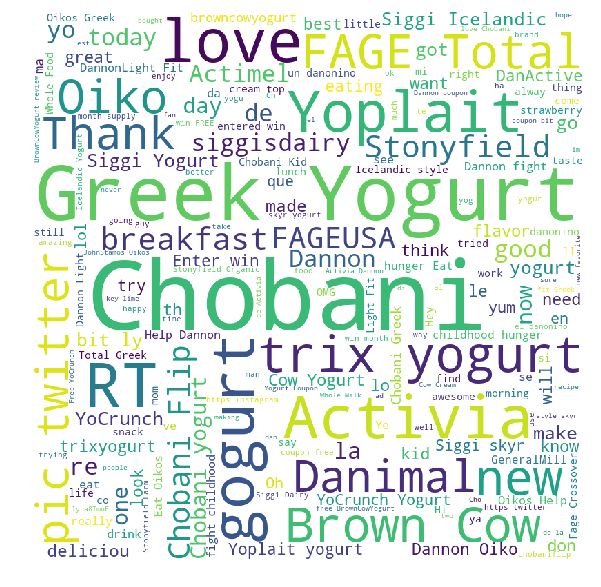

In [132]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(scraped_tweets_table_df.text.to_string()) 
   
# plot the WordCloud image                        
plt.figure(figsize = (8,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [147]:
scraped_tweets_table_df['text'] = [text.lower() for text in scraped_tweets_table_df['text']]

In [190]:
Tags = ['chobani','stonyfield','fage','siggisdairy','yoplait','dannon'] 

In [210]:
for i in Tags:
    scraped_tweets_table_df[str(i)] = np.where(scraped_tweets_table_df['text'].str.contains(str(i)),1,0)

In [149]:
from nltk import word_tokenize,pos_tag
from nltk.corpus import stopwords

In [225]:
def word_cloud_adj(tags,scraped_tweets_table_df):
    tags = [i for i in word_tokenize(scraped_tweets_table_df[scraped_tweets_table_df[tags]==1].text.to_string()) if i not in set(stopwords.words('english'))]
    tags_key = list(filter( lambda x:  len(re.findall(r'^([0-9])+|\.+',x))==0,tags))
    tags_adj= [i[0] for i in pos_tag(tags_key) if i[1] in ['JJ','JJR','JJS']]
    return tags_adj

In [214]:
def word_cloud_plot(adj):
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(' '.join(adj)) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 

In [216]:
scraped_tweets_table_df.head()

tweet_id  user        fullname           timestamp  \
0  b'70894579485917184'   NaN    Benzinga com 2011-05-18 16:52:39   
1  b'42600137536708608'   NaN      H B Fuller 2011-03-01 15:00:38   
2  b'21864433185726465'   NaN     Julie Smart 2011-01-03 09:44:21   
3   b'1259529710862336'   NaN  Bell Institute 2010-11-07 13:07:49   
4        b'29538655006'   NaN  Bell Institute 2010-11-03 03:55:39   

                                                text       search_keyword  \
0  exclusive general mills talks to benzinga abou...  generalmills yogurt   
1   generalmills and nestle bid on world s 2nd la...  generalmills yogurt   
2  free cup of yoplait yogurt http goo gl fb xqun...  generalmills yogurt   
3  get the whole story on yogurt whole grain and ...  generalmills yogurt   
4  get the whole story on whole grain heart healt...  generalmills yogurt   

  brand_tag             user Sentiment  chobani  stonyfield  \
0   yoplait         Benzinga  Positive        0           0   
1   yoplait         GlueTalk   Neutral        0           0   
2   yoplait  CouponSavingFam  Positive        0           0   
3   yoplait    bellinstitute   Neutral        0           0   
4   yoplait    bellinstitute  Positive        0           0   

                                            features  fage  siggisdairy  \
0  [exclusive general mills talks, yoplait purcha...     0            0   
1  [nestle bid, world s, yogurt maker yoplait htt...     0            0   
2  [free cup, yoplait yogurt http goo gl fb xqunk...     0            0   
3  [whole story, whole grain, generalmills booth,...     0            0   
4  [whole story, whole grain heart health yogurt,...     0            0   

   yoplait  dannon  
0        1       0  
1        1       0  
2        1       0  
3        0       0  
4        0       0

In [226]:
#chobani_adj = word_cloud_adj('chobani',scraped_tweets_table_df)
stonyfield_adj = word_cloud_adj('stonyfield',scraped_tweets_table_df)
fage_adj = word_cloud_adj('fage',scraped_tweets_table_df)
siggisdairy_adj = word_cloud_adj('siggisdairy',scraped_tweets_table_df)
yoplait_adj = word_cloud_adj('yoplait',scraped_tweets_table_df)
dannon_adj = word_cloud_adj('dannon',scraped_tweets_table_df)

In [217]:
chobani_adj = word_cloud_adj('chobani',scraped_tweets_table_df)

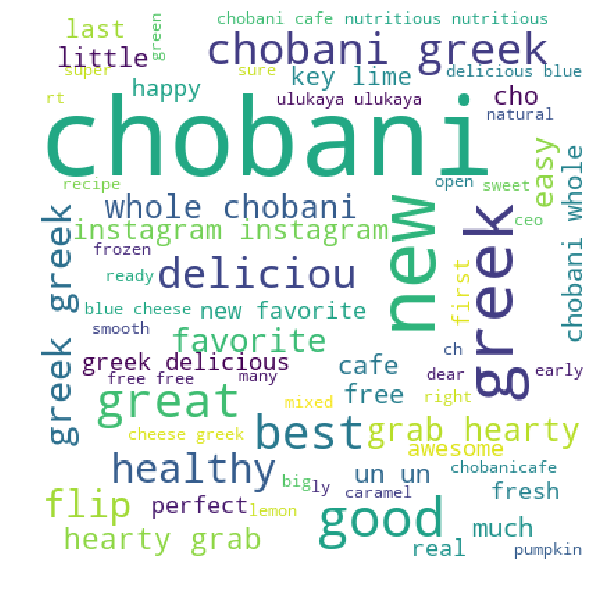

In [218]:
word_cloud_plot(chobani_adj)

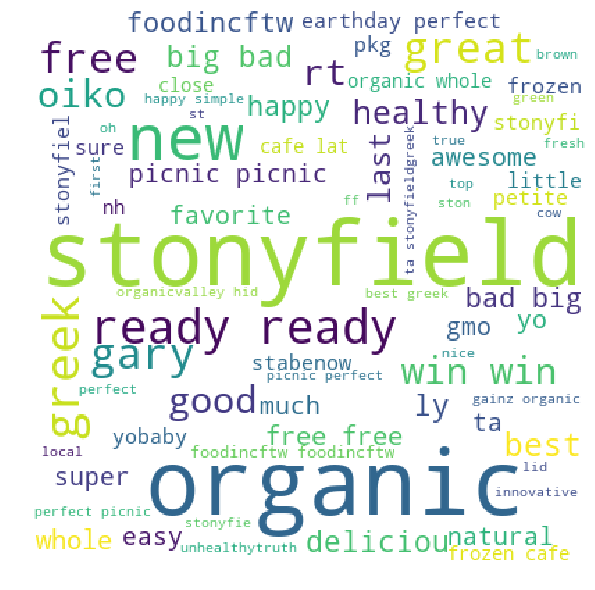

In [227]:
word_cloud_plot(stonyfield_adj)

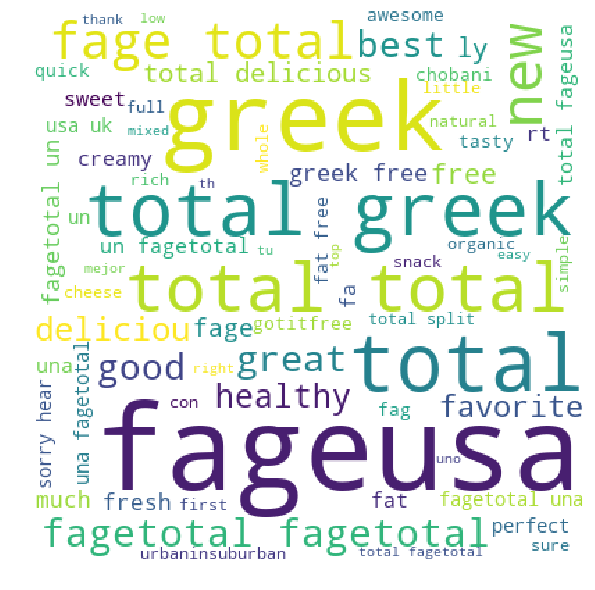

In [228]:
word_cloud_plot(fage_adj)

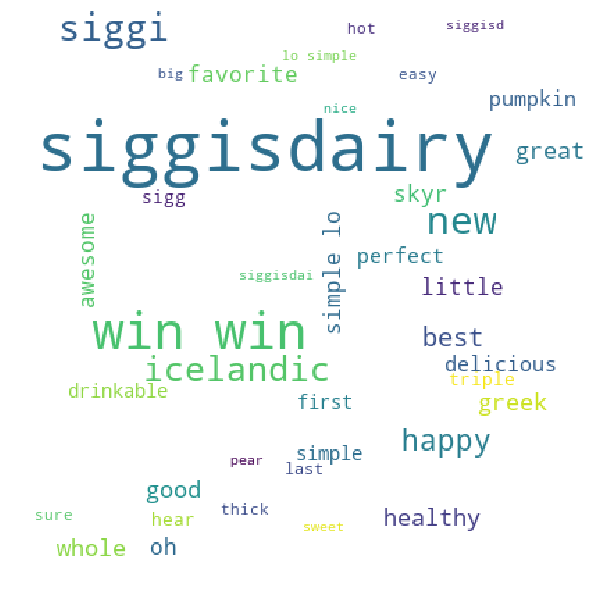

In [229]:
word_cloud_plot(siggisdairy_adj)

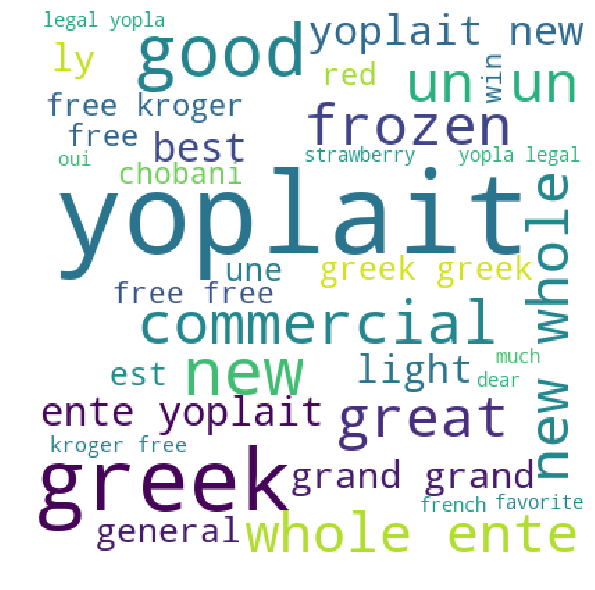

In [230]:
word_cloud_plot(yoplait_adj)

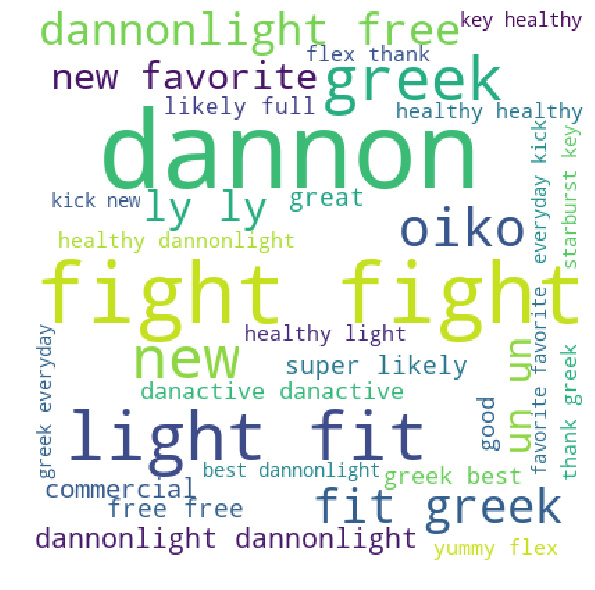

In [231]:
word_cloud_plot(dannon_adj)

In [244]:
scraped_tweets_table_df['features'] = [TextBlob(text).noun_phrases for text in scraped_tweets_table_df['text']]

In [235]:
scraped_tweets_table_df.head()

tweet_id  user        fullname           timestamp  \
0  b'70894579485917184'   NaN    Benzinga com 2011-05-18 16:52:39   
1  b'42600137536708608'   NaN      H B Fuller 2011-03-01 15:00:38   
2  b'21864433185726465'   NaN     Julie Smart 2011-01-03 09:44:21   
3   b'1259529710862336'   NaN  Bell Institute 2010-11-07 13:07:49   
4        b'29538655006'   NaN  Bell Institute 2010-11-03 03:55:39   

                                                text       search_keyword  \
0  exclusive general mills talks to benzinga abou...  generalmills yogurt   
1   generalmills and nestle bid on world s 2nd la...  generalmills yogurt   
2  free cup of yoplait yogurt http goo gl fb xqun...  generalmills yogurt   
3  get the whole story on yogurt whole grain and ...  generalmills yogurt   
4  get the whole story on whole grain heart healt...  generalmills yogurt   

  brand_tag             user Sentiment  chobani  stonyfield  \
0   yoplait         Benzinga  Positive        0           0   
1   yoplait         GlueTalk   Neutral        0           0   
2   yoplait  CouponSavingFam  Positive        0           0   
3   yoplait    bellinstitute   Neutral        0           0   
4   yoplait    bellinstitute  Positive        0           0   

                                            features  fage  siggisdairy  \
0  [exclusive general mills talks, yoplait purcha...     0            0   
1  [nestle bid, world s, yogurt maker yoplait htt...     0            0   
2  [free cup, yoplait yogurt http goo gl fb xqunk...     0            0   
3  [whole story, whole grain, generalmills booth,...     0            0   
4  [whole story, whole grain heart health yogurt,...     0            0   

   yoplait  dannon  
0        1       0  
1        1       0  
2        1       0  
3        0       0  
4        0       0

In [236]:
scraped_tweets_table_df.to_csv("Features_tweets.csv",index = False,sep = '|')

In [256]:
for text in scraped_tweets_table_df['text']:
    print(TextBlob(text).noun_phrases) 

['exclusive general mills talks', 'yoplait purchase gis benzinga com http www benzinga com news m', 'exclusive general mills talks', 'yoplait purchase gis yogurt generalmills yoplait']
['nestle bid', 'world s', 'yogurt maker yoplait http su pr 2fd4wm']
['free cup', 'yoplait yogurt http goo gl fb xqunk freebies generalmills yoplaityogurt']
['whole story', 'whole grain', 'generalmills booth', '9am spnsrdmsg']
['whole story', 'whole grain heart health yogurt', 'generalmills booth', 'http bit', 'cwx1nz spnsrdmsg']
['http bit', 'c1rwu8 generalmills yogurt']
['generalmills npdgroup i', 'great i', 'great meatball', 'yogurt recipe']
['generalmills greek yogurt yum', 'holiday season bettycrocker']
['liberte yogurt lemon', 'mocha flavour taste', 'ice cream']
['savecommunity i', 'terri burns', 'http www serenityhousenj org cereal soup yogurt pls rt']
['generalmills feedback', 'thickener besides gelatin', 'greek yogurt']
['new greek yogurt']
['generalmills yoplait greek yogurt']
['ll introduce gre

['sweeter generalmills launches', 'protein yogurt range', 'greek http www nutritioninsight com news smarter', 'sweeter general mills launches', 'protein yoplait yogurt range html']
['generalmills shows', 'greek yogurt alternatives', 'new high protein', 'low sugar line yq https tcbm ag 2lhsh1s']
['different opinions', 'sweet high protein yogurt brand', 'generalmills https bit', '2ll59d pic twitter com t0mjpmi07o']
['yogurt launch', 'high protein', 'sweet yogurt', 'milk http ow', 'azeh30kzjqd foodnews fbn yogurt yqbyyoplaitpic twitter com f4mhcwfqmm']
['yoplait introduces', 'low sugar yogurt line', 'uk launch generalmills https www foodbev com news yoplait introduces', 'low sugar yogurt line']
['generalmills s', 'new yq', 'greek yogurt', 'segment http ow', 'fzcv30kzfzt foodnews fbn yogurt yqbyyoplaitpic twitter com vbui9tkqov']
['big cpg news generalmills launches yq yogurt brand https buff', '2tlut6l pic twitter com lznnya3hoo']
['u s http bit', '2yyqkcv yoplait yogurt pic twitter com g

['annie s yogurt', 'natural foods division', 'generalmills http strib mn 1nc16c8 annieshomegrown']
['carolina generalmills', 'new yogurt business', 'brazil http myju st 1q8eznk']
['yogurt war danonegroup', 'generalmills vs chobani http www', 'food com news danone', 'id132052 aspx http www foodnavigator usa com regulation chobani', 'campign lands', 'legal briansozzi']
['smoothies gwinelementary w strawberry yogurt applesauce oj pineapple juice recipe generalmills everykidhealthyweekpic twitter com psdwh8cupr']
['generalmills u s yogurt sales', 'double digits http www', 'food com analysis general mills sales woes', 'analysis id136143 aspx buying stonyfield', 'http www', 'food com analysis', 'danones stonyfield business analysis id136375 aspx pic twitter com ugumi0kz1x']
['danone doesn t', 'global yogurt market']
['i don t', 'conflict generalmills', 'yoplait stonyfield', 'flagship organic yogurt brand annie s yogurt', 'https twitter com olivier frey status']
['stonyfield address generalmi

['sun rt sarahhanem', 'slim thick man whet pic twitter com eytbzj5rzj']
[]
['snack time', 'lunch snack time', 'lunch gogurt']
['frozen gogurt']
['year i']
['gogurt slurrrrp till']
['didn t']
[]
[]
['r5crazy4life thankss']
['mythotjacob gogurt']
['gogurt commercial', 'black kid']
['own mouth', 'complex http instagram com p tqeuxqweu1']
['oftroy gogurt oh']
['snack time', 'lunch snack time', 'lunch gogurt alwaysinmyhead']
['jon bois i', 'friends godzilla collectibles']
['gogurt snack time lunch commercial']
['sons gogurt packages joke', 'thor hail', 'asgard b midgard c detroit lol']
[]
['snack time', 'lunch snack time', 'lunch gogurt']
['doesn t']
['chobani gogurt', 'game changer']
['nutritious breakfast']
['mike x gogurt tube flavio https vine co v o7jwwzezxuj']
['spongebob gogurt']
['rec center slurpin']
['frozen gogurt', 'school days']
['mom forgets', 'gogurt willkeed1998 pic twitter com 03uyy9jwy1']
['gogurt strawberry banana obv look http fb']
[]
['ain t', 'grocery store']
['thing i

['good idea sassycyndi ah yes gogurt', 'frozen gogurt']
['mmm gogurt p']
['accidentaladvo ah yes gogurt', 'frozen gogurt']
['magic cure']
['xokaylamarie buying cookie dough']
['regular yogurt']
['cherry spongebob squarepants gogurt lol']
['good mom i', 'instant oatmeal gogurt amd', 'bagel whew', 'cook breakfast lol']
['frozen gogurt']
[]
['dayuhm gogurt life riiqht', 'real friendsz']
[]
[]
[]
['lunch rt rockinrita', 'gogurt rt sostephaniesays jfisette kmpriest']
['gogurt rt sostephaniesays jfisette kmpriest i', 'squeezable gelatin']
[]
['applyin hair grease', 'ashy arms', 'bra jus', 'gogurt snack bahahahaha']
['new band name gogurt bukkake']
['bootypoplauren gogurt lol', 's fun']
['grammys pre thing', 'gogurt lolol']
['gogurt yummmmmm']
['bein creepy yoga yogurt gogurt goga yogaonthego drivethruyoga http instagram com p jpowpyvv4l']
['brother s throat']
['allie gatorrr i', 'yogurt tube', 'gogurt gogurt']
['allie gatorrr yes gogurt']
['allie gatorrr gogurt']
['gogurt slurp till', 's fla

['frozen gogurt']
['regional foodshow', 'https instagram com p 23kwcpsjdh']
['popsicle cozies crochet', 'cozies gogurt yogurt https www etsy com', 'popsicle cozies crochet', 'utm source etsyfu utm medium api utm campaign api craftshout iceecoziespic twitter com gytici2xe8']
['lilcorbooo boy emma needa shut', 'nose ass']
['gogurt squeezy applesauce']
['popsicle cozies crochet', 'cozies gogurt yog https www etsy com', 'popsicle cozies crochet', 'utm source etsyfu utm medium api utm campaign api craftshout popsiclecoziespic twitter com wux73ubzkd']
['short popsicle cozies crochet', 'cozies gogurt https www etsy com', 'short popsicle cozies crochet utm source etsyfu utm medium api utm campaign api craftshout icepopcoziespic twitter com kopqlraeym']
['paigewulff u']
['http vine co v ekvphmbh2q7 markjohnson0722 fyrechris jcalliii tanner stocks joeyroberts18 bu 3rdeyeview']
['popsicle cozies crochet', 'cozies gogurt yogur https www etsy com', 'popsicle cozies crochet', 'utm source etsyfu utm 

['trix yogurt', 'bio class dontjudgeme']
['i didn t', 'trix yogurt']
['trix yogurt yoplait yogurt']
['don t', 'trix yogurt rt j hotz chiinkiegee fuck']
['rt j hotz trix yogurt']
['trix yogurt']
['aguiniga18 trix yogurt']
['trix yogurt rt djidblends stc i need']
['trix yogurt']
['thegirl onfire trixyogurt']
['trix yogurt']
['trix yogurt', 'studyingggg yourmotherfuckingjealous sillyrabbit stupidspanish']
['smokyy bandit', 'sounds bomb trix yogurt']
['pssst yoplait trix yogurt', 'printable coupon http bit']
['goanerdeng trix']
['trix yogurt', 'tastey sillyrabbit']
['lovely deik eatinn trix yogurt', 'judy tryna figure', 'wild pit']
['trix yogurt']
['trix yogurt']
['trix yogurt']
['trix yogurt theshittt whuddupdoe']
['yoplait trix yogurt', 'printable coupon', 'witches http bit']
['por mi viviria', 'con yogurt']
['trix yogurt']
['i cant', 'shit witout throwin', 'thing i ate 2day', 'fuckn trix yogurt', 'dat shit']
['red onion', 'white skunk', 'pink stink lmao', 'kids food trixyogurt']
['trix 

['trix yogurt']
['trix yogurt', 'dinner https twitter com jackieaina status']
['trix yogurt sky', 'lot pic twitter com xzsvnav00w']
['wan na', 'old trix yogurt']
['trix yogurt']
['trix yogurt']
['cool trix yogurt nails']
['wednesday breakfast breakfast', 'trix cereal mini loaf yogurt']
['trix yogurt']
['trix yogurt https twitter com']
['hates creep', 'photo booth', 'wan na', 'free trix yogurt pic twitter com worh2kow5m']
['trix hahhahaha pic twitter com w4kmvwq7w2']
['old trix yogurt cups']
['riamu reminds', 'trix yogurt']
['trix yogurt']
['trix yogurt 5s']
['trix yogurt sky', 'sunday evening', 'pic twitter com sekvci2fdw']
['trix yogurt colors pic twitter com 4zjc16ai3p']
['trix yogurt']
['trix yogurt shit']
['cotton candy trix yogurt', 'sunday scaries rn']
['trix yogurt']
['trix yogurt', 'sunny d']
['hi glenn', 'fellow yogurt lover', 'trix yogurt']
['super con mi mam y casi siempre agarro yogurt y trix', 'agarre est vez y', 'pregunto que pasa que', 'agarras el yogurt jaja ya sabe que

['los trix sin yogurt', 'son nada voy', 'tener que ir']
['i regret', 'cotton candy berry trix yogurt']
['trix yogurt', 'mother 12am']
['person trix yogurt barber', 'pic twitter com 2v7uiq4tkz']
['gianfmartino quedo un toque', 'torta medio yogurt y algo', 'trix es duro convivir', 'mi familia']
['trix yogurt', 'awesome btw']
['pokemonnurse damn', 'trix yogurt']
['roxaaaanneeee i', 'cotton dandy', 'okay trix yogurt']
['i m', 'trix yogurt', 'kid steals']
['sky reminds', 'pink blue trix yogurt']
['trix yogurt']
['sunsets remind', 'blue trix yogurt cups']
['differentcolorsep nick s hair', 'trix yogurt cup http tmblr co zr7vuk1 1ppxz']
['trix yogurt']
['trix yogurt haircut']
['lead singer s hair', 'moon reminds', 'trix yogurt nye2016 newyearseve']
['i guess', 'trix part', 'damn i m', 'triple co']
['grocery i', 'impulse purchase', 'triple co', 'yoplait trix hello kitty yogurt pic twitter com mbho9veaey']
['raspberry rainbow trix yogurt', 'town w']
['nostalgia peg fuerte soy yo llegando tarde t

['right trixyogurt']
[]
['kimexposedtaylor thing']
['irl jesus trixyogurt']
[]
['vine trixyogurt']
['theofficeposts ain t', 'way trixyogurt talkativetianna']
['alcohoiporn idk', 'i couldn t']
['relatablequote i']
['damn box https www instagram com p bhk7mf9a3zm']
['thing i', 'flavor strawberry banana']
['i m']
['https www instagram com p bgdh9g2gzb0ud1rhjwhefsb6k1aieavcff8fsy0']
['yoplaittrixyogurt yoplaittrixyogurtraspberryrainbow trixyogurt https www instagram com p bf9rgbxm2ascwjfiy0hhohwuhmqo4mwzyppnbc0']
['u don t', 'everyday trixyogurt https www instagram com p bfabjqekaxy']
['vapelife trixyogurt', 'blacks https www instagram com p bemhw7ssxbv']
['i don t care', 'trixyogurt ain t', 'kids gulp gulp']
['happy birthday', 'illest obamajama trixyogurt ilysm']
['nostalgic trixyogurt trixareforkids https www instagram com p bbzw16wg4bwhkd2vlz5eytipl08bfxrthypp700']
['trix yogurt tho todayskidswillneverknow trixyogurt tbt https www instagram com p bbrt jimn8']
['trix trixyogurt 90skids h

['bath bomb huh trixyogurt']
[]
[]
['banannaseeds trixyogurt']
[]
['joy trixyogurt']
['trixyogurt nakiitwit jenna needa step']
[]
['ta blast']
['phil lewis', 'don t']
[]
['great trixyogurt nakiitwit']
[]
[]
[]
['ahhhh trixyogurt']
[]
['irl jesus lauryn bunny banannaseeds trixyogurt', 'saturday night']
[]
['monster drinks']
[]
['relatablequote i']
['itsathleteporn trixyogurt']
['horryputtor trixyogurt nakiitwit']
[]
['real tragedy', 'contact picture']
['laugh s']
[]
['yoplait lite']
[]
[]
['review yoplait 4tub yogurt barcode', 'plastic tubs', 'cardboard sleeve']
['white chocolate raspberry yogurt']
['ua lounge']
['yummy bananna juice', 'huge amounts']
[]
['tw yoplait']
['live active cultures sprang']
['yoplait i', 'average buh']
['berry yum']
['dessert yoplait', 'key lime pie yogurt']
['midafternoon snack yoplait', 'light apple turnover yogurt', 'apple turnover', 'fat ymmmm']
['product designer', 'spoons don t']
['strawberry w banana yoplait yogurt']
['yoplait strawberries']
['snacks yo

[]
[]
['ser que el hijo', 'se coloque', 'una lista por ser quien es y pase', 'ser subsecretario', 'cualquier cosa si', 'podemos cribar ni', 'los niveles altos ni', 'los bajos que libertad tenemos o danone o yoplait o clesa o hacendado', 'decisi n', 'un amado caudillo']
['uys si es eso', 'pillado que verg enza solo pienso', 'mantener esta plaza que est', 'mi familia desde hace', 'os y', 'da miedo estudiar saque', 'oposici n', 'phoskitos y ascend', 'yoplait que verg enza']
['yoplait que recuerdos']
[]
['costco desde hace cuatro', 'os paso por los pasillos', 'los yogurts esperando que vuelvan', 'traer el lite', 'danone y es hora que siguen vendiendo el yoplait que']
['yoplait amiga']
['es tan perfecto estaba lleno hasta el tope eres', 'onda yoplait tkm pic twitter com nbifhvgick']
['i ate', 'chocolate ice cream cups', 'macadamia nut', 'white chocolate candy', 'vanilla yoplait yogurt']
['yoplait https twitter com guarromantico status']
[]
['groceries i', 'strawberry milk tea', 'vanilla yop

['product locator', 'area https www yoplait com findus', 'good luck']
['bright black daughter', 'boss yoplait i']
['comme moi partagez votre premi re fois avec yoplait sur 1jour1premierefois pic twitter com yksgye0pgt']
['sorry check', 'product locator http bit']
['wow yoplait', 'exciting daily prizes 100sofwaystoyoplaitsweepstakes http ln', 'promo eprize com d0srt']
['yoplait d yoself']
['viva el', 'coco y', 'yoplait https twitter com lamaribe status']
['yoplait parfait', 'panther den', 'waterproof speaker http fb']
['wow yoplait', 'exciting daily prizes 100sofwaystoyoplaitsweepstakes http yoplait com 100ways']
['yogurt commercial']
['cherry yoplait yogurt', 'mickey mouse spoon']
['yoplait quatrain', 'chobani blank verse']
['yoplait i', 'i m', 'true yoplait yogurt guru yum 100sofwaystoyoplaitsweepstakes http yoplait com 100ways']
['tropical yogurt']
['wow yoplait', 'exciting daily prizes 100sofwaystoyoplaitsweepstakes http ln', 'promo eprize com fzpux']
['foodsco food4less yoplait yog

['rt frugalplus safeway', 'yoplait fiber', 'gc http bit', '94nyyq ends']
['strawberry mango smoothie', 'yoplait i']
['mmmmmmmmmm yogurt', 'ciikies cream', 'yoplait xd y eso sono']
['pandora radio glamour magazine', 'yoplait yogurt hello', 'lazy saturday afternoon']
['yoplait smoothie', 'blender giveaway http', 'blogspot com']
['red velvet yogurt']
['yoplait yogurt dessert flavors', 'pineapple upsidedown cake', 'calories yum']
['twitter broadcast', 'yoplait yogurt commercial', 'gigs check', 'gd 8othl']
['strawberry yoplait']
['hebasalamabl blueberry pie', 'red velvet cake i', 'light good luck', 'marathon xo']
['red velvet cake']
['mmmmmmmmm yoplait']
['yoplait harvest peach yummmy']
['yoplait source commercial', 'girl s']
['lol i luv', 'rt blsdjss i', 'vanilla silk groupie lem', 'eatin healthy']
['re theluckyladybug rt', 'yoplait frozen smoothie gift pack giveaway http bit', 'theluckyladybug http disq']
['yoplait strawberry i m gon na', 'good rt monicaprince', 'kind chobani cont http tl

['childhood trixyogurt raspberryrainbow http instagram com p ygb6pgylnq']
['trix trixyogurt http instagram com p xxw7lmqjp']
['grader uncrustables trixyogurt http instagram com p xlbghup3bf']
['tbt trixyogurt http instagram com p xamhmbg36j']
['trixyogurt sillyrabbit yummypic twitter com oicue7e5l6']
['strawberrybananabash trixyogurt http instagram com p xle6wwmilq']
[]
['yumm munchies trixyogurt cottoncandy http instagr', 'p w6uoffcw0y']
['trix yogurt', 'trixyogurt asthma']
['trixyogurt pic twitter com wfcydgchaj']
['yogurt trixyogurt 2coloredswirl lol']
['morning sky', 'majestic trixyogurt']
['late night snack ballin trixyogurt drpepper http instagr', 'p wymboswtk7']
['mtdew trixyogurt', 'chocolatemuffin breakfast', 'champion aka', 'college kid http instagr', 'p wumzpbjgw5']
['trixyogurt pic twitter com l5vcvyqna5']
['omg childhood', 'trix trixyogurt yogurt cereal breakfast colors http instagr', 'p wm8uqfhfn7']
['baby adri http instagr', 'p v zbaqdbji']
['don t', 'peanutbutterenglish

['lunchbox gogurt score', 'favorite gogurt i aim', 'athlete crowdtapperspic twitter com jgjwq9ktpj']
['great session', 'nashoverstreet bertelliott gogurt loveonthego session http instagram com p jdr1xkj2xr']
['frozen gogurt']
['doesn t']
['crowdtappers variety', 'kids lunchbox gogurt yoplaitpic twitter com 5raqttw9to']
[]
['kids kidatheart gogurt pic twitter com iojatuf1qd']
['gurt life tho gogurt breakfast mmm http instagram com p juqauvlsou']
['gogurt cofratrain strugglebus mattermillerpic twitter com 6qdzf2hccf']
['cofratrain gogurt pic twitter com mjf9kwcihr']
['sorry ladies gogurt accident']
['classic dvd hereandnow thebangs gogurt']
['januaryphotochallenge tinrlphotochallenge gogurt maxwelltaylorlife http instagram com p jtl hhnddl']
['word gogurt']
[]
['shampoo conditioner body']
['new yoplait dad campaign', 'gogurt toocute']
['jobangill23 bubbbbbbbbs meganhoffman96 gogurt']
['tweet tweet mutha fuckas gogurt']
['slurp til', 's flat gogurt']
['trans gogurt yogurt samuel http inst

['dear ladies', 'gurt gogurt suckingdick']
['findingdory gogurt packs']
['chocolatechips corndog cereal icecream yogurt gogurt otterpops hotdog macncheese https twitter com jasaitis']
['need spot illustration', 'sharp color palette i m', 'gogurt generalmillspic twitter com fbtyd7etqj']
['yogurt dad i', 'yogurt dadlife dad gogurt https www instagram com p bgutxcwpkzf']
['ice cream twix', 'i dont regret']
[]
['yolo swag gogurt']
['yummy turnupthevolume gogurt nataliejune snapchatter shesfunny https www instagram com p bgywjjbir7r']
['bi coastal', 'anthdamatomusic agesandages', 'def tour', 'music friends gogurt pic twitter com kbzkyotywm']
['s hyper af runnin', 'singin random songs boom badabam', 'current song i']
['frozen gogurt']
['new gogurt', 'promotional packs commercial https shar es 1dsab2 pic twitter com 12ogqfotds']
['yoplait gogurt findingdory tvcommercial disney pixar', 'new gogurt', 'dory http www tvcommercialspots com food', 'beverage yoplait gogurt tv commercial', 'new gogur

['rt nutritioniste des yogourts', 'femmes y', 'assez mon blogue http bit', '4fgoor yoplait danone libert yogourt']
['nancyodell christianfestivalsandholydays noahcyrus kategosselin timmcgraw theworld twitter yoplait kate http tinyurl com qavo9j']
['pink yoplait lid']
['yoplait commercial', 'tv ads', 'acid trip']
['amc602 i guess', 'constant cravings', 'dairy products yoplait okay']
['yoplait fiberone yogurt']
['yoconfieso q como', 'se ponen d accrd para l pastel y tlcoys d mario yo ya', 'estoy zampando mi yoplait', 'cranberries y almonds']
['rt blogtalkradio', 'lid matters', 'breast cancer', 'early detection http budurl com yourlidmatters yoplait']
['lid matters', 'breast cancer', 'early detection http budurl com yourlidmatters blogtalkradio yoplait']
['lid matters', 'breast cancer', 'early detection http budurl com yourlidmatters blogtalkradio yoplait']
['lid matters', 'breast cancer', 'early detection http budurl com yourlidmatters blogtalkradio yoplait']
['lid matters', 'breast canc

['grand prize packs yoplait instantwin http www yoplait com nintendo']
['grand prize packs yoplait instantwinhttp www yoplait com nintendo']
['grand prize packs yoplait instantwin http www yoplait com nintendo']
['grand prize packs yoplait instantwin http www yoplait com nintendo']
['grand prize packs yoplait instantwin http www yoplait com nintendo']
['grand prize packs yoplait instantwin http www yoplait com nintendo']
['grand prize packs yoplait instantwin http www yoplait com nintendo']
['grand prize packs yoplait instantwin http www yoplait com nintendo']
['grand prize packs yoplait instantwin http www yoplait com nintendo']
['grand prize packs yoplait instantwin http www yoplait com nintendo luvbeingamomof3 seymashabbir lady', 'janetrobb3 abbynaverysmom seymashabbir snickerdoo2 radredhead222 disneyfan40 kouponkat meowpar85 briannabirch875 tonetash02']
['grand prize packs yoplait instantwin http www yoplait com nintendo']
['grand prize packs yoplait instantwin http www yoplait com

['yoplait s', 'new whole milk yogurt', 'yoplait prize pack', 'whispersinspire s', 'https wp', 'p1inau 8eg giveaway']
['freebies kroger tortillachips yoplait yogurt', 'freebie download shopatkroger https www instagram com p bttmbbrdbzs']
['kroger freebies friday yoplait kroger chips download app', 'https www instagram com p bttx0skf2mrj akk npukrsebfzqmyyibtzcxq0']
['nestle purina boost dupont ford advair tums goldbond campbells swanson generalmills yoplait naturevalley seabond']
['general mills', 'new ceo https goo gl s3fawx chiefoperatingofficer cheerios yoplait snack brandpic twitter com wiol3tpdqt']
['yoplait succogod soljamillion iamjuice flygmafia qcshyt newlife gmebxflygmafia mr2017 https www instagram com p btq']
['general mills', 'new ceo https goo gl zczgq6 chiefoperatingofficer cheerios yoplait snack brandpic twitter com i7zwidkro7']
['general mills', 'new ceo https goo gl 7g8uzu chiefoperatingofficer cheerios yoplait snack brandpic twitter com w3ylrvkhbx']
['test nouveau pro

['thanks amykirbs', 'great weekend']
['commercials i', 'light red velvet cake', 'big fan', 'boston cream pie']
['yoplait generalmills', 'news police', 'animals boycottyoplait', 'dannonpic twitter com yzejuwxq8l']
['dannon i', 'buying yoplait generalmills yogurt', 'animal deaths', 'narrow container dannon', 'yoplait shame', 'years https twitter com dodo status']
['peta hsusnews generalmills yoplait', 'police officer rescue', 'yoplait containers', 'yoplait generalmills', 'youpic twitter com wwymff3txk']
['police officer rescue', 'skunk yoplait generalmills', 'company dannon', 'boycottyoplait generalmillspic twitter com 5j8ag1dgzc']
['inside lip', 'police officer', 'animal control', 'yoplait buying', 'generalmills kills animalspic twitter com o3uqm61lzx']
['yoplait yoplait', 'police officer', 'yoplait yogurt cups', 'http animals', 'skunk fix yr damn cups', 'yrs generalmills generalmills cc peta hsus movetheworld', 'damn lid', 'wthpic twitter com unadmoe68s']
['yoplait i m']
[]
['frozen yo

['btd breakfast', 'day breakfastclub yoplait keepitsimplepic twitter com ttjaxgftpn']
[]
['un c lin']
['danielle thanks', 'oui s glass pots']
[]
[]
[]
['huge hook', 'yoplait pic twitter com czilvpvcyk']
['yoplait du d tergent d couvert dans', 'yaourt dans', 'vienne http vdn lv ty8xm5 pic twitter com cdskkl0axm']
['duh yes']
['yoplait introduces girlscouts cookie', 'yogurt http', 'wtkr com c6rsy wtkr3']
['delicious yogurt jars', 'paperwhite bulbs', 'christmas ouibyyoplait diygiftspic twitter com gns5lzgn3q']
['du yoplait']
['ca montre qu ils lavent leur cuves']
['french style yogurt', 'glass container', 'super cute']
['je sais pas pourquoi je renifle mon yop', 'l ouvrant']
['yoplait launches libert yogurt http', 'gr jlem']
['yoplait yoplaitsmoothie faut s expliquer', 'vitepic twitter com eusaeve5zf']
['crasse d un concurrent qui', 'veut yoplait', 'ne pas avoir jou', 'jeu du', 'sans croix des yaourts grecs montretacroix']
['oh o il va']
['re du d tergent d couvert dans', 'yaourt d', 'usi

['oliviaos yoplait sarahwilson fsaiinfo campaignforleo', 'experts people trust']
['oliviaos yoplait sarahwilson fsaiinfo campaignforleo yrs', 'food industry reading mags etc i ve', 'i d trust']
['oliviaos yoplait sarahwilson fsaiinfo campaignforleo jamie oliver', 'sugar tax i trust']
['janeyhurley yoplait sarahwilson i ve', 'i didn t']
['janeyhurley yoplait sarahwilson', 'fsaiinfo health minister campaignforleo', 'leo s sugar tax work']
['oliviaos yoplait sarahwilson i ve']
['oliviaos yoplait sarahwilson']
['janeyhurley yoplait sarahwilson']
['janeyhurley yoplait sarahwilson']
['oliviaos yoplait sarahwilson', 'cheap tastes moreish', 'cheap food', 'big profits unhealthy customers']
['janeyhurley yoplait sarahwilson i', 'low fat cos', 'artificial sweeteners', 'fullfat fruit yogurt']
['yoplait commercial', 'whole family']
['oliviaos yoplait yup', 'sarahwilson i ve', 'yrs lots', 'good info']
['fair play', 'drevaorsmond oliviaos yoplait']
['limerickhour yoplait i', 'everyday food', 'i d', '

['rebecca nesi', 'new chobani flip yogurt', 'good fruit']
['chobani flip', 'usual almond coco loco', 'hawaiiantropic pancakes', 'waffles http tinyurl com pwsxhxq']
['hey chobani', 'coconut flip home', 'empty hole']
['new flip cups', 'sooo good', 'coconut choc almond', 'key lime']
['pic twitter com en8yapolld']
[]
['sooo good chobani flip yogurt sogood coconut chocolate almonds lunch foodporn yummy http instagram com p z3kgu hmi']
['chobani flip', 'almond coco loco yummy']
['delicious chobani flip cocoloco http instagram com p z20opnv4nj']
['chobani key lime flip', 'good i']
[]
['chobani flip yogurt']
['chobani flip yogurt']
['chobani key lime flip', 'coco loco', 'soooo http instagram com p zztfb1xguh']
['sweet baby jesus i', 'chobani flip', 'local grocery store', 'http instagram com p zzbxouizw3']
['chobani s key lime flip i m', 'dessert yogurts']
['omg i', 'u chobani raspberry chocofix flip']
['chobani rt awesomesaucy chobani sugarandbrine banana flip chocolate pb chips']
['almond cho

['mrs jukebox360', 'flip w', 'crunchy parts dm', 'code flavor']
['chobani peachy pistachio flip yogurt']
['chobani i', 'plastic tag holder']
['raspberry flip', 'strawberry sunrise', 'palate pleaser']
['chobani hey i', 'raspberry flip']
['yogurt oatmeal', 'time i', 'chobani flip things', 'fr http pinterest com pin']
['delicious chobani chobaniflip nuttyfornana http instagram com p rppthgheqi']
['chobani flip coco loco']
['chobani flip yogurt']
['chobani oh', 'chobaniflip i m']
['coconut chocolate almond chobani flip heaven']
['key lime crumble flip']
['chobani i', 'flip almond coco loco yogurt']
['didn t', 'chobani flip bomb']
['early meeting', 'late meeting', 'time meeting', 'reason flip', 'answer pic twitter com ppjnn5nmuq']
['mcdonald s', 'chobani flip greek yogurt watermelon']
['yummy chobani almond coco loco flip', 'dairy i']
['haven t', 'chobani flip', 'right way pic twitter com zylhbu5eic']
['sfdc paul', 'chobani occurs', 'milk flip', 'sweeter lines', 'tasty snack']
['s flip time

['caramel crunch yogurt flip', 'good way']
['chobaniflip almond coco loco honey crunch bunch http bit', '2kbmxzv newyogurt']
['key lime chobani flip', 'life lol']
['chobani peanut butter dream flip', 'flip flavors chobani flips']
['chobani flip tastes', 'suntan lotion', 'i m', 'tropical vacation', 'i m']
['chobani flip']
['company s brand', 'update chobani', 'new low sugar greekyogurt line', 'new varieties flip', 'smooth http bit', '2kdvjld pic twitter com okx2kavwn3']
['chobani flip yogurt party']
['wow i', 'favorite yogurt', 'whole world chobani flip peanut butter dream']
['entire redesign i', 'smooth range items', 'white pale vibe https www underconsideration com brandnew archives', 'new logo identity', 'house php']
['entire redesign i', 'smooth range items', 'white pale vibe https www underconsideration com brandnew archives', 'new logo identity', 'house php']
['chobani flip products', 'shop ability making', 'individual flavors']
['chobaniflip http adage com article cmo strategy ch

['new chobani yogurt drink flavors i', 'pinacolodas yumpic twitter com zt2ht5s5gb']
['chobani drink needa']
['new faces', 'state scavenger hunt', 'week drink chobani beverages', 'chobanigivespic twitter com 93piajcilt']
['orange cream chobani deliciousness', 'i m', 'states cometocanadapic twitter com wmd8apnoui']
['drink chobani beverage', 'https www instagram com p bxjcjxshwta']
['strawberry banana yogurt drink']
['classic flavor', 'new drink chobani cherry vanilla beverage drinkchobani']
['post workout', 'favorite drink chobani', 'favorite https www instagram com p bxb9adcb1cl']
['man i', 'chobani yogurt drink', 'damn good']
['new drinkchobani coffee cream chosquad adpic twitter com oaylxctjkm']
['un anuncio', 'un yogurt drink cobain y pens que era una bebida suicida pero', 'realmente drink chobani malditos lunes']
['chobani kelloggsus shopritestores', 'rancher watermelon', 'berry yogurt drink pic twitter com hwrrgldkxb']
['weekend drinks', 'drink chobani beverage', 'pure greek yogur

['kids deserve nutritious foods', 'gogreekinschool com chobani http bit', '1akfckw chobani4change']
['kids deserve nutritious foods', 'gogreekinschool com chobani http bit', '1fxj3lp chobani4change']
['kids deserve nutritious foods', 'gogreekinschool com chobani http bit', '1crbxff chobani4change']
['kids deserve nutritious foods', 'gogreekinschool com chobani http bit', '19wwvaj chobani4change']
['kids deserve nutritious foods', 'gogreekinschool com chobani http bit', '1ajgqi9 chobani4change']
['kids deserve nutritious foods', 'gogreekinschool com chobani http bit', '1ajzkdw chobani4change']
['kids deserve nutritious foods', 'gogreekinschool com chobani http bit', '1fwzggy chobani4change']
['kids deserve nutritious foods', 'gogreekinschool com chobani http bit', '19w8pkk chobani4change']
['kids deserve nutritious foods', 'gogreekinschool com chobani http bit', '1djwva8 chobani4change']
['kids deserve nutritious foods', 'gogreekinschool com chobani http bit', '19zdfzo chobani4change']


['foster care']
['chobani jk good moms', 'great moms yearn']
['chobani good moms work', 'great moms', 'kids mothersday giveaway']
['great moms feed', 'kids healthy food', 'character yogurts mothersday']
['chobani laugh', 'kids mothersday']
['great moms', 'mothersday giveaway']
[]
['hugs n stitches chobani smart']
['chobani i']
[]
['hamdi ulukaya chobani kids', 'obesity epidemic 1st generation', 'redefinepower forbeswoman']
['embarrassment chobani founder hamdi ulukaya redefinepower']
['bribc champions', 'don t']
['frozen tubes']
['chobani yeah']
['album chobani yogurt kid s earth day craft day http fb']
['school snack', 'pre k er chobani apple chobani', 'snacktime kids http instagram com p y r9djm37f']
['chobani champion vanilla yogurt w choco chunks', 'new fav dessert', 'lil kids']
['w yogurts', 'healthy parfaits', 'school fair']
['mine i don t', 'kids http instagram com p y9iaknrlpt']
['great donations 2day lindt chocolate chobani piratesbooty popchips panerabread kids', 'lot rhokjr'

['chobani kids yogurt coupon target sale', 'couponing2savings hey', 'target http tinyurl com jpyunds']
['chobani kids yogurt coupon target sale http www couponing2savings com', 'chobani kids yogurt coupon target sale pic twitter com qvibykozdd']
['new printable coupon', 'chobani kids print', 'http coupon wizards com', 'printable coupon chobani kids']
['chobani kids yogurt', 'walmart homeland print', 'http bit', '2bjgvnb pic twitter com nw1lcplhqv']
['chobani kids greek yogurt tubes', 'printable coupons', 'mom http tinyurl com zr2d4xb']
['chobani kids greek yogurt tubes', 'printable coupons', 'mom http tinyurl com h9mmzns']
['chobani kids greek yogurt tubes', 'printable coupons', 'mom http tinyurl com h6pct3f']
['chobani kids greek yogurt tubes', 'printable coupons', 'mom http tinyurl com j3mxl73']
['chobani kids greek yogurt tubes', 'walmart http ucook info 2blfo6i dealseekingmom']
['chobani kids greek yogurt tubes', 'walmart http bit']
['chobani kids greek yogurt tubes', 'chobani kids

['colorful clothing line', 'kids yogurt brand adweek http nitro net com', 'group company chobani', 'children s clothing', 'chobani gimmies', 'greek yogurt snacks']
['colorful clothing line', 'kids yogurt brand http bit', '2hk8jdy smlondon']
['colorful clothing line', 'kids yogurt brand https ift tt 2ekyljy']
['ass kid wit', 'key lime pie chobani flip', 'pants https twitter com eeshhh status']
['chobani tots', 'yogurt i', 'mango spinach banana etc']
['chobani s gimmies yogurt', 'kids https www fooducate com community post', '20closer 20look 20at 20chobani 20s 20gimmies 20yogurt 20for 20kids', '4ffb 89cf98c4b31c']
['new kid yogurts https twitter com dmwsmiley status']
['exclusive chobani gimmies prize pack', 't shirts patches', 'bottles lunch boxes', 'new yogurt', 'http swee ps yaqaatfkj']
['exclusive chobani gimmies prize pack', 't shirts patches', 'bottles lunch boxes', 'new yogurt', 'http swee ps ibqldkigg']
['exclusive chobani gimmies prize pack', 't shirts patches', 'bottles lunch b

['babe ruth mondaymotivation']
['chobani flip yogurt']
['plain greek yogurt']
['coconut chobani']
['chobani flips yogurt filling', 'breakyoumake gotacoupon']
['chobani greek yogurt']
['chobani commercial', 'life mannnnn']
['charities i']
['chobani commercial', 'lesbian couple']
['chobani everysingle day', '1st time', 'charity wow']
['chobani s blueberry', 'bottom yogurt']
['chobani commercial', 'gay people', 'large organizations']
['chobani commercial']
['chobani fascistshttps twitter com femail status']
['mad chobani']
['chobani commercial', 'beautiful hope', 'lgbt community']
['nickba ummm yeah', 'sugar p']
['chobani flip', 'local kroger', 'great snack high', 'protein yummy breakyoumake', 'energy boost']
['green tea chobani', 'matcha gods']
['samhosenkamp a7 i', 'shout outs', 'food bloggers', 'beauty bloggers organikchat']
['day chobani', 'marcomthatworks http www brandchannel com', 'chobani flip']
['breakyoumake project http www farmtofete com', 'chobani html']
['breakyoumake projec

['school dance']
['chobani ceo announces', 'company barcelona invest', 'http snip']
[]
['chobani cliff', 'http www breitbart com', 'big government', 'police officers refugees']
['sharia compliant company', 'jihad thanks i ll', 'tillamookhttps twitter com chobani status']
['hey chobani i', 'greek yogurt flips', 'granola crunchy ingredients']
['chobani ceo announces', 'company barcelona invest', 'http snip']
['team usa', 'gold medal worthy advice', 'chobani https www youtube com', 'v yzrqrnmellq']
['team usa', 'gold medal worthy advice', 'chobani source http www youtube com', 'v yzrqrnmellq utm source dlvr', 'utm medium twitter pic twitter com hi56g1dlmy']
['team usa', 'gold medal worthy advice', 'chobani http www youtube com', 'v yzrqrnmellq utm source dlvr', 'utm medium twitter pic twitter com 76vfqoeqfp']
['youtube video http youtu', 'team usa', 'gold medal worthy advice']
['youtube video http youtu', 'team usa', 'gold medal worthy advice']
['youtube video http youtu', 'team usa', 'go

['wedges lowfat madewithchobani', 'fish finicky shark https www instagram com p j9v5hilxv']
['wedges lowfat madewithchobani http famishedfish com', 'wedges lowfat madewithchobani pic twitter com e3zkifuibm']
['chobani madewithchobani yum yum yum']
['chobani cinnamon french', 'soak bread', 'patriciabannan madewithchobani pic twitter com hmcmm8u0b4']
['aqui est n los ingredientes', 'con queso gorgonzola y acelgas madewithchobani', 'http fb']
['con gorgonzola y acelga madewithchobani cubre', 'con el pan rallado y el queso parmesano hornea', 'http fb']
['dear santa', 'chobani cookbook madewithchobani']
[]
['a8 pasta', 'cream sauce', 'chobani holidaywithchobani']
['chobani madewithchobani']
['turningclockbac chobani a6', 'cold crab ball', 'cream cheese', 'mayo holidaywithchobani']
['culinary opportunities', 'chobani yogurt', 'natural ingredients holidaywithchobani']
['culinary opportunities', 'chobani yogurt', 'natural ingredients']
['culinary opportunities', 'chobani yogurt', 'natural ingr

['continuous contour', 'entire side']
['green goodness', 'week madewithchobani', 'sallybrouwerfitness pic twitter com vmoakudy4n']
[]
['vegan recipes', 'long weekend', 'pancakes recipe link', 'profile madewithchobani l http ift tt 2oy5ngr pic twitter com 5aacx32cu9']
['yogurt bark', 'pizza crusts', 'perfect snack https www instagram com p bsmdvvljypb']
['smooth start', 'delicious smoothie bowl madewithchobani recipe', 'free e book', 'http bit', '2kr6za2 pic twitter com kt4dj3ywra']
['smooth start', 'delicious smoothie bowl madewithchobani recipe', 'free e book http bit', '2kr6za2 pic twitter com d1g77gqsan']
['mini breakfasts cups madewithchobani', 'free e book', 'http bit', '2kr6za2 pic twitter com yuxrhzcumd']
['muslim hires']
['nothin flat', 'flat bread madewithchobani', 'free e book', 'http www chobani com au kitchen', 'chobani pic twitter com 7bqk40vrgh']
['endorsement deals', 'chobani yogurt']
['coconut banana chia seed muffins madewithchobani recipe', 'http bit', '2kr6za2 pic tw

['berry fluffy pancakes', 'blueberry chobani yogurt http bit']
['oh baby thespiffycookie', 'potato dip', 'chobani http www thespiffycookie com', 'potato dip']
['potato dip', 'chobani http www thespiffycookie com', 'potato dip']
['ingredients chobani peach yogurt', 'fresh lemon juice honey', 'peppermint http fb']
['perfect finish', 'amazing cupcake frosting', 'chobani uk http twitpic com aug5ob']
['delicious cupcake frosting', 'fat free chobani uk yoghurt cream cheese', 'vanilla nom http instagr', 'p pjdg1 eft7']
['greek yogurt chip dip', 'chobani nofilter gettingreadyforthegame', 'northern wisconsin http instagr', 'p ph4gjqnjpq']
['random foodtweet', 'oikos greek yogurt', 'chobani delicious', 'cream cheese filling']
['rt thespiffycookie chobani', 'new carrot cake batter dip', 'http www thespiffycookie com', 'carrot cake batter dip']
['new carrot cake batter dip', 'chobani http www thespiffycookie com', 'carrot cake batter dip']
['plain non', 'fat delish']
['delicious cookies', 'chobani

['film recipeforinnovation', 'live stream', '1pm http cho ba 1bsm7xa']
['chobani worlds', 'game i hope', 'nyc cafe menu']
['chobani booth', 'chobanisoho cafe nrashow2015pic twitter com ajtajfr0zv']
['yoghurt don t', 'flavour power tastes', 'i d']
['weekend vibes pic twitter com awfywwyjks']
['chobani cafe', 'content generator', 'big time 5th', 'instagram d restaurant', 'nyc peter mcguinness']
['chobani cafe', 'instagram d restaurant', 'pretty awesome content machine thinkcontent']
['chobani caf', 'company s content strategy thinkcontent']
['chobani cafe', 'nyc talk', 'stiff competition thinkcontent']
['chobani pic twitter com ml1k4sqeqi']
['happy mother s day', 're servin', 'strawberry rhubarb mint', 'pic twitter com fzofedmgma']
['schmooey om nom nom']
['mother s day', 'strawberry rhubarb creation', 'mom pic twitter com xq5xl53k6d']
['don t', 'dc plans']
['mornin soho pic twitter com bmcyyurdjj']
['hump day', 'pic twitter com eektgqvqrd']
['new york city center', 'creation chobanisoho

[]
[]
[]
['stop wendynicholnyc', 'cucumber olive oil']
[]
['tweet music']
[]
['hope eve nyc singforhope artforall http reut rs 11genmn']
['delicious way', 'http bit']
[]
['rt stanleypiano sneak peek']
[]
[]
['grub crawl', 'big apple http bonapp']
['dancing shoes']
['good morning', 'famous piano stanley artforall']
['hope pianos', 'streets http bit', 'zii1fz artforall']
[]
[]
['lot s', 'good music']
['public transit top', 'mta subway art http bit']
['stanley s', 'weekend http bit', '141zkrk chobanisoho singforhope artforall']
['s chocolate', 'pic twitter com ra0jirlz00']
['hellocalla isn t']
['don t', 's time', 'requests http bit', '17z82pq cc stanleypiano']
['free entertainment staten island', 'http bit']
[]
['chobani yes', 'mango chobani']
['po d', 'pear chobani', 'kitchen counter']
['rt stanleypiano i ll', 'preview show']
[]
['d ya']
['singforhope making', 'open festival']
['stop barcelona', 'summer music festivals', 'http bit', '1aafynf cc timeoutnewyork artforall']
[]
['rt stanleyp

['photo yum chobani chobaniflip keylimecrumble keylime greekyogurt http tmblr co zr a9ylb v2m']
['yum chobani chobaniflip keylimecrumble keylime greekyogurt http instagram com p zbh5cwn3vz']
['chobaniflip peach pistachio', 'dark chocolate yogurt', 'awesome yum']
['okay chobani', 'chobaniflip pic twitter com 7apufw1qvv']
['dustinpari chobani i', 'key lime timetorestock']
['lunch i need', 'family eats chobani yum chobaniflip http instagram com p yvdmc3gqyr']
['new favorite snack chobani chobaniflip greekyogurt https vine co v bxpkl1qe21d']
['chobaniflip pic twitter com sycaqlei1x']
['chobanitime tastereal chobaniflip chobani http instagram com p ynjyzdv yy']
['chobani chobaniflip http instagram com p ydg9scl2jq']
['chobaniflip i', 'crazy thanks babe http instagram com p ymuwy4nkxx']
['chobani flip', 'delish chobani tastereal chobaniflip flip justaddgood http instagram com p ybcveac79w']
['chobani yay', 'local target', 'http instagram com p x5t8til9la']
['amazing chobani chobaniflip keyli

['lunch box note print', 'chobanikids http fb']
['school lunches fun', 'free lunch box note', 'http www therealisticmama com', 'adorable lunch box note', 'free printable chobanikids chobani kbnmomspic twitter com 8t7ypvi4ph']
['chobani greek yogurt', 'chobanikids sp http www mommity com kids greek yogurt pic twitter com on2unkojaa']
['chobanikids greek yogurt pouches', 'busy fall season', 'http izea']
['chobanikids pouches', 'toddler w', 'delicious healthy snack', 'go chobani', 'http izea']
['chobanikids chobani sp http inspirationformoms com', 'ways pic twitter com q6ixqctyvz']
['chobanikids greek yogurt pouches chobani', 'school snack', 'http izea']
['fun chobanikids greek yogurt pouches', 'http izea']
['easy food ideas', 'breakfast school lunch s', 'http www jennsblahblahblog com fun', 'easy food ideas', 'breakfast school lunchs', 'sjblahblahblog chobanikids chobani sp']
['chobani kids', 'chobani tots pouches', 'chobani tubes sp chobanikids http www tammileetips com', 'chobani kids'

['heat recipe', 'http cho ba vqfklw madewithchobani']
['good dessert http cho ba 1qyktlq madewithchobani']
['long weekend foodintheair madewithchobani redwhiteandblue http instagram com p qefydtupzy']
['patriotic popsicles http cho ba 1ru4nm9 madewithchobani']
['rt chobani', 'madewithchobani pic twitter com bd0hnrldaa']
['madewithchobani http cho ba 1kjgc2j pic twitter com eczns4slul']
['chobani yogurt', 'great i', 'plain i', 'good substitution', 'gotitfree madewithchobani']
['http u bzz com ki0z4', 'chobani yogurt', 'sourcream poundcake recipe', 'madewithchobani gotitfree kroger']
['http u bzz com 70gsq i', 'sour cream', 'great gotitforfree madewithchobani']
['http u bzz com 3615i i', 'bake scones', 'chobani vanilla greek yogurt madewithchobani gotitfree kroger']
['http u bzz com s8mes madewithchobani gotitfree', 'amazing tzatziki chicken salad', 'plain greek yogurt']
['chiobani yogurt', 'local kroger madewithchobani gotitfree kroger http u bzz com']
['granola mmmm chobani yogurt http

['s beginning', 'nyc http cho ba 1cbwsbw']
['ojenesutton oh heck yes']
[]
['savory creation']
['forgo yogurt']
['apynekeeper om nom nom']
['holiday cheers']
['http cho ba 1bba3a2']
['danielapuig1 oh']
['almostthereceb shoot']
['blueberry power']
['haleighciel lookin good y']
['whereisjeannie thanks', 'turkey day']
['superpusha heyoooo']
['georgiakral lookin good thanks', 'favorite creation']
['digixp thanks']
['marielmendoza thanks', 'ya spoon']
['ebliss023 lookin good', 'ya masters']
['teedeluxe hey', 'good humblebrag']
['meghoff11 cho yeah']
['salmon dill creation', 'http cho ba 1dq8gzl']
['daniikardashian chobani fandw']
['true umamiburger', 'truffle burger', 'truffle fries']
['pumpkin cranberry', 'sweet fall', 'pic twitter com pigalcwrfw']
['savory lunch', 'salmon dill creation', 'pic twitter com v8etoet2vu']
['bushwick s momosushishack', 'phil momo', 'freshest fish']
['apple butter local fuji apples walnuts honey', 'pic twitter com o0uj0vx3am']
['new york fall']
['soho head', 'cha

['oh chobani']
['chobani yogurt']
['fage greekyogurt']
['huuuge package', 'chobani greek yogurt']
['chobaninicki chobani', 'new flavors', 'mango flavors']
['chobani pomegranate greek yogurt ftw']
['pomegranate chobani', 'great weekend']
[]
['joy bauer siggi s', 'u don t stir', 'bottom in2 chobani', 'pretty low sugar']
['new chobani kitchen', 'cucumber dip', 'http bit']
['walmart don t', 'chobani yogurt ugh']
['chobani kitchen', 'http fb']
['oh chobani', 'perfect snack']
['ok breakfast chobani honey greek yogurt w cranberry pecan granola']
['greek yogurt yum greek gods voskos chobani oikos sounds', 'oi vey']
['wfm symphony']
['rt gaynsexylover', 'special k cereal', 'almond milk', 'banana oj', 'plain chobani yogurt gr8 job']
['lay na fage', 'greek yogurt w fruit']
['fa yeh rt', 'lay na neimanmarcus203']
['neimanmarcus203 greek yogurt', 'fage delicious']
['gaynsexylover i', 'chobani greek yogurt', 'pomegranate yum just10']
['chobani greek yogurt']
['chobani pomegranate isn t']
['chobani p

[]
['life school chobani champions bike swim rodent http carolinecalcote com', 'school chobani bike swim rodent fitfluential']
['don t', 'chobani yogurt', 'pretty great tweet', 'i m']
['good luck']
['chobani radmu51 bahahaha nooo']
['i m', 'chobani account']
['doesn t', 'plain chobani tastes']
['employment chobani com']
['chobani tastes greatttt strawberry yummmm']
['chobani i need', 'twitter account', 'position plz']
['smashgirl chobani']
['pineapple chobani']
['pineapple email fans', 'chobani dot com']
['pineapple chobani']
['chobani greek yogurt giveaway http www kitchenomix com', 'chobani greek yogurt giveaway html']
['awesome flavors']
[]
['kevinpigeon yo kev', 'ya need']
['williamceddy boom healthy']
['club sister']
['i m', 'chobani store', 'soho nyc']
[]
['oddpryc chobani haven t', 'orange i ll look', 'time i']
['cfn nutrition chobani chart', 'greek yogurt', 'great conversion chart', 'http fb']
['smashgirl chobani i', 'pom peach', 'current fav']
['oddpryc chobani']
['erinkrzeski

['berry yogurt']
['honey suckle', 'rogers center sherburne ny', 'chobani nysdecpic twitter com au8dfhctl7']
[]
['chobani flip yogurt']
['chobani s hamdi ulukaya', 'ceo revolution http feedproxy google com r fastcompany headlines', 'hbtzmdokrho chobanis hamdi ulukaya', 'ceo revolution']
['mango chobani yogurt', 'pic twitter com njrz7khdx0']
['lemon meringue', 'chobani pic twitter com ap4k9m0cov']
[]
['sugar chobani yogurts', 'sophisticated fruits', 'mom s farm', 'madison avenue i m', 'impractical jokers montereystrawberry willametteraspberry clingstonepeach statenjillwritespic twitter com qsmljpgna0']
[]
['fave snack', 'time chobani key lime flips', 'lil bit', 'naturevalley oats n honey']
['good leader', 'chobani s hamdi ulukaya https www linkedin com pulse', 'good leader', 'chobanis hamdi roughol']
[]
[]
['chobani greek yogurt cuz ur bottom', 'pretty sweet', 'finger guns']
[]
['hearty cup', 'chobani oats', 'ibottaapp pic twitter com gb1a97cnxy']
['hearty cup', 'chobani oats', 'ibottaap

['chobani yogurt flips']
[]
['donde encuentras l yogurt chobani jazmin']
['elites endorce', 'chobani muslim owner', 'employees immigrants']
['i m', 'new york ny https www swarmapp com c k06kyynna5n']
[]
['customer experience runs', 'chobani http bit', '2bjwxv4 pic twitter com ju3es6mjdp']
[]
[]
['raspberry chobani chocolate syrup', 'powder heaven']
['customer experience runs', 'chobani http bit', '2bjwxv4 pic twitter com bnpzhgzziu']
['trump yanlisi breitbartnews multecilere', 'veren chobani ceo su hamdiulukaya ya karalama kampanyasi mi yapiyor http thebea st 2bv0pyx']
['ll need', 'turkish citizen s']
['chobani s backtoschool twitter party tues', 'tips tricks', 'prizes chobanikids']
['chobani https www instagram com p bkg7xcvjfte']
['isn t chobani', 'muslim immigrants']
['chobani meze dip', 'http bit', '2cofu5s pic twitter com pjazsuafxa']
['long days', 'quick snack', 'plain chobani raspberries', 'https www instagram com p bkg4asfd6p3']
['free chobani meze dip https lnkd']
['chobani pu

['super hero', 'chobanikids pic twitter com ja4i4bddkw']
['welldone chobanirocks chobanikids http amp wktv com amp property']
['http wktv com chobani', 'welldone chobanirocks chobanikids http amp wktv com amp property']
['kids green smoothie bowls', 'blog i', 'chobani kids pouches', 'smoothies http www laurenslatest com kids green smoothie bowls chobanikids']
['easy breakfasts', 'chobani banana muffins chobanikids adpic twitter com nnnf7g2tyg']
['fun backtoschool snack sacks', 'great snack', 'secret chobani kids tubes chobanikids', 'http bit', '2depstj pic twitter com qdpgxrkxrz']
['blueberry skewers', 'great snack', 'pic twitter com tmzmgqzbs5']
['w protein', 'natural ingredients', 'chobani kids tubes', 'school lunch boxes chobanikids adpic twitter com j8t0w9ks4m']
['yummy chobanikids greek yogurt', 'smoothie bowls', 'breakfast chobani adpic twitter com lld3y6iekz']
['kids lunches healthier w', 'free sub', 'chobanikids http www chobani com img nutrition pdfs subitoutplusitup factsheet

['caramel crunch', 'chobaniflip https instagram com p 8rcl89j7hr']
['coffeebreak nationalcoffeeday chobaniflip https instagram com p 8o5qcsmkqgnfrmyc1buc5mwmolnjgnsvmgdec0']
['good balance', 'camille444 lol chobanigreekyogurt chobaniflip', 'https instagram com p 8jxzyxdrvl']
['sooooooo i', 'new obsession', 'tazotea greentea chobaniflip https instagram com p 8g txjgl8ax42fzotzs0trfbmvk3o4s2xx8xq0']
['chobani keylimecrumble flipyogurt chobaniflip https instagram com p 8g6lglrlvx']
['afternoon snack thanks chobani', 'bzzagentjono bzzkit gotitfree samples chobaniflip https instagram com p 8ex6bngfea']
['keylime crumble', 'life chobaniflip']
['chobani wheres', 'pumpkin flip', 'i m', 'fall yogurt texas houston pumpkin chobaniflip']
['right chobani chobaniflip keylimeflip https instagram com p 75aurvvbqg']
['bad chobani chobaniflip saltedcaramel greekyogurt yum https instagram com p 7ziazkmvsq']
['afternoon snack bzzagentjono', 'chobani chobaniflip saltedcaramelcrunch bzzagent http ln', 'inst

['winter calls', 'delicious soup dinner', 'white bean chili madewithchobani', 'carolineadobo http fb']
['tofunmidisu yogurt', 'winter calls', 'delicious soup dinner', 'white bean chili madewithchobani f pic twitter com f27syty5jk']
['holiday treats dig', 'lighter dinner', 'http cho ba 1qviuud madewithchobani pic twitter com 2egndiuz9d']
['smoky eggplant dip', 'chobani madewithchobani dip mediterraneanfood yogurt pita https www instagram com p mjyzduxom']
['white bean chicken chili', 'chobani madewithchobani chili bean yogurt stew https www instagram com p mjgceuxnz']
['homemade berry', 'chobani madewithchobani labne berries https www instagram com p mjmxioxnq']
['amm holiday leftovers recipe homemade gnocchi http www amodernmrs com', 'holiday leftovers recipe homemade gnocchi html madewithchobani pic twitter com n9opfhrndw']
['chobani yogurt', 'delish http bit', '1pjoyw0 madewithchobani pic twitter com r5cnorluxp']
['new favorite schmear thick creamy chobani labne', 'http cho ba 1pb0ii

['chobani nf greek yogurt', 'honey 16g protein', 'creamy dreamy disguise', 'coupons http www chobani com']
['pre bedtime snack chobani greek non', 'fat yogurt http twitpic com 2xytrg']
['chobani greek yogurt']
['time yum expoeast']
['chobani greek yogurt yummm']
['seasonal flavors', 'holidays apple pie pumkin etc']
['omfg chobani', 'mango flavor omgomgomg', 'mind diary']
['wegmans thanks', 'customer feedback']
['oh wegmans dewitt', 'chobani yogurt']
['chobani greek yogurt kashi granola heaven']
['chobani greek yogurt']
['i m lovin', 'chobani greekyogurt']
['chobani pomegranate yogurt', 'sooooo good i', 's pomegranate seeds', 'nom nom nom']
['ah morning fix chocolate milk', 'chobani yogurt']
['don t need luck', 'good luck', 'morning chobani snack']
['huge accomplishment making smart healthy changes']
['gross i', 'plain chobani', 'apple cinnamon oatmeal', 'nice thick creamy yummy']
['starbucks yogurt', 'i d', 'happy hour time']
[]
['chobani greek yogurt yum', 'http myloc']
['chobani pome

['lunch tastes terrible i', 'john stamos']
['s tragic chobani']
['healthier afternoon snack']
['i m', 'wednesday http www', 'wednesday html spref tw chobani yogurt toneitupgirls']
['carlove15 yummmm oh', 'good chobani fo life']
['chobani awesome http instagr', 'p gwpk0 ng86']
['pineapple greek yogurt chobani']
['thanks wearehighroad', 'delicious chobani treats rt yolondaabrahams life', 'http instagr', 'p gwld0xowi7']
['greek yogurt chobani']
['miaprovenzano chobani pomegranate yogurt', 'lunch hittinthespot mmmmgooood']
['chobani greek yogurt', 'votes yum http www chobani ca']
[]
['marla lh hmmnnn']
['vinegar lemon', 'plain chobani yogurt formula55 formula55recipes yum']
['omg chobani yogurt', 'life closestthingtoheaven']
['alnyari chobani']
['i m', 'wednesday http www', 'wednesday html spref tw chobani kashi yummy fitfood healthyeats kashi chobani']
['chobani greek yogurt peach probar breakfast http instagr', 'p gvx0amdzam']
['apple chobani', 'long relationship']
['nom nom chobani wool

['idiotic thing i d', 'infosmores personality', 'delicious chobani pic twitter com m99632r8ny']
['new logo package design broader food', 'wellness mission chobani http bit', '2aefri3 pic twitter com j1pmtsfgee']
['humanrights group hrw praises', 'yogurt company chobani', 'works support', 'refugeeshttp dld bz fwpuw']
['chobani bro pic twitter com kowjjlanf0']
['chobani pic twitter com qk7hlx3fkx']
[]
[]
['chobani whippetsofinstagram chobani whippetpuppy zoomdog https www instagram com p bcnvugkhnml']
['chobani bro']
['humanrights group hrw praises', 'yogurt company chobani', 'works support', 'refugees http dld bz fwpuw']
['rt premierpapercm rt davidson brand chobani', 'organic touch packagedesign', 'graphicdesign design', 'brandidentity https hubs']
['rt davidson brand chobani', 'organic touch packagedesign', 'graphicdesign design', 'brandidentity https hubs']
['organic touch packagedesign', 'graphicdesign design', 'brandidentity https hubs']
['don t', 'yogurt http money cnn com', 'news

['time creations', 'heirloom tomato basil', 'pic twitter com z043zbwnqo']
[]
['correyhope supahmommy']
['pic twitter com bso31j7ec8']
['pic twitter com rdpkhsuk2c']
['attn nyc', 'new creation heirloom tomato', 'pic twitter com pk6ynn0joh']
['bluehen amanda fridays', 'don t']
['itsktw thanks']
['littlemissmet om nom nom nom']
['wasn t']
['cab driver plays', 'favorite song lovethislife']
['re making']
['minaalexander hey', 'don t', 'nutritional facts', 'chobani soho']
['don t', 'watermelon feta deliciousness', 'ends pic twitter com v3yclrv1hq']
['ewoltz watermelon', 'delicious summers']
['women s', 'national team']
[]
['littlemissmet yeah']
['yes yes yes', 'shakeshack https twitter com fastcompany status']
['delicious creations', 'weekend endeavors pic twitter com ifz0irevtl']
['holiday weekend', 'seasonal creation watermelon feta', 'pic twitter com 8w7mpkit7e']
['watermelon feta', 'pic twitter com v4ymzoukr0']
['delicious eats', 'aspen fwclassic', 'foodandwine pic twitter com mka380gmgv

['strawberry banana chobani post workout', 'fave flavor']
['chobani i', 'new apple cinnamon flavor i']
['nicoleveenstra apple magic']
[]
[]
['s brand spankin', 'new glad ya']
['buckstop alright']
['chobani thanks', 'awesome yogurts']
[]
['mango chobani']
['peachy protein muffins', 'chobani http fb']
['pizza geometry']
['black cherry cho']
['don t stir']
[]
[]
['hey chobani', 'peanut butter']
['chobani yeahhh d nothingbutgood']
['apple cinnamon']
['craves cheesecake']
[]
['eatblissful mixstirs chobani', 'thin charity event', 'cont http tl gd lutr03']
[]
[]
['chobani singforhope', 'amazing products', 'big hearts music']
['dee chaves summer chillin']
['tans offun', 'mom doesn t']
[]
[]
[]
['singforhope chobani']
['days pic twitter com vchc7snum6']
['chobani lovin greek yogurt', 'oklahoma pic twitter com pzvducj7cs']
['singforhope chobani', 'shore road park', 'concert kiikcreate']
['damercadzg yeah', 'cho chatter']
[]
['princeofhades sounds', 'sad novel']
[]
[]
['new flips', 'chobani cupca

['chobani pic twitter com y8iuieafek']
['natural ingredients', 'real fruit', 'll share']
['fan thanks']
[]
['smooth yogurt']
['butter crunch blast flip yogurt']
['http gph', 'chobani thanks', 'old pal mike ciancio pic twitter com xouoi5g6u0']
['food companies don t', 'creates confusion', 'customers pic twitter com vkdzyitq6v']
['new costcoconnection', 'costco chobani hamdiulukaya costcolovepic twitter com lcl4tzjyjw']
[]
['sounds scrumptious', 'll pass', 'flavor suggestion']
['shell pieces', 'chocolate chips']
['oatmeal chobani greek yogurt', 'fresh driscollsberry raspberries', 'kindsnacks cinnamon clusters granola', 'french press coffee', 'fitness pic twitter com cigaqrxxxk']
['new design', 'chobani sapphire', 'carolina https www instagram com p bdvq 8dju9m']
['full code']
['re feelin', 'support thanks']
['healthier cheesecake cooking video ummmm yes http www youtube com', 'v sfibhaypdby frugalfitness chobani skinnytaste nom dessert']
['rt infoshore', 'top brands', 'starbucks https bu

['gastropodcast i', 'i m', 'yogurt episode', 'podcastaddict gastropod']
['don t', 'sugar tho']
['pic twitter com xwxbc7hwtm']
['i ll']
[]
['new baby spokesperson', 'yogurt pic twitter com bjylexa35c']
['cldn t stand', 'plain non', 'fat greek yogurt', 'super healthy packs', 'tho 15g', 'protein w', 'i m', 'i don t']
[]
['didn t', 'mix chobani', 'tuna thanks kristenthedietitian', 'creamy tuna twist', 'chickenoftheseapic twitter com 1mk6o12emx']
['ceo reports', 'tedtalks chobani founder hamdiulukaya', 'success https buff', '2uhtu6m businesspic twitter com vzozz2373w']
['honey suckle', 'rogers center sherburne ny', 'chobani nysdecpic twitter com au8dfhctl7']
[]
['lemon meringue', 'chobani pic twitter com ap4k9m0cov']
[]
['fave snack', 'time chobani key lime flips', 'lil bit', 'naturevalley oats n honey']
[]
['gypsy baby', 'i pic twitter com 4jofa7f9o7']
['non dairy yogurts']
[]
['consistent dm']
['example chobani hamdiulukaya thebteamhq earthday19https twitter com hamdiulukaya status']
['st

['i m', 'fage crossover yogurts']
['savory fage crossover', 'thyme olive foodie savorypic twitter com 6ofdkxsqjs']
['experience fage crossovers greek yogurt http bit', 'caramelalmond fage pic twitter com jcpcnumiqs']
['postopday21 fage crossovers https www instagram com p bhlzxgvgozb']
['fage yogurt crossovers tv spot chef level', 'https ispot tv', 'ag2o ispottv']
['rich flavor', 'dark chocolate', 'fage crossovers greek yogurt http bit', 'coconutchocolate fage pic twitter com uvykz599e7']
['review fage coconut curry', 'cashews crossover yogurt http ow']
['fage crossovers', 'pic twitter com sr8lj0iyyt']
['fage crossovers greek yogurt http bit', 'coconutcurry fage pic twitter com fzsltc96xz']
['healthy vs tasty', 'healthy blah blah yogurt crossovers fage']
['review fage coconut curry', 'cashews crossover yogurt fage s coconut curry', 'cashews crossover yogur http bit']
['rt review fage coconut curry', 'cashews crossover yogurt http bit']
['fage crossovers', 'things i ve', 'crazy yogurt',

['fage total', 'plain extraordinary commercial http thecrotchpot blogspot com', 'fage total', 'plain extraordinary html adstothesenses']
['s awesome', 'way rt fageusa', 'fage total', 'right start']
['new viral fage total', 'plain extraordinary http www theviralcollection com virals fage total']
['fage total', 'right start']
['fage total yogurt http bit']
['ripa creates', 'own lavender honey', 'fridge necessity', 'fage total', 'unique http aol']
['don t', 'fage total', 'http bit']
['new coupon', 'yummy fage total greek yogurt weight', 'diet center', 'http fb']
['new coupon', 'yummy fage total greek yogurt weight', 'diet center', 'http fb']
['great dinner recipes', 'fage total http bit']
['fageusa fage total']
['fage total']
['fage yogurt coupons', 'fage yogurt coupons', 'fage total flavor v http bit']
['fage total', 'great post workout snack', 'fage part']
['dairy eggs http www gluttonsay com', 'fage total greek yogurt 500g', '6oz reviews htm fage total g', '6oz reviews', '6oz 500g']
['

['fage total', 'yogurt brand', 'greece fageusa gotitfree']
['greek lamb kebabs', 'yogurt sauce', 'fage total greek yogurt http pinterest com pin']
['fage total', 'yogurt brand', 'greece fageusa gotitfree']
['fage total greek yogurt recipes greek lamb kebabs', 'yogurt sauce fage http pinterest com pin']
['greek lamb kebabs', 'yogurt sauce', 'fage total greek yogurt http pinterest com pin']
['fage total isn t', 'yogurt brand', 'usa citizen', 'fageusa gotitfree']
['fage total', 'yogurt brand', 'vanilla honey', 'great breakfast fageusa gotitfree']
['coffee fage total', 'granola honey heirloom', 'orange breakfast http instagram com p z8cpwxcqzf']
['fage total', 'greek yogurt', 'fageusa gotitfree']
['fage total greek yogurt uses', 'family recipe', 'greece fageusa gotitfree']
['fage total', 'yogurt brand', 'greece fageusa gotitfree']
['fage total greek yogurt fageusa', 'greece gotitfree']
['red wine', 'fage total', 'i ll']
['cornstarch fage total gotitfree']
['fage yogurt', 'awesome dip fageu

['fage total', 'pot http goo gl gmzxh4']
['oz size fage total', 'walmart http www dispatch com content topic circulars marketplace coupons html cid']
['oz size fage total', 'fage fruyo', 'printable coupon']
['fage total greek yogurt honey']
['fage total', 'pot http www foodbev com news fage total', 'pot utqb17fbufy twitter']
['con mirtillo godo']
['fage total greek yogurt http bit', 'fagetotal2 pic twitter com tcysfdj4z4']
['new coupons', 'fage yogurt click', '3oz fage total yogurt click', 'http bit']
['3oz fage total', '6oz fage total fage fruyo', '7oz http adf']
['fage yogurt', 'total coupon savings score', 'http ow']
['fage coupons', 'fage total yogurt http goo gl fb doqhx']
['grecia fage total', 'https www youtube com', 'v frdrldbqt m']
['fagetotal es un delicioso y nutritivo yoghurt sin gl', 'y sin grasa que te ayudar', 'llevar una vida m s', 'saludable pruebafage']
['fage total greek yogurt', 'honey http wp']
['fagetotal es el yoghurt griego por excelencia que puedes incluir', 'd

['avec les', 'places suppl mentaires c est au total', 'places suppl mentaires jimmy fage sur franceinfo']
['ma il fage total mangiato da solo', 'il sapore di una disgrazia']
['fage total', 'pot advert', 'awful concept', 'atrocious execution', 'time i', 'entire body seizes']
['disfruta una rebanada', 'con fage total', 'yogurt griego pic twitter com tj3vvmhlh9']
['fage total', 'greek yogurt http bit', 'fage total pic twitter com wadrd5bo4x']
['new post yummy', 'pts snack', 'fat greek yogart', 'fresh strawberries', 'http topidealist com https topidealist com', 'fat loss yummy', 'pts snack', 'fat greek yogart', 'fresh strawberries']
['pro tip', 'fage total', 'plain greek yogurts', 'olive oil', 'amazing pic twitter com gj8pyxlh8e']
['new late morning snack', 'natural greek', 'delicious toppings', 'taste buds', 'http ow', 'oukh30khnvr pic twitter com 4adjfbwlqv']
['fage total', 'printable coupons', 'mom check', 'ibotta app', 'fage total', 'cup ibotta deposit rebate', 'http tinyurl com ycpm5k

['andreacaballer fageusa i']
['golden rule', 'entire tub', 'yogurt brand', 'fageusa i m']
['c markings', 'new tank size container fageusa']
['http paper li randyfuller1 stories', 'fageusa socialnpasadena']
['fageusa yogurtlove', 'bloodorange http instagram com p jurqo6gnun']
['fav fageusa yogurt', 'carrot cake protein oats fitfluential', 'http instagram com p juolirhmf']
['honey yogurt', 'honey post swallow']
['fage foodie', 'alert creativity', 'new year http bit', 'fage salmon pic twitter com qmvuas76sb']
['vedad te amo fageusa pic twitter com 06gzndiciq']
['honey ftw', 'protein fageusa satisfiedconsumer']
['new jobs lab technician', 'fage usa johnstown ny responsibilities', 'respon http bit', '1b65ff7 jobs']
['fageusa finish', 'new year', 'fage total greek yogurt', 'louis tomlinson']
['fageusa finish', 'new year', 'fage total greek yogurt']
['black bean soup']
['fageusa finish', 'new year', 'fage total greek yogurt', 'harry styles']
['fageusa mango']
['fageusa berries']
['new year', 

['kiddos strawberries bananas almond milk fageusa greek http instagram com p ss9t2wggri']
['dear fageusa i', 'fruit container thing', 'time spoon', 'just pre mix']
['creamy taste', 'calories yum']
['fageusa blend', 'grainy dijon mustard']
['favorite dip', 'fage total']
['tiny bit', 'dark chocolate dreams', 'fageusa yogurt']
['delicious greek yogurt', 'entire world']
['fageusa chobani']
['fageusa yes']
['beautiful day pic twitter com lvryon0xbz']
['fageusa i', 'pic twitter com 86rzkd3jw1']
['snack time', 'http bit', 'sc fage pic twitter com cmeqpwbozz']
['yup fageusa']
['yeh kehna tha un se mohabbat hai mujh ko yeh kehnay mein mujh ko zamane lagey hain fahadmustafa26 fageusa ramsha71112880 jp aryofficial innocentgirls8 meher semi wasimakramlive sanabucha innocentgirls8 sawerafahadian duckiiew duashaikh217 sonolodhi fidafahadinpic twitter com 7gbelmdgiq']
['meal healthy snacks foodie nutrition foodporn delicious yummy myproteinuk fageusa strawberries dairy https www instagram com femaleb

['hay mejor forma', 'cerrar el fin', 'semana que', 'con fagetotal']
['sabores que te encantar n']
['comer agrega fagetotal', 'todos tus platillos']
['resalta los platillos', 'todas las cocinas']
['agrega nueces y una cucharada', 'tu mermelada favorita', 'tu fagetotal', 'podr s parar']
['quieres una textura cremosa', 'tu sopa s lo tienes que agregar fagetotal']
['con fagetotal es como cocinar', 'con un chef']
['tacos fagetotal', 'perfecta combinaci n']
['dar un mejor sabor y textura', 'tus recetas']
['adereza tus ensaladas favoritas', 'con tu fagetotal']
['tu platillo favorito', 'mejor comida']
['es el mejor sustituto para', 'tus preparaciones']
['un yoghurt', 'con historia']
['el secreto', 'los grandes chefs']
['y tu fruta favorita para este domingo']
['te dar', 'para seguir el d']
['yo utilizo mi fagetotal']
['ma ana fagetotal']
['olvides agregar fagetotal', 'tus preparaciones']
['tu cocinas y fagetotal', 'se encarga del resto']
['qu tal un', 'saludable y delicioso fagetotal', 'para d

['i m', 'late night snacks', 'yummy concoction', 'fat free yoghurt https instagram com p 2jf4s n hh']
['giant salad bowl', 'greek yoghurt totalgreek fageusa pic twitter com s0fxvfre1a']
['pricechopper fageusa oh fyi i m', 'clifton park stores']
['fageusa hannaford pricechopper oh', 'i m', 'clifton park stores']
['fageusa hannaford', 'raseberry fage', 'local pleassseee']
['pricechopper fageusa', 'week pchadzero fage yogart 2daytheywere outof', 'fav raseberry wth', 'u r local']
['https instagram com p 2isg dqj5j fageusa fagegreekyogurt target authgreekyogurt']
['thanks bflay fageusa']
['http playeatshop com', 'real authentic greek yoghurt fage', 'greek yogurt', 'authgreekyogurt fagepic twitter com tbn4hdif8u']
['breakfast jam fageusa addisonmarie babystag https instagram com p 2ja7n4bdjp']
['ordinary desserts', 'key lime pie', 'fage total http bit', 'key limepie fage pic twitter com 6vnduhd6gk']
['great recipe']
['fageusa yogurt', 'narrow spoons']
['original authentic highprotein fageusa

['oprah s', 'favorite foods list fageusa yogurt', 'side sabra artichoke', 'spinach hummus felafel']
['good esp', 'w almonds']
['hot food station']
[]
['poinsettias pre', 'crudit fageusa yogurt', 'amazon firesticktv pic twitter com rerazsfqmp']
[]
['favorite snack', 'bedtime mine', 'fageusa total', 'udisglutenfree granola au naturel wildflower honey oats']
['loyal fage customer christmas day', 'holiest day']
['rt d']
['impress guests', 'rich creamy flavor', 'fage total greek yogurt http bit', 'fage recipes pic twitter com bxsxzx7fxk']
['fageusa yogurt', 'lotta bit o toppings p s don t', 'coups couponpic twitter com sebs8wphcz']
['breakfast foods don t', 'long bibchat']
['a5 post run', 'chocolate milk', 'high egg consumption household', 'day bibchat']
['dairy farms']
['cool social media team', 'engages https twitter com kaeladianne97 status']
['s hilarious']
['free crossovers']
['christmas yogurt parfait breakfast plaid strawberry fageusa https www instagram com p bc5nwkthpe4']
['dog s a

['fave post workout', 'strawberries blueberries fagetotal lindtdarkchoc agavenectar https instagram com p prwboppr2']
['fame pomeridiana salvata dallo spuntino sano e goloso fagetotal', 'tagsforlikesapp http tmblr co zhnjxp1wzcq5j']
['fame pomeridiana salvata dallo spuntino sano e goloso fagetotal', 'tagsforlikesapp https instagram com p 9wop6veiqz']
['favorite snack fagetotal https instagram com p 9sj4d9rk6wz2qemjdw gz ofbztbvzc9qnpiw0']
['proprio belli i tabletop di fagetotal', 'melograno e', 'mirtillo e anche i testi degli spot non sono malaccio bravi']
['almond butter greek yogurt cup smoothie fagetotal almondbutter rawcacao protein protienwhey https instagram com p 7olfd2x1sl']
['merendiamo merende healthyfood healthysnack banana yogurt fage fagetotal cannella cocco miele https instagram com p 6fvdizmmqe']
['textura y el sabor', 'esta untuosa tarta', 'lim n s lo', 'con fagetotal', 'http ow', 'pofsn pic twitter com qlcfjksp99']
['breakfast summer almond', 'pomegranate porridge', 'f

['fageusa greek yogurt 18rabbits granola', 'http instagram com p k5bnblqylf']
['fageusa megan berg redux', 'smoothies thanks', 'advance candra']
['berries nuts', 'busy day', 'fageusa nutrition breakfastpic twitter com sbjmtlgrel']
['customer service', 'help fageusa greekyogurt']
['captive dolphins', 'live fish', 'greece fageusa https gofund', 'greek sanctuary', 'dolphins pc tw cr n']
['fage greek yogurt', 'fageusa contest', 'fage http fb']
['healthiest yogurt']
['dear fageusa com', 'delicious yogurt', 'fruit thanks http twitpic com 764juo']
['yum rt losingcity tonights dinner', 'fageusa fage usa', 'chicken recipe momcentral']
['honey fageusa greek yogurt mm mm mmmm']
['ralphsgrocery darkchocolate likemymen fageusa ralphsgrocery']
['i object', 'siliconhbo s fageusa latimes']
['nastiest stuff i', 'mouth fageusa', 'https twitter com fageusa status']
['print date', 'greek yogurt pic twitter com vzy5iuu3hy']
['fage greek yogurt', 'cherry promegranate tastes', 'effin robitussin ugh acai', 'm

['cilantro tzatziki garlic fageusa greek yogurt cilantro lemon juice salt pepper glutenfree csa organicpic twitter com t4qhit7jhh']
['fat ass nation', 'http paper li fatassnation', 'rebootwithjoe fageusa']
['hey fageusa i', 'http rebelgrain com', 'homemade fruity greek yogurt']
['extra oomph', 'new year s resolutions', 'fage total', 'http bit', 'fagetotal2 pic twitter com 5dd2oltdo9']
['steamboat tom hi thomas', 'consumer relations team info fageusa com']
['reenlucas hi laureen', 'consumer relations team', 'info fageusa com']
['udisglutenfree granola w', 'fave yogurt fruit', 'au naturel fageusa cherries pic twitter com lzqqoxdxwy']
['yoplaitgreek i vote']
['greek yogurt']
['totalgreek fageusa haha']
['ghadahebaishi fageusa', 'sound tasty', 'd end']
['chocolate chip walnut protein oat cookies', 'totalgreek fageusa pic twitter com s9fus3ksjj']
['texture bw fageusa']
['chobani haha']
['apple cinnamon', 'store locator', 'burbs boo']
['shailydc hi', 'fruyo vanilla check', 'store locator htt

['favorite times', 'noosa check', 'https www youtube com', 'v umzubzyzlku']
['whole foods i hadn t', 'competitor thebrandmanspeaks']
['fage crossovers', 'flavor http bit', 'caramelalmond fage pic twitter com sgtqanlyx3']
[]
['awkward moment', 'small fruit section', 'yogurt cups']
['recovery fage total', 'greek yogurt http bit', 'fage total2 pic twitter com rg64basp2p']
['scrumptious yogurtbowl', 's bowl', 'plain fageusa https www instagram com p bcr muqaww2']
['little pocket i', 'ideas dm']
['happy saturday', 'smoothie bowl', 'berries fageusa greek https www instagram com p bcnqpusa3zd']
['don t rhyme']
['fageusa u', 'page mcconnell', 'ur yogurt tagline', 'page side fage side']
['hi jose', 'don t', 'thick texture']
['hi anna', 'consumer relations team']
['fageusa hi']
['granola i', 'scary didieatplasticpic twitter com bt214qi4wc']
['fageusa needs', 'yogurt ratio', 'fruit firstworldproblem']
['i d']
['breakfast fage total greek yogurt fageusa influencer']
['pitch kohler commercial', 'he

['oikos taiwan f http tinyurl com 5jm9op']
['hemi oikos ipod', 'http tinyurl com 3l82nf']
['oikos taiwan http www hemidemi com bookmark info']
['oikos taiwan http www hemidemi com bookmark info']
['reading oikos taiwan http tinyurl com 6s83kf']
['reading oikos taiwan http tinyurl com 4fadyl']
['reading oikos taiwan http tinyurl com 4fadyl']
['reading oikos taiwan http tinyurl com 696dwu']
['reading oikos taiwan http tinyurl com 696dwu']
['oikos taiwan http tinyurl com 696dwu']
['reading oikos taiwan http tinyurl com 696dwu']
['jimmy su oikos']
['goston oikos mac']
['planeta oikos http fb']
['oikos blueberry yogurt', 'good cometomemylove']
['dannon oikos fitcation sweepstakes instant', 'game ends', 'instant click', 'http fb']
['oikos coconut greek yogurt']
['bad part', 'john stamos']
['perezhilton i']
['oikos greek yogurt']
['oikos journal', 'metacommunity models', 'empirical world http wp', 'p1h2l4 tw']
['john stamos', 'right dannon oikos yogurt']
['food yogurt oikos greek mangos http 

['titularizaci n es una excelente opci n', 'financiamiento para iniciar y realizar los proyectos', 'construcci n']
['house rt melecht o kos']
['broederlieffde kom bij', 'brug van oikos']
['desde el', 'el oikos se meti', 'plaza se llen', 'madres y abuelas diego tatian unc']
['chocolate oikos yogurt']
['dislike greek yogurt', 'oikos w peach', 'honey ftw']
['pantelis pantelidis oikos anoxhs']
['nuestro numero', 'oikos lo dedicamos', 'o del murci lago lo puedes descargar o leer', 'l nea']
['oikos outreach', 'gospel http bit', 'wvixwl joelcomiskey joel comiskey']
['yogurt dannon oikos', 'fat i', 'yogurt fan']
['entre los activos que se pueden titularizar encontramos proyectos', 'edificaci n']
['oikos blogue l conomie globale aspir e dans un trou noir les', 'facteurs cl s d un double choc sans pr c dent http buff']
['stamos rt quitac kvue', 'yvonnen kvue quitac kvue john stamos', 'oikos yogurt']
['el grupo empresarial oikos cuenta', 'con el servicio', 'titularizaci n']
['carriedaway don t', 

['heute abend', 'reutlingen oikos reutlingen veranstaltet dieses symposium mit drei nachhaltigen http fb']
['group gaia foundation cullunche biota oikos', 'mendoza eco park bill storm4arturo gcba']
['dinner oikos pic twitter com ckfewrzdtl']
['http bit', 'xjf8ah oikos environmental network', 'mendoza eco park bill storm4arturo']
['oikosgroup oikos', 'italamp mdw15 isaloni salonedelmobile2015 salonedelmobile milandesignweek milandesign pic twitter com nglvzqcdbw']
['agosto viaggio expo milano2015', 'con oikos spettacoli expo2015 pullman da macerata jesi ancona http fb']
['whites0ul nos alegra que te guste tanto oikos y esperamos que lo sigas disfrutando un saludo']
[]
['oikos greek yogurt throwback memories product food yogurt instayum yxj http tmblr co zquigx1l9nzyh']
['oikos greek yogurt throwback memories product food yogurt instayum yxj https instagram com p 22locfwnrk']
['oikos pic twitter com mpgdelnpbr']
[]
['limqianninggg yea', 'oikos haha']
['http bit', 'xjf8ah oikos environmen

['leo el color naranja es capaz', 'digesti n cuando', 'haya activia mire una naranja']
['las piro', 'oficina se', 'cabeza dormi', 'horas y estoy menos creativo que las propagandas']
['raspberry activia tastes', 'good i', 'sorority sisters']
['activia yogurt', 'consume email']
['panza ojal mejore el asunto para']
['activia non yogurth latte fermentato zuccherato e preparazione di frutta e cereali sapevatelo']
['lo yogurth maschio il mio activia', 'appena sofferto di eiaculazione precoce mentre lo aprivo e dire che']
['eu detesto comerciais', 'produtos para pris o', 'ventre tem um', 'ar agora da activia que', 'rid culo', 'garota totalmente vesga diz qu']
['io comunque non sono soddisfatta della irregolarit della mia adsl', 'si pu dar qualcosa tipo l activia']
['ricardodevis el activia intestinaliza', 'con caras ocultas luz que desvela y plenilunios', 'es redundante']
['leuma si practicas el activia', 'conciencia negativa y', 'agresividad se enturbian y lo dem s se canaliza jos coronado d

['flora desiquilibrada tome act', 'http migre']
['q quem melhor o lula que tira o povo da merda', 'activia hauahauahauahauahahauaahu http', 'matheusdebrito q']
['com o block da gimenez estou', 'sentindo um activia baixei o acumulo', 'meu twitter']
['erin nissley', 'new goal', 'activia i', 'valid goal']
['d hor rio danone promete lan ar um activia p transformar seu intestino em', 'reloginho c', 'menos fimdoharariodeverao']
['o bahia poderia arrumar o patroc nio da activia pois renato gaucho est cagando e andando', 'pro nosso time']
['pra liberar o arruda n o', 'habeas corpus tem que ser activia']
['janapassos agora garota propagando', 'activia d']
['ricaelinda aqui em casa tomamos o activia zero']
['n o sei o que comi ontem pra', 'deixar assim mas pela frequencia com que vou ao banheiro parece que foi um barril']
['s o tantas comidas diferentes que voc s n o v o precisar tomar activia durante um ano']
['aff nem o site pra joga truco online ta funcionando direito s tem que toma activia y

['tomou activia']
['depois que bebi activia pic twitter com qoqoxvr1bd']
['im gen', 'sota tiene una onda']
['vos necesitas shampoo activia porq tenes caca']
['igual que santis puro activia https twitter com emaciastovar status']
['byotcircle lmao i', 'activia chobani']
['pq vc n gosta', 'activia bifinho']
['melhorequerid ativar activia']
['inemafoo eu', 'tomando activia']
['calumfrango eu j tirei os da activia retardada kkkkkkkkkkkkkkk']
['law s', 'word cookies']
['activia didn t']
['um v deo youtube http youtu', 'p6moo4 ra6s acom activia n o caguei par dia', 'ball miley cyrus']
['quiero re casar', 'con el', 'lo cago ni', 'con activia']
['heloisamos1 activia que camilinha']
['activia https twitter com theunusualfact status', 'photo 1pic twitter com d3jlcsueyl']
['risa se actimeliza', 'con activia']
['lanza un activia']
['que bien mezclar', 'con termidor', 'tenia guita para activia ahora estoy como nueva']
['clairemacarron toma activia']
['carlos danacol el activia']
['dilobran c', 'str

['hbosintvdepaga liberate toma el control lib rate', 'con activia']
['bio activia apricot']
['melissagrelo thesocialctv activia']
['activia thoughtoftheday quote inspiration https www instagram com p bafjaxkydoq']
['psa activia doesn t']
[]
['activia https vine co v eh9ue1mfbel']
['activia natale finito regolatevi chilhavisto']
['enterogermina o activia decidetevi chilhavisto']
['saber dia', 'dia que', 'hace falta activia', 'tu cara marialauratv']
['new years resolution', 'activia challenge', 'company disceptive']
['activia challenge http po st makg6d', 'po st']
['estragado da barriga e acabei', 'tomar activia com whey kkkkkkkkkkkkkkkkk']
['b r e', 'k f', 's t', 'i m', 'strawberry activia yogurt', 'tummy https www instagram com p bafspqjicnz']
['dizque activia dizque regenerisjajafghjkjajajajajajajajaja solo yogo yogo permisooo']
['drquilombo zeinicienta mas que activa tiene cara']
['twitt patrocinado por activia https twitter com bixagil status']
['mamma mi', 'comprato lo yogurt di ac

['sen onlara asla kulak verme activia ile lezzetli', 't r i sesinlebar http bit']
['diyetteyken senin yan nday z activia ile diledi', 'zaman keyifle', 't rabilirsin pic twitter com gcn4yf0hvx']
['sesinin tuzaklar na sak n kanma imdi activia ile i sesinlebar kendinle', 'http bit']
['activia sayesinde g n l rahatl yla keyifli', 't rabilirsin pic twitter com w1ljcul5g1']
['nieuwe aanwinsten flynth flamingo s activia http bit', '2phqeqv gennepnews']
['new post weer', 'nieuwe aanwinsten flynth flamingo s activia http bit']
['small changes', 'healthier life', 'http sumo', 'zxlk activia itstartsinside']
['activia yogurt', 'https goo gl oz0mof pic twitter com dqpvo9btoi']
['activia italia stamane aprendo il vasetto il contenuto e liquido', 'scadenza e', 'maggio b10']
['tengo activia y javier ya', 'est alterando el tr nsito uff ver']
['gilmar mendes convidado para ser garoto propaganda', 'activia http fb']
['il gusto tropicale di activia ananas', 'pezzi ci fa sentire l estate pi vicina ci fate 

['actimel las notificaciones']
['way theres', 'new team actimel']
['j ai envi d un actimel quoi']
['activia y actimel un fraude para', 'salud regeneraci n http fb']
['siempre tragaremos mentiras como', 'aquel que dijo que el muerto respira o que el actimel es una orgia que se monto l casei e imunitas']
['actimel advert', 'breast milk']
['compares el actimel', 'con el']
[]
['se ora del anuncio', 'actimel lleva packs', 'el bolso para ir reparti ndolos', 'sus amigas que bien']
['qu equipo eres equipo actimel', 'f tb actimel zate identif cate mhl michael']
['tomo un actimel', 'galleta porque soy una malota y quiero crecer w']
['el jueves saldr', 'fiesta vestida', 'actimel seguiremos informando']
[]
['mi betis necesita actimel por aquello', 'que fortalece las defensas vamosbetis']
['actimel milka aux oreos t l']
['equipo actimel http fb']
['tomo actimel desde que naci mas o menos']
['dolilyme actimel na gaviscon ndo dawa au maziwa']
['con mi madre intentando que', 'enana se tome un actimel'

['mendigonelson pareces ricardo iorio un amigo', 'gusta que cites', 'sergio rotman gran tema gran amigo tragate un actimel']
['jme suis dit exactement', 'rt ptiikyou', 'pub actimel wtf']
['wenn ich gar keine linksdrehenden abwehrkr fte haben']
['pub actimel wtf']
['marianalestelle y del activia y actimel', 'te olvides por ahi', 'serias mejor mujer', 'con cara']
['ff li lli nachtlos actimel tomsduschgel lauras', 'sarahsuspicious bigdey travelpussyx3 xmissmonahan downfall i']
['aufm weg zum bahnhof nachtlos abholen', 'heute nacht wird', 'gut t g i f']
['nachtlos uiuiuiui tour', 'moa ich muss los gleich dich abholen haha d kussi']
['ja eh der gitarrensound d']
['tomsduschgel d das', 'lieb danke dir auch n sch nen abend']
['nachtlos zweiteres ich kotz auch mal', 'xd hab ich geschrien', 'telefon d wie bei sandra hahaha erz hl dir nachher']
['ich versaue leuten den abend', 'nicht mal mit eingeplant waren heute mit uns mitzugehn genau ich b ser mensch ich hab heut spa']
['tronco te queda un c

['body good lildude myboy instacute unofficialspokesbaby', 'actimelofficial https ift tt 2mopf48 pic twitter com y70ltpwcfi']
['yo despu s', 'tomarme un actimel', 'fresa y pl tano del mercadona pic twitter com 2hrds8rnqp']
['don t cry', 'useless things', 'sad songs']
['haha i', 'golden shoe']
['ojal tener actimel para poder salir adelante']
['el yakult era droga q hacen votando actimel']
['cual es tu secreto para ser tan', 'bebo un actimel todos los d', 'que tiene l casei inmunitas y genialidad', 'con sabor', 'fresa https curiouscat', 'behsam post']
['cuando estoy triste miro esta incre ble historia', 'superaci n del equipo actimel y se', 'pasa pic twitter com 3isck2jxym']
['pourquoi les actimel', 'grand format', 'existe pas toujours vos petites bouteilles']
['auronplay ya que han creado', 'horchata para llevar tama o actimel pod', 'que creen los fartons tama o regaliz', 'para llevar y tal pic twitter com kebxqkup9w']
['gut f r', 'abwehrkr fte wie']
['actimel porque el otro ni lo conoz

['d jate ya el actimel']
['actimel que palabra m s rara', 'actimel suena como', 'palabra inventada']
['ik waren daarnet', 'winkel ruzie aant maken', 'wie dat er achter spekblokjes', 'welke actimel', 'gingen meedoen']
['toca el actimel pic twitter com 1lt11rwe6w']
['hab auch mal mitgemacht hoffe kriege', 'tage ein actimel von dir']
['dicen que desayune lol y yo estoy como', 'bebido un actimel y tengo ganas', 'quiero bizcocho']
['q ganas', 'tomar actimel jajajaja']
['yogur actimel activa o destruye las defensas http gamanatural com wordpress yogur actimel activa o destruye las defensas utm source reviveoldpost utm medium', 'social utm campaign reviveoldpost']
['casa tosiendo d nde est el equipo actimel cuando lo necesitas']
['chica t mate un actimel']
['ja immer oder bringe dir actimel']
['las llamadas se har', 'actimel sabor', 'pl tano te apuntas']
['hombre claro queremos fundar', 'actimel banana squad', 'free wifi']
['der bahn wird actimel getrunken diesen status werde ich heute nicht 

['new favorite snack', 'favorite snack dannonlight', 'fit greek yogurt https instagram com p 29zteuk67o']
['hallmarkchannel wcth tv advilrelief starburst philadelphiacreamcheese finish dannonlight fityogurt petsmart thanks']
['morning snack yummy protein dannonlight keylime https instagram com p 0x9ic5kuxj']
['healthy breakfast dannonlight peachflavor fruitsalad yummyinmytummy', 'http instagram com p yz13ddvmye']
['yummy healthy breakfast wholegrainenglishmuffin turkeybacon dannonlight fitgreek cherryflavor http instagram com p yrzjz6nss8']
['alien latelunch dannonlight', 'fit strawberry', 'chips don t', 'http instagram com p uywjxtukqo']
['good i', 'everywhere greekyogurt dannonlight 80calories 12protein yummy http instagram com p tg0dwlyqwy']
['fit boyz pic twitter com aljnilnmrd']
['icky cough', 'dannonlight raspberry chocolate yogurt', 'http instagram com p p67narkbha']
['ate greek yogurt', 'cup yum', 'greek yogurt', 'gross dannonlight']
['fruit smoothie time', 'brats dolemixedfrui

['greek yogurt', 'thing i ll']
['dannonlight fityogurt', 'long day', 'office strawberry cheesecake yummy']
['quantities dannonlight', 'http fb']
['quantities dannonlight', 'http fb']
['greek yogurt', 'thing i ll']
['fit boyz pic twitter com aljnilnmrd']
['icky cough', 'dannonlight raspberry chocolate yogurt', 'http instagram com p p67narkbha']
['ate greek yogurt', 'cup yum', 'greek yogurt', 'gross dannonlight']
['fit greek i', 'linder dannonlight fitgreek']
['mi cena dinner dietpepsi pollyo banana dannonlight', 'fit http instagram com p ybkfw6gfoz']
['postbdaybrunchmenu tbonesteak freshblackberries dannonlight', 'fit lemongingerechinacea yummy', 'means lol']
['thanks influenster', 'daisy voxbox skinnybox dannonlight', 'fit liveclean alwaysinfinity yestotomatoes nature sbountypic twitter com mpwwgmdo6z']
['http www lightandfitpromotion com', 'month pandora', 'membership dannonlight sweepstakes instantwin']
['free dannon http www closetsamples com', 'free dannon', 'oikos smoothies', 'gia

['i wonder', 'old girl']
['damn r i p', 'ain t']
['school football']
['danimals mvp']
['prettygal d']
['neneto83 danimals']
['heart shade sunglasses', 'idc i m']
['mommyfactor giveaway', 'dannon danimals greek yogurt mfwins http www mommyfactor net', 'giveaway danimals greek lowfat yogurt html showcomment']
['bus driver']
['ny boy shadd']
['reason i m']
['danimals smoothie lol', 'http instagram com p tqkwbbwxzx']
['mommyfactor giveaway', 'dannon danimals greek yogurt mfwins http ln', 'www mommyfactor net nmxum']
['happy birthday danimals koellerdanny hope', 'good day']
[]
[]
['text font', 'thispic twitter com 0k1f99wkyl']
['katedghill i']
['wasnt gum']
['bad thing', 'i m']
['shouldn t']
['i don t']
['jdup sense']
['i m']
['pic twitter com wfjksh7c8v']
[]
['perfect timing checkoutthattongue enjoyingtheweather kisses wheatenterrier wheaten terrier http instagram com p tqzzi7o vt']
['aren t']
['powerful influence', 'leo http bit']
['thanks mom pic twitter com crpv3j7bbb']
['safeway danima

['vancouver conference', 'things web', 'bird tickets end sep 30https www linkedin com pulse', 'experience code vancouver spring rand hendriksen']
['vancouver conference', 'node js i', 'http events linuxfoundation org events node interactive']
['great products i use danactive', 'flag anthem']
['stackoverflow salary calculator', 'location experience', 'technologies https stackoverflow com jobs salary students']
['view precise', 'accurate salary data', 'web developers vancouverites', 'https www roberthalf ca']
['career choices', 'trends stack overflow developer survey results', 'https insights stackoverflow com survey']
['canadian credit card', 'financial institutions', 'personal info', 'affectedhttp www iphoneincanada ca news equifax']
[]
['screenshot walkthrough']
['haigarmen i', 'github username']
['feedback slack com']
['days fin']
['shouldn t']
['channels slackhq', 'hide content', 'courses meetings']
['npm log level', 'npm s']
['phones don t', 'factor authenticator recovery codes i',

['lactose intolerance test danactive', 's drink']
['frozen frozen yogurt lol']
['pineapple danactive']
['kalesalad spinach pistachios danactive http instagr', 'p wlejutqezq']
['fuckin danactive niggas', 'wit weak tummys', 'shit rt cheryamaguchi niggas', 'yogurts n shit']
['danactive strawberry']
['morning kale danactive', 'frozen berries mairlynsmith', 'happy sunday pic twitter com jekskqv2mo']
['chocolate milk', 'strawberry danactive']
['danactive i', 'dan isn t', 'active xd']
[]
['danactive s pic twitter com t2f5gya0']
['drinks danactive shitsdelicious']
['i dont', 'didnt i', 'grape juice']
['free family stickers', 'danactive multipacks http www canadiandailydeals com', 'free family stickers', 'html spref tw']
['class action lawsuit', 'dannon activia', 'http bit']
['danactive xd']
['drink danone danactive', 'natural defenses']
['dannon settles', 'activia danactive yogurt http tinyurl com yzxubw9']
['i m', 'danone danactive sup sup bzzcampaign bzzagent imabzzagent http bit']
['i m', '

['danone settles canada healthclaims lawsuit re activia yoghurt danactive probiotic drink products http ow']
['danactive commercial']
['danactive things']
['chostetler15 yoplait', 'danactive musthavebeenrough']
['annonce danactive lol']
['danactive nd bananas']
['nephew wan na', 'bananas nd drink danactive smh lol']
['news danone', 'activia yogurt danactive health claims http www onestopnewsstand com saintjohn danone', 'activia yogurt danactive health claims']
['laurazarrin thanks yes', 'week danactive', 'wonders soup']
['wishes danactive tea honey lemon', 'salt water', 'fabulous home http fb']
['http familyfinancecanada blogspot com', 'activiadanactive danone class action html spref tw']
['aweh danactive commercial', 'mirabelbainzz aj feltis']
['canada betweem', 'money http familyfinancecanada blogspot com', 'activiadanactive danone class action html spref tw']
['rest vitamins holistic remedies danactive yogurt']
['hot lemon', 'cloves i', 'i ll', 'danactive thanks']
['activia yogurt d

[]
['danactive sera maintenant fait boucherville http bit', 'chmusn mais o tait il donc fait']
['probiotic drinksave', '00please note', 'ti http bit']
['random dannon s danactive', 'immune system', 'tastes soo damn good']
['grocery coupon', 'http bit']
['grocery coupons', 'favorite everyday products', 'danactive yogurt http tinyurl com 29r2t2n']
['coupons com coupons', 'claritin danactive', 'http goo gl fb woxst']
['i m', 'protein pancakes', 'almond milk']
['hot nivea zegrid danactive claritin coupons', 'hot coupons', 'sc http bit']
['wednesday deals danon activia danactive', 'http bit']
['wednesday deals danon activia danactive', 'http bit']
['wednesday deals danon activia danactive', 'http bit']
['wednesday deals danon activia danactive', 'http bit']
['danactive yogurt drink', 'market place']
['dannon coupons', 'pack http bit', 'd4neqn grocery coupons']
['danactive i m']
[]
['dannon yogurt coupons', 'danactive coupons com', 'new dannon yogurt coupons', 'http bit']
['dannon danactive'

['hago un dia', 'un torneo ni aunq']
['pues yo hasta', 'mi danonino']
['danonino ag', 'te enojes mucho', 'con mi camarada kevinrmz']
['danonino ag', 'te enojes mucho', 'con mi amigo kevinrmz']
['tomando danonino b']
['fav por compromiso']
[]
['lucas morite bardeaste', 'con el danonino']
['danonino rlz']
['una casa', 'unicornio tu hermana', 'titanic llevate una dinomochila']
['iedwinskate danonino xdddd']
[]
['v monos una vez mas']
['dice qe se lo tenga alta sensacion', 'kjuyhtgrfd el danonino helado']
['todomuylindohastaque te das cuenta que se te termino el danonino']
['te echo', 'menos danonino http']
['fniccia c llate toma bastante danonino vos', 'ver si crees y deja']
['sras porfavor denle', 'sus hijos danonino sin cuchara deverdad un dia una chika se los agradecera']
['oye ayer', 'altere despu s', 'comer un danonino carnocp']
['espero que el danonino', 'esta edad', 'haga efecto']
[]
['pondr danonino', 'mis b ceps p que crezcan']
['y yo dije', 'alondra se compio un danonino']
['htt

['caprichoto el doctor te recomienda danonino para q crescas jajajaja']
['tipsparaserinfiel aprender', 'comer danonino sin cuchara evidegaray jrsestaca lacorneta40']
['mi t', 'compro un danonino jajajaj']
['tu novio', 'funciona el danonino y', 'danonino meestafaron https www instagram com p bkgqffhbgla']
['estoy empezando', 'pensar que', 'cagaron los', 'danonino porque mido', 'hace un']
['que sucede', 'con los ni os', 'secundaria hoy', 'sus mam s ya', 'les dan danonino o que pedro']
['tengo veinte', 'os y sigo comiendo danonino', 'puedo dejarlo es mas fuerte que yo']
['te danonino m s']
['hembra alfa que se respeta', 'vaso sin cuchara y dej ndolo limpio el danonino qu']
['vos te fallo el danonino http fb']
['tu novio', 'funciona el danonino y', 'meestafaron loquehacenesestaafaaaarr https www instagram com p bkgqffhbgla']
['comiendo un danonino sin cucharita y ya las', 'est n dejando post', 'que salen por las tortillas']
['sabesquefracasastecuando toda tu infancia comiste danonino y']
[

['comer danonino congelado uno', 'los placeres peque os']
['que linda mi merienda danonino', 'con operas']
['que feo que es el danonino asqueroso']
['con chocolate porque antojos http instagram com p tqxvrfrk4h']
['altos escrachos', 'con danonino kawaiii monster pic twitter com qdkmgmi6ew']
['serviciotelcel ya saben que pasa', 'con mi l nea les mand dm', 'semana pasada y parece que les vali']
['las mas bonitas danonino si les hizo efecto chingao']
['mas otro danonino mas una casa un cuerno', 'unicornio y', 'lanchas te llevas']
['jaimemolinasri1 ddenunncia pa los', 'danonino k dicen ke acs crecer i es mentira jajajajaja']
['medalla ol mpica', 'con danonino pic twitter com yiguuuj9dj']
['el trias', 'dice como', 'callar d una pi', 'podes x que', 'llegas jajajajjajjajja mogo', 'cabezas mucho danonino ahno']
['banda del danonino ataca', 'valentin sorchilli y', 'afanan el celular agusurite']
['toy adicta', 'danonino bebible']
['sin miedo', 'equivocarme afirmo que el creador', 'danonino y', '

['yocrunch plant', 'naugatuck danone', 'america subsidiary', 'french parent company danone', 'monday notice', 'yocrunch facility', 'year http dlvr', 'qrtsph pic twitter com v1b4g29qkw']
['yocrunch plant', 'http dlvr', 'qrtmyl pic twitter com 5eb21bxjww']
['yocrunch yogurt w', 'm ms']
['yocrunch plant', 'http www rep', 'com news news local', 'yocrunch plant']
['yocrunch plant', 'naugatuck danone', 'america subsidiary', 'french parent company danone', 'monday notice', 'yocrunch facility', 'year http dlvr', 'qrrpbf pic twitter com lcegcqvd0r']
['market demand', 'adult version', 'yocrunch pic twitter com tkcsvbmayw']
['dirty pic twitter com ia3gdtwdf2']
['yum yocrunch yogurt', 'dollar general digital', 'yum yocrunch yogurt', 'dollar general digital', 'http tinyurl com y9zabbtb']
['yum yocrunch yogurt', 'dollar general digital', 'yum yocrunch yogurt', 'dollar general digital', 'http tinyurl com y753xqag']
['yum yocrunch yogurt', 'dollar general digital', 'yum yocrunch yogurt', 'dollar gener

['kitchen i', 'yocrunch oreo yogurt', 'hot cheetos']
['yocrunch yogurt']
[]
['yocrunch chobani']
['quality assurance coordinator yocrunch usa ct naugatuck', 'yofarm company inc', 'https goo gl fb 6j2qxu']
['quality assurance coordinator yocrunch usa ct naugatuck', 'yofarm company inc', 'https goo gl fb wdzwwk']
['yocrunch yogurt', 'm ms', 'i m']
['yocrunch yogurt', 'wasn t vanilla']
['binge ate gushers', 'm m yocrunch yogurts', 'i m ur wcw']
['yocrunch yogurt', 'allentown pa store superfoodmarketplace yocrunch yogurtpic twitter com ogevgx9hjq']
['minutes pic twitter com xoombhzgrw']
['yocrunch yogurt', 'strength i need']
['oreo yocrunch']
['i m']
['free m m yogurt pls']
['mood monch ndome un yocrunch']
['yocrunch yogurts']
['amando los yocrunch', 'm m s']
[]
['don t', 'yocrunch sponsor', 'pic twitter com 8adsw4pfki']
['yocrunch yogurt']
['yocrunch sup md sup j adore d couvrir sur danon https www dan', 'com ca fr retrouver tous les produits danone yocrunch']
['daughter s', 'oreo cookie 

['blueberry yogurt', 'blueberries r', 'yocrunch pic twitter com 9wxvmfl8lk']
['snickers yocrunch yogurt']
['yocrunch yogurt']
['yogurt obsession', 'chobani https www instagram com p yxfafm5vu']
['nkleinmeyer yocrunch']
['imperfect seal']
['suffer retribution']
['yocrunch yogurt']
['format flavours']
['43k pounds', 'yocrunch yogurt', 'guardrail doesn t', 'pond streets pic twitter com edwpdghmyo']
['yocrunch m m s yogurt']
['strawberry parfaits']
['shelves yocrunch', 'edition marshmallow', 'hot cocoa yogurt http www theimpulsivebuy com wordpress', 'shelves yocrunch', 'edition marshmallow', 'hot cocoa yogurt pic twitter com c1knvjovjh']
['rt trouvetonrabais danone yocrunch offre coupon rabais http trouvetonrabais ca danone yocrunch coupon']
['yocrunch y', 'm ms']
['i m', 'naugatuck ct https www swarmapp com c 5kcihgkvgxn']
['happy birthday pconnors17 yocrunch pic twitter com lisqpyvrbm']
['shelves yocrunch', 'edition marshmallow', 'hot cocoa yogurt http ow']
['yocrunch yogurt', 'm ms']
['

['network attitude program', 'big role', 'knowledge e2conf50']
['breakfast apple cinnamon fruit crisps dannon activia vanilla yogurt h2o']
['new flavor', 'favorite yogurt dannon', 'light fit watermelon', 'time i']
['car growls', 'lioness coincidence', 'dannon o o']
['rename activia', 'poopus alotus']
['dode brick', 'laura dannon story unnecessarysequels']
['needs purina cat chow dannon yogurt silk', 'light soymilk']
['butch guy', 'dannon fruit']
['dannon s sprinklins i']
['rt robkardashian dannon rt raults dam', 'wow thats', 'long time awesome']
['hot ticket items', 'week aquafina water smart', 's meals', 'desserts dannon yogurt']
['rt lol robkardashian dannon rt raults dam', 'wow thats', 'long time']
['dannon cantaloupe', 'light n', 'fit yogurt', 'sweet i']
['dannon cups', 'packs coupons', 'http bit']
['good morning', 'breakfast apple cinnamon oatmeal', 'strawberries cup', 'plain yogurt', 'dasani water']
['new watermelon dannon yogurt', 'delish tastes', 'watermelon sherbert']
['thanks

['dannon oikos', 'orange cream greek yogurt yummy http instagram com p abhkrbb4m2']
['life piggley dannon']
['whole jar', 'cup dannon oikos', 'plain greek http pinterest com pin']
['dannon oikos sweepstakes http bit']
['nigga dannon']
['white person']
['time dannon', 'beer lol']
['libra http bit']
[]
[]
['dannon look', 'tv lol']
[]
['free dannon yougurt', 'giant stores http bit']
['wtf dannon birth control', 'bottom http bit']
['costa rica', 'destination dannon http brev', 'tp65 contest sweepstakes']
['dannon oikos fitcation sweepstakes instant', 'game ends', 'instant click', 'http fb']
[]
['dannon fun fact']
['dannon o brien']
['dannon yogurt', 'bottom lol']
['whole jar', 'cup dannon oikos', 'plain greek y http pinterest com pin']
['elora dannon', 'summer ends']
['dannon yogurts']
['hey dannon i']
['new favorite dannon', 'light fit greek', 'vanilla coconut']
['dannon ja wist wel dat jaro zijn bal trug kreeg']
['free dannon yougurt', 'giant stores http bit']
['s trade show drawing winn

['i m lactose intolerant']
['toy t s g', 'suiport ooods weypon uvit', 'twiw dannon toval lengtb df aboat 65md von scple plasoic modjl http amzn']
['i ve', 'soylent bottles', 'dannon danimals banana flavor']
['giant dannon', 'new distribution center', 'ohio http ddnnews com 2qvxk8t']
['opinesocial woolpert designs 25m dannon distribution center http zpr io pfzxk opines']
['aquarius http bit']
['giant dannon', 'new distribution center', 'ohio http bit']
['tbt shoutout', 'susan szymanski', 'natural product industry', 'dannon pic twitter com ekrm2flid9']
['woolpert designs 25m dannon distribution center http dlvr', 'p3dn3m whiteplains']
['goal motivation', 'joanne dannon http romanceuniversity org', 'goal motivation', 'joanne dannon']
['unforgettable holiday', 'joanne dannon https www amazon com dp b01md2hfq5 ref cm sw r tw dp x 43xczbh5nn1jz']
['meal prep dannon', 'fit wit http ift tt 2pbewe0 pic twitter com itpvbxlq2v']
['dannon pledge', 'new gmo', 'free wave https wp', 'kitchology fooda

['mi cena dinner dietpepsi pollyo banana dannonlight', 'fit http instagram com p ybkfw6gfoz']
['coconut yogurt']
['s pussy shit doggie dannonlight']
['umm dannonlight', 'coconut vanilla yogurt', 'mouth yummmmmm']
['greek yogurt', 'thing i ll']
['dannonlight fityogurt', 'long day', 'office strawberry cheesecake yummy']
['thanks influenster', 'daisy voxbox skinnybox dannonlight', 'fit liveclean alwaysinfinity yestotomatoes nature sbountypic twitter com mpwwgmdo6z']
['http www lightandfitpromotion com', 'month pandora', 'membership dannonlight sweepstakes instantwin']
['free dannon http www closetsamples com', 'free dannon', 'oikos smoothies', 'giant eagle dannonlight freeinstore gianteagle fooddrinksamplepic twitter com pog98kzh3u']
['breakfast time yummy atwork wetmovie1 dannonlight', 'fit https www instagram com p bik3wn gape']
['lick dannon dannonlight', 'fit pic twitter com e5ffenxxyy']
['dannonrulespic twitter com mjs6ihjwpe']
['1st time i ve', 'fit pic twitter com xwejtu3mmz']
['fi

['wave doll', 'wave activia']
['descubre los geniales premios que activia tiene para ti activia http bit']
['ronyeduque tomara que o', 'corrija o maldito bug que faz o safari travar', 'um jeito que nem activia']
['mark henry', 'wow activia']
[]
['jamie lee curtis activia commercials', 's t', 'http bit']
['jamie lee curtis commercial', 'activia smoothies']
['sfohart pra resolver problema', 'intestino faz que nem vagneramaral toma activia se n o resolver eles d o seu dinheiro']
['desarrollando activia', 'facebook buen simos post', 'gente lo pide', 'se pierdan el flash', 'fondo http jijr com hocj activia']
['tiul j d pra saber q seu intestino funciona bem activia ou pacsivia']
['activia challenge']
['activia chile', 'twitter http twitter com activiachile activia chile']
['bhayashi ahhhhhhhhh tb quero kit da activia']
['recebi kit da activia fui direto', 'morango claaaro']
['snl skits', 'http tinyurl com barj5a']
['store shelves']
['balribeiro ei como esta seu intestino hj activia']
['o co

['soy fan', 'canci n']
['der activia werbung k nnt ich sein']
['oomf finna', 'everywhere activia']
['si defecas una vez por semana si te han dejado si un tsunami', 'barrido tu casa si eres hu rfano si se te acab el paro activia']
['long lol strawberry banana', 'fav http bit', 'unn9wp getglue activia']
['partirme el culo', 'con el anuncio', 'veronica forqu activia xd']
['buenos d', 'olvides que', 'con activia lo', 'normal es sentirse bien']
['je ritme', 'activia draai', 'een wekker kom naar ah xl leeuwarden r dam assen tilburg', 'zupthen pic twitter com ufwquww9']
['biffidus actiregularus activia advert areyousure']
['con tantoo odioo acumulado acabaras hinchada y necesitaras un activia jajaajajajaa caca xdddd']
['activia demo', 'oosterhout zuiderhout c1000']
['hay gente que necesita activia pero', 'el cerebro definitivamente son estre idos mentales']
['peckish head', 'warringah mall', 'sample activia yogurt zoebp', 'nutritional advice']
['vingrao i', 'snl activia']
['activia bm curtisl

['caf da tarde activia cookiesintegral foco http instagram com p jkbbgcmckh']
['caf da tarde activia cookiesintegral foco http instagram com p jkbdhrmcjd']
['nuevo activia nuez pl tano y cereales fibra danonemx pic twitter com wbhrathcub']
['e ai activia pic twitter com 9asiio3z57']
['problem increase water fiber', 'diet poopfacts activia']
['eye i', 'healthy bananas', 'orange activia', 'http instagram com p jjayxplqz']
['s discovery rhubarb activia', 'rhubarb custard sweets pilkyfish']
['breakfast vanilla activia yoghurt', 'fat http instagram com p jjl8xvhj9n']
['oggi activia kiwi qual il tuo gusto del giorno pic twitter com rmlhmmr5lu']
['cupones descuento para las marcas', 'p g http goo gl fb cvvpe actimel activia ambipur ariel cuponesdescuentopic twitter com mrcyjhuwem']
['calcinhasnobox fora q ela', 'ou falando', 'qdo conheceu o marido pensei q fosse contar qdo cagou na casa dele', 'vez activia']
['quanto que', 'pessoa ganha pra dizer em rede nacional que cagona pagam bem activia'

['oh meu povo vamo melhorar kkk dubsmash viciei activia malucadanet https instagram com p 2kb pijomm']
['o meu povo vamo melhorar kkk dubsmash viciei activia malucadanet https instagram com p 2j3yrkjome']
['sabes que es fin', 'quincena cuando las damitas godinez pagan su activia', 'con tarjeta', 'el oxxo']
['feliz d', 'todas esas mujeres que hacen que su amor mueva', 'mundo feliz d', 'las madres les desea activia http fb']
['caf da manh cafedamanha sucrilhos activia danone breakfast estrada rio petropolis https instagram com p 2gugbtqrn8']
['frutas y activia', 'combinaci n perfecta el yogur te brinda prote nas', 'buena calidad mientras que las http fb']
['healthy snacktime', 'fit activia activia yogurt', 'blue blueberries yum fav strawberries https instagram com p 2esc91xq54']
['esta semana incluye activia', 'tu lista', 'compras dentro', 'un estilo', 'saludable http bit', '1w62yj1 pic twitter com cnrwr2aicb']
['game changer goldengirls zbornak activia']
['huge jamie lee curtis fan', 'i

['hele week', 'een rem erop maar morgen gaan', 'echt zuipen weekend oikos zhtc']
['wel betere feestjes gewend', 'sorry oikos']
['bestuur scholtens', 'wenst oikos een leuk lustrum oikos']
['joey ook inthehouse oikos']
['oikos wat een langzame kut muziek']
['stemt allen op lidianboelens', 'nickweijers bij', 'mister walterverkiezingen minienmaxi oikos']
['kusjes voor kristel', 'lief oikos']
['volg je ons', 'op twitter trouwens wij heten vliegendepaard groeten het paard oikos']
['ik zit niet bij oikos', 'waltertje ik ga toch echt voor oikos']
['h t heerengenootschap van absenscarens dominusmagnus', 'aanwezig bij oikos']
['gezellig hier op het scherm groeten het paard oikos']
['oikos wij drinken liever waltertje']
['oikos waltertje hap hap hap']
['lees het rapport', 'wees feitelijk juist dat', 'om diploma s v r', 'waltertje oikos']
['oikos journalistiek zwolle aanrader volgens onderwijsraad', 'inholland natuurlijk']
['waltertje twitter oikos']
['sv waltertje jullie doen ook zo n puike studi

['ben harde voorstander om manneke pis af te staan aan', 'oude zijn', 'van dat gezaag van o kos af tv reclame pic twitter com ejhwe2na2i']
['oikos nomosym sall midnight', 'paris hab', 'pasado algunos d', 'los terribles https www instagram com p v3smxnaq2']
['oikos https www instagram com p vyou5mhsn']
['mi d', 'perfecto incluye siempre un oikos cu l es tu sabor favorito pic twitter com zyvbh5gfbf']
['honey bee colony extinction', 'mid season forage gap', 'novel model phenology oikos http onlinelibrary wiley com doi']
['simona viscusi findomestic noi dopo il reclamo abbiamo congelato', 'pratica del signor salvatore e altri clienti oikos mimandarai3']
['con coco rallado frutos secos y', 'beans delicioso pic twitter com wrpsdtgxqa']
['oikos pic twitter com 4prhx0mapm']
['oikos https www instagram com p qcxqqhcpm']
['oikos pic twitter com mmf7hal5xp']
['oikos https www instagram com p pds 8ghik']
['redbaron oikos oinkos https www instagram com p olwudy4us']
['attendance rises', 'christmas 

['white il bianco benessere', 'paola lenti', 'official mdw2017 witc https www instagram com p bsi4k6sdxaj']
['oikos oikos pic twitter com nabmg75u2x']
['oikos tv cm oa mariacrace oikos http youtu', '4cpuhi4s qi pic twitter com sr7iyogr7n']
['bestawardsmkt un plata que sabe', 'unbesodepelicula para oikos yr', 'proud youngrubicam danonepic twitter com aej6q5knfy']
['oikos pic twitter com nw6pp3d03t']
['fuzeapic twitter com i2sxxdirjv']
['oikos https www instagram com p bsh61bgbuwa']
['oikos pic twitter com jhmembe0rf']
['grande affluenza', 'whiteinthecity di stasera caratterizzato da un solo colore', 'white il bianco benessere', 'oikos witc mdw17pic twitter com tlfpfhlr9z']
['sabrina rovenolt', 'night oikos https www instagram com p bshncufbvy2']
['los premios son para los equipos', 'proud yr danone oikos https www instagram com p bsher3vabxiqfhaxlhajt8r2xjzo5hsyoy5vhk0']
['impact1617 oikos https www instagram com p bsgik8gh0tw']
['white il bianco benessere', 'oikos witc mdw2017 fuorisal

['marymassey danimals shame', 'couldn t pull']
['david schwab', 'cool care', 'scene pics danimals']
['danimals commercial shoot', 'suite life commercials']
['u drink danimals']
[]
['danimals truth']
[]
['rt danimals415', 'loyalty danimals']
['loyalty danimals']
['friends dictates']
['danimals smoothies']
['smart man woman']
[]
['i m', 'big kid smh danimals http twitpic com 2jt8jt']
['msjomarie hello lol', 'i m', 'chef danimals hahaha']
['gon na']
['direct correlation', 'experience good ol experience', 'direct correlation', 'age danimals']
[]
['different pages']
[]
['hash tag random words', 'popular terms suck', 'fml nowlisteningto wtf danimals dooche bank']
[]
[]
['right place doesn t matter', 'right time danimals']
['labelme preddy lml', 'wassup danimals']
['yur slurp', 'mmmm danimals xd']
['liquid codeine', 'liquid yogurt danimals dank']
['direction i']
['damn i stay drinkin danimals thats shyt good']
['asleep eyes', 'i m awake']
['good life', 'man danimals']
['danimals commercial', 

['solid food', 's ok bc', 'indelusional danimals pic twitter com hgimugatjb']
['adult size danimals']
['tough danimals dairy']
['danwednesday danimals', 'sweet guy', 'dan https www instagram com p bafe 7rq17r']
['drink danimals', 'happy winner danimals pic twitter com 0p3wxy7btr']
['danimals pic twitter com mxsgyuv0zl']
['danimals aka littleyogurtbottle', 'photo oligagnonphoto guyinthesky snowboarder', 'http fb']
['energy danimals', 'song danimals http fb']
['danimals everywhere']
['annelie rainbow', 'beautiful danimals xmascardproject']
['imboutit energy danimals https www youtube com', 'v lxgg8cig1tw http fb']
['otown2016 danmillerwednesday danimals otown https www instagram com p 8jimgrnvbo']
['happy new danadelany year', 'lovely danimals']
['1st winner', 'night olivia christ stay', 'fun trivia', 'night danimals danimalfun']
['happy new year', 'danimals newyearseve otown2016pic twitter com lmmn83at4w']
['happy new dana delany year', 'lovely danimals', 'pic twitter com gyz0iqxows']
[

['beautiful sunny', 'cold day shadesfordays danimals newcarseat https www instagram com p btrqz9qfkm2 utm source ig twitter share igshid qchvmwqppoe8']
['snack danimals']
['x house', 'http www bangingbees com house', 'fire hyland edit craigcameron danimals dillonojo']
['colesprouse dylansprouse', 'danimals cruise', 'cody colesprouse dylansprouse danimals']
['adorable repost bonya', 'fox followmore fox danimals', 'wild funny', 'pretty good instagood', 'https www instagram com p btrqavil8nz utm source ig twitter share igshid 17l0cxnr3wgxj']
['snack danimals']
['i m']
['long weekend', 'dannon danimals toddlerlife parentingpic twitter com w1m21dscgc']
['super bowl contest', 'danimals camdyn', 'super kid camdyn', 'gma pic twitter com xknqezotg8']
['las danimals estan']
['jypngg jypnewgirlgroup jypentertainment jypnation jypnewgg itzy danimals rookieoftheyear roty roty2019']
['jypngg jyp', 'new girl group itzy danimals jypngg jypnewgirlgroup itzy danimals']
['thread jyp entertainment album s

['yogurt company', 'such danimals dannon']
['danimals nflplay60', 'ur kid s', 'celebration dance tweet', 'play60contest npn ends', 'rules linkinbiopic twitter com 53m7ufluo7']
['happy danwednesday danmillerotown danimals', 'smile danimaldreams allllll day otownofficial giants week', 'page vids', 'mepic twitter com gpweumavrv']
['s td celebrations', 'ur kid s moves', 'play60contest pres', 'danimals npn ends', 'rules linkinbiopic twitter com 7hjisre4zg']
['sportspoliticen nfl rt nflplay60 play60contest', 'danimals ur kid s celebration dance nfl play https twitter com i web status']
['nfl rt nflplay60 play60contest', 'danimals ur kid s celebration dance nfl play', 'super kid npn https twitter com i web status']
['rt nflplay60 play60contest', 'danimals ur kid s celebration dance nfl play', 'super kid npn end https twitter com i web status']
['danimals ur kid s celebration dance nfl play', 'super kid npn ends', 'rules http nflrush com superkid utm source twitter utm medium', 'social utm cam

['cronicaweb mauriciomacri', 'cada econom', 'regional hay que darle', 'crecer danonino', 'con el tatifazo q hizo caradura']
['cada econom', 'regional hay que darle', 'crecer danonino']
['disfraces caseros apunta las mejores ideas para tus fiestas https goo gl d3qz36 danonino pic twitter com b7ygwfdmqz']
['el nuevo anuncioespectacular', 'hoy nos anima', 'imaginaci n', 'los m s peque os http bit', '1xrwxoz youtube']
['se nos copiaron del danonino pic twitter com 7tduiwxbrf']
['salio foto cn el quererte danonino pic twitter com wcrinmeq6c']
['tras una conversaci n sobre helados y', 'infancia aqu est mi helado', 'petisuit danonino https www instagram com p bgwhdk qjw4']
['quedado sin ideas apunta nuestro men', 'familiar semanal https goo gl b0aarw danonino pic twitter com l1pucprusv']
['cualquierr hora gordo mam quiere dormirrr pic twitter com 06w006rhlb']
['haashoficial jajajaja hanna', 'puntitas hay que comer m s danonino pa que estires m s mana jejeje ntc las amo']
['comiendo danonino c

['noches chula', 'con un sombrero', 'con peluche', 'danonino doctor pegado jajaja soybonita http instagram com p jihedng2pt']
['rt si tu peque aprende el abc', 'con las dinoletras']
['mira esta idea para hacer', 'con tu peque una caja', 'cart n pintura imaginaci n ideas recicla danonino pic twitter com 2kdtplrngh']
['antoj un danonino congelado']
[]
['ya se', 'ido danonino']
['seaton hb lo que sea mira', 'danonino esperanomelase c']
['divi rtete', 'con tu hijo aprendiendo el alfabeto', 'con las dinoletras', 'danonino aprendeenfamilia']
['crecer fuerte om danonino dino yum http instagram com p jeyj6gru7m']
['shomi rico danonino', 'tagsforlikes like4like tagsforlikes tflers liker', 'l4l http instagram com p jetjhkp36j']
['con toda', 'furia pero sarpado']
['con 1993angelillo happymeal cocacola patatasfritas ketchup nuggets danonino fresapic twitter com umyqzljjtd']
['tamiracca ahh tenes altura un danonino te hace falta jaja']
['danonino cajitafeliz graxabuexpic twitter com sqliackhot']
[]

['foto que encontre del danonino y yo xd']
['itzaecita esa risa', 'beautiful sobrina danonino comiendo http instagram com p zy9huok2wc']
['seguidme crislunosabemos estherdemiguell danonino']
['t pico q un ni ito t embarra toda', 'danonino jaja q asco fiestainfantil danonino lam ssuciadelafiesta']
['memories petitsuisse danonino chocolate http instagram com p zve13av9yj']
['martikatrujillo es q', 'con tanto sopencos empiezan joder q ni', 'con una danonino', 'cereza y', 'con macetas', 'rositas perdidas jajajajaja']
['como soy bueno te voy', 'regalar un danonino para que veas que yo si te quiero']
['odio ver como anuncios como danonino y cia engatusan', 'los ni os veneno']
['comeeer danonino habersicresco todaenana jejepic twitter com juckvvwlsj']
['danonino pic twitter com ytyvoldykz']
['danonino petit porn yogurt', 'pink flavour strawberry http instagram com p zp 6ggywxt']
['semevalasdolescencia idontknowaboutyoubutimfeeling22 danonino minnie disney tuvieja unbesi http instagram com p z

['yo crunch', 'shopritedeals fooddeals yocrunch http whatsyourdeal com grocery coupons yo crunch', 'shopritedeals fooddeals yocrunch couponcommunity pic twitter com 2smtoorask']
['yo crunch', 'shopritedeals fooddeals yocrunch http whatsyourdeal com grocery coupons yo crunch', 'shopritedeals fooddeals yocrunch couponcommunity pic twitter com aiz8nizrj2']
['yo crunch', 'shopritedeals fooddeals yocrunch http whatsyourdeal com grocery coupons yo crunch', 'shopritedeals fooddeals yocrunch couponcommunity pic twitter com wol7trmmhr']
['yo crunch', 'shopritedeals fooddeals yocrunch http whatsyourdeal com grocery coupons yo crunch', 'shopritedeals fooddeals yocrunch couponcommunity pic twitter com wvpzicxzwf']
['yo crunch', 'shopritedeals fooddeals yocrunch http whatsyourdeal com grocery coupons yo crunch', 'shopritedeals fooddeals yocrunch couponcommunity pic twitter com 6nccmqflsw']
['chips ahoy yocrunch']
['i ve', 'i d', 'yocrunch oreo heavenpic twitter com 0t2nf374eo']
['yogurt cancels', '

['lunch yocrunch lowfat yogurt dove strawberry gingerale seagrams goodstuff goodeats foodporn http instagram com p mtroidv85d']
['actuallynph magic time check', 'new yocrunch commercial https www youtube com', 'v gq9q1mo 9ve yocrunch funyogurt']
['actuallynph magic time check', 'new yocrunch commercial https www youtube com', 'v gq9q1mo 9ve yocrunch funyogurt yo nph']
['denial bout tnight actuallynph magic time', 'yocrunch commercial https www youtube com', 'v gq9q1mo 9ve yocrunch funyogurt']
['actuallynph magic time check', 'new yocrunch commercial https www youtube com', 'v gq9q1mo 9ve yocrunch funyogurt oh', 'god neil']
['actuallynph magic time check', 'new yocrunch commercial https www youtube com', 'v gq9q1mo 9ve yocrunch funyogurt']
[]
['actuallynph magic time check', 'new yocrunch commercial https www youtube com', 'v gq9q1mo 9ve yocrunch funyogurt i']
['joinagreat team', 'florida workout play b']
['actuallynph magic time check', 'new yocrunch commercial https www youtube com', 

['puahahahah che cacchio dici decedo actimel yo tazza pigiama', 'susegana http instagram com p y8wnvswabm']
['jaja http instagram com p y7zvozniu4']
['snack strawberry actimel famine vitamin http instagram com p y6t kolpch']
['shanholly1986 fridge', 'actimel sugar', 'free http instagram com p y54vjdhuf1']
['https www youtube com', 'v xbkhocwsemg', 'youtube gdata player cancion', 'temporada actimel']
['actimel pa l cuerpo pic twitter com 73bxoeity5']
['bene il momento actimel defecazione felina istantanea']
['antemano que jugamos sin suplentes y clavarte papota keratina aminoacidos y un actimel']
['breakfast yoghurt actimel yummy mango passionfruit http instagram com p y4vnleheqx']
['bebiendome un actimel jajajajajajaa']
['perfect breakfast breakfast friedeggs baguette frankfurter mustard mayonnaise actimel http instagram com p y4hqk ard2']
['buenasnoches buenosd', 'y buenasuerte actimel estoesvida']
['pochoclos pipas caramelos puchos etc actimel']
['quiero hacer algo y estan todos re p

['fot n', 'equipo imparables', 's ptima etapa', 'pilgrimrace yosoypilgrim gaes finisher actimel radarcanpic twitter com 7hlfdxosui']
['parada t cnica', 's ptima etapa', 'pilgrimrace seguimos yosoypilgrim actimel radarcan finisherpic twitter com ng3dgi7ob5']
['esa relaci n est m s rota que el rbol quemado cultura actimel volvemosenuntrix']
['actimel marvelpic twitter com baydcgf7by']
['irgendwie gef llt mir das neue design von actimel nicht', 'richtig pic twitter com za25idujaz']
['ne pas abuser', 'l actimel https twitter com astrobioprof status']
['actimel pic twitter com 9d2kobklcr']
['pub danone', 'm d altitude tant donn', 'dechets g n r s par actimel il y', 'peut tre un moment o penser au biod', 'gradable n est pas compl tement idiot surtout quand', 'bl pollution pollueurpic twitter com l4uknjnxkf']
['te amo actimel pic twitter com bie2wm3wal']
['nonostante dalle guance non si direbbe noi scegliamo cibo salutare actimel mcdonalds tommi guance yogurt https www instagram com p blkqkpv

['es una irresponsabilidad esta afirmaci n es del todo', 'reprochable desde', 'ciencia una persona', 'puede seguir este consejo y salir', 'calle un d', 'mal tiempo', 'creencia falsa', 'que un actimel', 'proteger ante virus y bacterias ojo sobre todo']
['amazing brands', 'life actimel danone kp mionetto pro2gopic twitter com twzc9nfphk']
['race recap ducati missionwinnow xlite', 'formaboots actimel oldwildwest marcomeliseyewear luxuryzone motogp petrux dp9pic twitter com 3dww1ziyjk']
['repostlyapp petrux9 saturday recap ducati missionwinnow xlite', 'formaboots actimel oldwildwest marcomeliseyewear luxuryzone motogp petrux dp9https www facebook com michael c tolliver videos']
['saturday recap ducati missionwinnow xlite', 'formaboots actimel oldwildwest marcomeliseyewear luxuryzone motogp petrux dp9pic twitter com izmlctj5bi']
['quando ti dicono che ora di mettere il casco e iniziare', 's time', 'season ducati missionwinnow xlite', 'formaboots actimel oldwildwest marcomeliseyewear luxuryz

['fit greek yogurt w', 'lil bit', 'graham cracker crumbs dannon greekyogurt http instagram com p y3srytjz']
['morning dannon oikos bananacream nomnoms http instagram com p y2vhodylbx']
['dannon coupon http bit']
['crazy delish', 'free dannon oikos greekyogurt bananacream spoondinner http instagram com p y1ez9ztdfv']
['dat hurt dannon oikos fruitatthebottom peach', 'didn t', 'http instagram com p y0qzgsowls']
['workout goin', 'fit greek yogurt', 'dannon pic twitter com eqqh0aliok']
['lunch snack', 'tbt childhood drink danimals danimalssmoothie dannon lunchsnack http instagram com p y0jjy0pfqh']
['sweet treats', 'kashi fruit dannon homemade food http instagram com p y0m6gggj5d']
['foodnavigator dannon', 'greek version', 'activia yogurt']
['new diet greekyogurt dannon http instagram com p y0euxtuuvi']
['bobbybrackins bigbody slaps homie i hope', 'realsupport dannon lgnd']
['dannon coupon http bit']
['dannon coupon http bit']
['big body', 'bobbybrackins clydecarson tydollasign', 'maxwellpa

['money online http goo gl qbbj2z dannon']
['t bem bom isso aki blueberry dannon https www instagram com p bi3dkmlgs2u']
['yo crunchyroll', 'yogurt commercials', 'row i']
['dannon tvcommercial', 'new dannon', 'natural yogurt', 'http www tvcommercialspots com food', 'beverage dannon tv commercial', 'new dannon', 'natural yogurts', 'delicious flavors', 'chobani yoplait gogurt lightandfit pic twitter com lsustuqb16']
['dessert dannon', 'light fit greek yogurt raspberry', 'https www instagram com p bitf0d8hmk2']
['fit greek style yogurt tv commercial advert', 'https shar es 1zl8il pic twitter com 5rzuju2fde']
['dannon activia challenge', 'probiotic challenge', 'free tv commercial https shar es 1zl8iu pic twitter com 9ukid24qi0']
['whole milk yogurt', 'tv commercial advert', 'https shar es 1zdyoe pic twitter com rlkvv0bmoi']
['chocolate yogurt', 'sour garbage', 'fuckin delicious oikos']
['i haven t', 'https www instagram com p binuutwax0fmhcj3ny9wwjuv5gc2ywzh vjzyi0']
['dannon tvcommercial 

['danone tendr que hacerlo yo para devolver los activia']
['kalo nas berarti masang rt claudiaayunita aku nas aah rt elisahapsari', 'tulit rt claudiaayunita pgen', 'upan rt activia']
['se o papai noel tivesse twitter ele seguiria activia pra melhorar o ritmo ta dificil', 'achar roupas mega gg www sacomagico com br']
['gente acabeii', 'v r o cara misturo johnniewalker com activia e disse que esta cagando e andando foda haha eu rachoo']
['sinto que devo tomar um activia']
['samasama cinta rt activianda makasih sayang rt claudiaayunita cantik rt elisahapsari kamu rt claudiaayunita apa rt activia']
['jaaaah ada si', 'rt evaveedya wkakakakaak rt elisahapsari apaan bolpion ada juga bolpoin rt activia http bit']
['pelit rt activianda enggak rt raito bleh ikutan ga rt elisahapsari aku muncul lagi rt activia http bit']
['veces iba', 'se dice', 'podia cagar cc activia']
['control rods', 'nuclear reactor', 'colon tmi']
['kamu pupuk kandang rt activianda kamu taneman beras rt elisahapsari berarti 

['merry christmas']
['favorite posts', 'favorites highdration thanks']
['regularity aint']
['peach activia']
['food health i', 'activia yogurt', 'weirdest thing i', 'blast i', 'work i m', 'tears pic twitter com szgegaaaqq']
['ccweer vendeu danone estragado pra ela']
['mulher n o caga']
[]
['p gilmarmendes lembre se que voc ministro e n o activia por favor pare', 'soltar bosta garotinhonapapudaja']
['free versions', 'celiacs need']
['activia xenatine']
['confession i m', 'activia yogurt yes i', 'weird thing', 'bad i', 'http ift tt 2yz7xer pic twitter com iaajptqdbb']
['direct message', 'contact information']
['strong yogurt activia pic twitter com cb2kurscg7']
['gilmarmendes est que nem o activia est soltando tudo']
['eu tomo uns', 'activia e nem diarr ia eu tenho quero meu dinheiro', 'volta activia activiauk']
['activia fiber dannon parfait', 'food service venues', 'only oikos crunch lnf greek crunch', 'dannon products']
['activia deveria patrocinar ela']
['gf doesn t']
['direct messag

['ewww doggogerms probiotics activia']
['passionfruit yogurt']
['incirli activia d nyadaki', 'g zel eyler top5']
['incirliyi tedavulden kaldir activia']
['i ll', 'child olivia']
['rt jsilverstyle', 'free stuff', 'dannon activia', 'digestion problems i', 'don t', 'activia soooo', 'happy https www activia']
['rt jsilverstyle', 'free stuff', 'dannon activia', 'digestion problems i', 'don t', 'activia soooo', 'happy https www activia']
['rt jsilverstyle', 'free stuff', 'dannon activia', 'digestion problems i', 'don t', 'activia soooo', 'happy https www activia']
['free stuff', 'dannon activia', 'digestion problems i', 'don t', 'activia soooo', 'happy https www activia']
['hi heather', 'site http www danone com']
['unpleasant experience', 'contact information', 'customer service team']
['time i m buying', 'peach flavor vacuum seals swell', 'peach tastes', 'ugg pic twitter com 5efloxziyo']
['johnnybcomedy scrumryanradio annahummelradio bon jovi', 'jamie lee curtis', 'poop activia bholes ladi

['oikos caf latte frozen greek yogurt', 'delicious yummy food greekyogurtpic twitter com 0oyxc8sdm7']
[]
['pahottie12 oikos i cant']
['oikos pic twitter com kqe03rdkmq']
['oikos yummi yummi yogurt']
['oikos dannon i d', 'pic twitter com 5lifz5xyyw']
['yogurt oikos pic twitter com rpi6pyynhz']
['oikos pic twitter com tzubywguyp']
['oh hello deliciouspic twitter com sekmpq9hrj']
['oikos http www theblaze com contributions', 'common characteristics']
['bomb oikos pic twitter com wwkfag8sno']
['oikos i', 'pic twitter com 0q01kiswqk']
['s2142 hr4587', 'monitor raymacaricatura oikos pic twitter com fvljz4njok']
['don t', 'waste food chobani', 'terrible i', 'u oikos', 'r 2gether']
['didn t', 'new pumpkin pie flavor']
['oikos thanks', 'local store', 'don t']
['don t', 'cafe latte w o', 'top http www oikosyogurt com', 'greek yogurt']
['dear oikos thanks', 'favorite flavor caf latte', 'sweet caramel sauce yuck']
['ddub soldier', 'oikos pumpkinpie pic twitter com 49hpd8stvu i need']
['thesundance

['ig story', 'fun beunstoppablyyou nfldraft']
['oikos i m', 'ig story beunstoppablyyou nfldraft']
['decent yogurt oikos tastes', 'america godbless boycottchobani nochobani']
[]
['chia seeds']
['oikos triple zero yogurts']
['hey chobani fageusa oikos', 'new hires', 'great work culture']
['oikos buen simo el nuevo yogur', 'canela y manzana edici n limitada repito']
['bob saget', 'dave coulier']
['capacity power', 'inc nsf nsb engineers efficiency chart mark olympicchannel', 'kph 51mph local', 'natural biology', 'breezes tesla com shows 35mph', 'miles pic twitter com bwhtzh68sy']
['instruct betsydevos', 'elonmusk amtrakva', 'train speed efficiency55e', 'old family', 'foot path carnival bazaar', 'israelmfa familys merchants i', '51units speed 54usagetax pic twitter com rpbhclftcw']
['sad i', 'rababa i', 'year tithe', 'year agrastartemples', 'iew ram']
['own right i', 'sonya name fame convo genius masarra prettier', 'galgadot manala bless athlete smartlaugh amira', 'usa norm', 'officialtlc 

['i swear i', 'i didn t', 'damn oikos']
['oikos i don t fucks']
['mebaaworldpeace oikos fruitonthebottom']
['greek yogurt', 'http youtu', 'meglajrniua jim seaman haha']
['awkward moment', 'empty oikos container o']
['rt oikos', 'greek yogurt', 'http youtu']
['mix vanilla oikos greek yogurt', 'bellplantation pb2', 'pb yummy']
['oikos vanilla', 'soooo good myaddiction']
['tryna hook', 'key lime']
['oikos yogurt']
['shmem324 oikos']
['i haven t', 'rt southerncharm oikos banana cream oikos yogurt', 'dessert i m']
['oikos banana cream oikos yogurt', 'dessert i m']
['college greek yogurt oikos']
['oikos johnstamos']
['red velvet cake batter dip recipe http s shr lc 10o4ggo oikos']
['fageusa newfavorite sorryimnotsorry']
['cafe latte oikos']
['thanks dave', 'new chocolate body360 bodycrunch crunches', 'oikos pic twitter com bkvl0isieb']
['bottom oikos']
['fat plain yogurt', 'westchester ny stores']
['y aqui estoy yo', 'disfrutando mi oikos greek yogurt y hablando', 'con gracemariehg']
['hey o

['perfect sense']
['yocrunch oreo yogurt']
['awhile i', 'awesome snack snickers yocrunch pic twitter com xeuqp1rzbv']
['smart man yocrunch https twitter com chr1s brand status']
['snapchallenge kraftmacncheese yocrunch kraftfoods stockthepantrypic twitter com kylzlaqzic']
['time fav']
['yocrunch bangg']
['checkheroutnow awesome', 'sweet tweet']
['yogurt yocrunch https goo gl 8xoeks pic twitter com zdvjnqikgx']
['yocrunch hi yocrunch yogurt sup', 'jay rhule https goo gl qwijil b']
['oreo greek yogurt combo', 'absolute new favorite delicious']
[]
['yo crunch yocrunch']
[]
[]
['delicioso yocrunch pic twitter com mbstdchag8']
['info yocrunch com']
['therealbeastboy yay', 'oreo yocrunch']
['yocrunch yes i', 'cotton candy yog', 'pink medicine idk']
['quality control issues pic twitter com 17xyqmf21f']
['goodnghtirene ok', 'shouldn t']
['goodnghtirene oh jeez', 'info yocrunch com thx']
['origin goodnghtirene yocrunch']
['yocrunch greekyogurt breakfast', 'yum pic twitter com upbyljaffq']
['bre

['new yocrunch fruit parfait', 'http bit']
['new yocrunch fruit parfait', 'http bit']
['free yocrunch yocrunch sweeptight rafflecopter giveaway http sweeptight com', 'yocrunch yogurt html utm source feedburner utm medium email utm campaign feed 3a sweeptight 28sweeptight com']
['billydahm chobani yocrunch yogurtwars2012']
['kelseygillum thanks', 'sweet tweet']
['amazing thanks']
['yocrunch flavors', 'perfect convenient breakfast']
['1diconiaccangel neat pic thanks', 'sweet tweet']
['narcissistfx thanks', 'new yocrunch apple pie parfait']
['yocrunch apple pie parfait delicious']
['tasty yocrunch', 'good start']
['xosamxo31 thanks', 'cool pic']
['chasingjason thanks']
['billydahm oooo', 'different palate']
['free yocrunch yocrunch sweeptight rafflecopter giveaway http sweeptight com', 'yocrunch yogurt html']
['fruit parfait yogurt']
['free yocrunch yocrunch sweeptight rafflecopter giveaway http sweeptight com', 'yocrunch yogurt html utm source feedburner utm medium email utm campaign fee

['open letter', 'activia breakfast blends dannon http goo gl fb 7rudr']
['dannon nogurt nothin', 'fruit foodpitchtuesday']
['light fit greek', 'pretty dang good http instagr', 'p pkqnw6gnod']
['dannon nffl', 'major cities']
[]
['intro blogher12', 'fit strawberry greek yogurt eatingright prep']
['free dannon yogurt', 'https rafl fb tab app s3 amazonaws com']
['calparks http www dannon com liveyouractiveculture pledge']
['dannon greek yogurt double']
['ericanykol thanks']
[]
[]
['erinlynnhaight thanks', 'greek yogurt']
['ryand20 good']
['dear dannon yogurt i m', 'big guy', 'bad choices', 'comes2 food', 'ur yummy 60cal', 'fat raspberry']
['week umnh sacrit blog pachecoinc dannon l lee h microsuede', 'ashghebranious part']
['dannon evian']
['jessieolivia avperkins', 'greek yogurt']
['blonderock8 yum']
[]
['ca dannon pledge']
['expiration date']
['b4 u ate']
['rt j lianalove greekyogurt']
['aroundtheplate ep futurerd don t hesitate', 'u need']
['dannon ep futurerd thanks', 'yogurt making pr

[]
['email promotions', 'zachys https www referralsaasquatch com', 'promotional email examples email', 'casestudy promotionspic twitter com ec3lhsmhqk']
['email promotions', 'zachys https www referralsaasquatch com', 'promotional email examples email', 'casestudy promotionspic twitter com nx5c222pup']
['dannon yogurt', 'square foot distribution center', 'karadriscollcox http www springfieldnewssun com business yogurt', 'giant dannon', 'new distribution center ohio e57bubsnjdazrtckyabdml']
['tbt shoutout', 'susan szymanski', 'natural product industry', 'dannon pic twitter com ekrm2flid9']
['meal prep dannon', 'fit wit http ift tt 2pbewe0 pic twitter com itpvbxlq2v']
['sergio fuster president', 'community partner', 'responsible corp pic twitter com 6c7itpvxee']
['danimals dannon futp60 field day winnerspic twitter com qvhntldjkw']
['red carpet media rush dannon futp60pic twitter com qh4hf72gbz']
['special time w rickywatters', 'collegiate academy winner', 'dannon danimals promotion', 'gr

['new nfl', 'american marxist', 'american http bit', '2aygkny standwithvets punchtheminthewallet maga boycottnflsponsors takeaknee boycottnfl anheuserbusch covergirl dannon duracell extremenetworks fedex fordpic twitter com btcvizuyei']
['contact information']
['dannon yogurt', 'hair noyogurttoday', 'sad morehairnets stuffhappens']
[]
['dannon oikos i', 'shannonsharpe aroundthenfl']
['negative experience', 'full name', 'contact information']
['titans suck', 'titans nfl football boycottthenfl boycottnflsponsors papajohns pepsi anheuserbusch fedex hyundai underarmour dannon nike bose ford']
[]
['decision att adobe 1800petmeds 24hourfitness aflac acura ally bestbuy bmw', 'buick cadillac capitalone choicehotels comcast crest dawndish dannon dell dodge duracell ford thisisgmc boycottfoxadvertisers boycottfoxnews acoup']
['decision att adobe 1800petmeds 24hourfitness aflac acura ally bestbuy bmw', 'buick cadillac capitalone choicehotels comcast crest dawndish dannon dell dodge duracell ford 

['delicious roadtrip breakfast browncowyogurt', 'wild friends almond butter chocolate yogurt http fb']
['delicious roadtrip breakfast browncowyogurt', 'wild friends almond butter https instagram com p 6fc2m1fk9o']
['babbaboey24 congratulations', 'score creamtopfordays']
['cherry vanilla', 'cherry vanilla']
['hoard gatorade', 'house i']
['2day s indulgence browncowyogurt coffee cream top yogurt', 'coffee farmers r', 'brown cow pic twitter com h9mwjmadd9']
['sweet browncowyogurt londonderry nh pomegranate berries creamonthetop fruitonthebottompic twitter com 9mjbdhx76c']
['new flavor', 'yogurt co', 'planet earth browncowyogurt pomegranate berries pic twitter com n98vtm9vip']
['brunch breffass yogurt maple browncowyogurt hanover county', 'station https instagram com p 5e wcworgg']
['wasn t', 'greek i ve']
['i ll pass', 'product development team thanks']
['top greek yogurt maple', 'fantastic product beats pants']
['browncowyogurt greek yogurt', 's tasty', 'morning bloghealthypic twitter co

[]
['greek yogurt', 'browncowyogurt cream top', 'extra fat calories']
[]
['problem sproutsfm', 'minutes drive']
['new specialties line', 'll need']
['goodness browncowyogurt', 'haven t', 'pic twitter com imuy1sfzv2']
['i don t', 'new raspberry chocolate flavor browncowyogurt', 'flavors pic twitter com uwheboleme']
[]
[]
['favorite store s dairy manager']
[]
['oh wow i']
['new line', 'chocolate raspberry', 'sound good http www browncowfarm com cream top', 'chocolate raspberry']
['yogurt pool']
['http www browncowfarm com cream top chocolate']
['browncowyogurt i']
['chocolate flavor pic twitter com qpq3ubq6ru']
['nice stack', 'fave flavors browncowyogurt', 'chocolate flavor i', 'purchase pic twitter com 1r7yuu7dym']
[]
[]
['trader joe s', 'i ve', 'expiration dates bc i ve']
['yes i']
['omg good thing']
['browncowyogurt i', 'date foodpic twitter com jkcmh3liec']
[]
['yogurt browncowyogurt thanks', 'flavor moooooreeeee browncowpic twitter com 39cwjzv79r']
['don t homogenize', 'delooocuious

['rt sunflowernfm', 'august sale', 'brown cow yogurt', 'sandwich crackers', 'pic twitter com c3m9h29fru']
['august sale', 'brown cow yogurt', 'sandwich crackers', 'school lunches', 'midday snack pic twitter com wtt08t87bx']
['yogurt brand', 'brown cow', 'pic twitter com 76jyog1pbn']
['brown cow', 'cream top pic twitter com ug6l0m1d8y']
['brown cow yogurt http buff', '2jhwdw3 http fb']
['whole foods', 'brown cow yogurt', 'http wp', 'p1z9lp coah']
['black white cows', 'name brand', 'brown cow', 'yogurt s', 'black white oreo cows', 'beef cows']
['whole foods', 'organic prairie', 'brown cow yogurt http www couponaholic net', 'whole foods', 'organic prairie', 'brown cow yogurt coupon']
['cream top', 'brown cow', 'whole milk yogurt blueberry', '3oz 150g']
['ron s', 'brown cow yogurt', 'moooo http fb']
['whole foods', 'brown cow greek yogurt', 'stonyfield yokids smoothie', 'wholesome http www couponaholic net', 'whole foods', 'brown cow greek yogurt', 'stonyfield yokids smoothie', 'wholesome 

['luckycloud ebyoule o good', 'tru dat i', 'maple syrup', 'brown cow maple yogurt']
['chocolate flavor', 'rt riverscuomo chillin', 'brown cow farm yogurt']
['om lucu sekaliii d lol aranandi hahaha rt riverscuomo chillin', 'brown cow farm yogurt']
['example i', 'brown cow yogurt', 'i m', 'megaphone marketer haha http bit', 'hk918d nexuscafe']
['brown cow', 'natural yogurt http ow']
['c mon rivers', 'rt riverscuomo chillin', 'brown cow farm yogurt']
['nom riverscuomo chillin', 'brown cow farm yogurt']
['rt riverscuomo chillin', 'brown cow farm yogurt']
['riverscuomo chillin', 'brown cow farm yogurt karate chops', 'bob saget band']
['ain t', 'cute food', 'gulp rt riverscuomo chillin', 'brown cow farm yogurt']
['cream top', 'maple flavor', 'cup d rt riverscuomo chillin', 'brown cow farm yogurt']
['wuenak iku mas rt riverscuomo chillin', 'brown cow farm yogurt']
['rt riverscuomo chillin', 'brown cow farm yogurt']
['coolactivities rt riverscuomo chillin', 'brown cow farm yogurt']
['dope d w 

['whole foods', 'free brown cow yogurt cups', 'free brown cow yogurt http tinyurl com lvcyy7f']
['whole foods', 'free brown cow yogurt cups', 'free brown cow yogurt http tinyurl com l4rmlaf']
['brown cow yogurt cups', 'whole foods market http goo gl fb bjnh7']
['whole foods', 'free brown cow yogurt cups http wp', 'p3kzuq 3rm']
['whole foods', 'free brown cow yogurt cups http www', 'whole foods', 'free brown cow yogurt cups']
['update i', 'coupons didnt scan', 'brown cow yogurt', 'whole foods http fb']
['hot free brown cow yogurt', 'whole foods print coupons', 'post http fb']
['hot free brown cow yogurt', 'wholefoods print coupons', 'http yeswecoupon com', 'hot free brown cow yogurt', 'whole foods print coupons', 'cup finalcost yogurtcups']
['whole foods', 'brown cow yogurt', 'coupon stack coupon freestuff http fb']
['whole foods', 'brown cow yogurt', 'coupon stack coupon freestuff http wp', 'p2ma1p bkh']
['brown cow organics', 'http shar es ewcq6']
['top brown cow cream top yogurt', 'h

['i m', 'brown cow s vanilla yogurt uselessinfo']
['s breakfast chocolate eas protein', 'brown cow maple yogurt']
['brown cow yogurt', 'soooo good likeomg']
['great way', 'day hawaiicharity', 'perfect bkfst', 'brown cow maple yogurt w anahola granola']
['brown cow cream', 'top greek yogurt review giveaway http www foodieslovethis com p']
['big blueberry muffin', 'cream top strawberry', 'brown cow yogurt', 'breakfast yum']
['brown cow yogurt', 'fresh strawberries']
['skipaway2000 i', 'regular whole milk yogurt', 'brown cow yum']
['billycheer i', 'brown cow s maple yogurt idk']
['free ebook game', 'emmitt smith kind', 'brown cow yogurt', 'http goo gl fb rmv7e dailydeal amazon']
['free sample', 'new cream top greek yogurt', 'brown cow farm http nblo gs bijkl']
['breakfast mesa sunrise cereal', 'brown cow yogurt strawberries n figs', 'soy milk pic twitter com xvgscgfg']
['food blog', 'brown cow cream', 'top greek yogurt review giveaway', 'culinary s http bit']
['brown cow cream', 'top gree

['stonyfield yogurt']
['stonyfield organic yogurt quart http fb']
['winter stonyfield stonyfieldgreek comfortfood http instagram com p jmnrmwrxr0']
['fresh blueberries stonyfield organicpic twitter com ptdeihbcit']
['frozen yogurt', 'dark cherry cafe latte frozen yogurt recipe', 'http pinterest com pin']
['stonyfield shifts', 'chain management', 'supplyshift http sbshare co 1arqt9f supplychain valuechain']
['stonyfield s greek yogurt', 'ta trythis stonyfieldgreek stonyfieldblogger http littleislandstudios blogspot com', 'stonyfields greek yogurt', 'ta html spref tw organic nogmo healthy moms']
['god bless', 'stonyfield farm yogurt froyo squeezers icecreambars smoothies dreams pic twitter com vmsx1dchh6']
['ellenblogs stonyfield oooh', 'sounds delicious']
['stonyfield s greek yogurt', 'ta trythis stonyfieldgreek stonyfieldblogger http littleislandstudios blogspot com', 'stonyfields greek yogurt', 'ta html spref tw moms kids healthy nongmo']
['http www stonyfield com blog', 'organic than

['tommee tippee', 'stonyfield organic giveaway http', 'shr lc 1emxoau']
['tommee tippee prize pack', 'stonyfield yogurt', 'mommato5kiddos http wemake7 com', 'tommee tippee', 'stonyfield organic giveaway']
['gary hirshberg s stonyfield', 'hypocrisy backlash', 'labels genetic literacy project http bit']
['andrew doesn t', 'stonyfield yobaby yotoddler yogurt organic https instagram com p 22ot9flqa7']
['tommee tippee prize pack', 'stonyfield yogurt', 'mommato5kiddos http wemake7 com', 'tommee tippee', 'stonyfield organic giveaway']
['tommee tippee prize pack', 'stonyfield yogurt', 'mommato5kiddos http wemake7 com', 'tommee tippee', 'stonyfield organic giveaway']
['cookbook giveaway coupons', 'free yogurt http goo gl k8n9j2 pic twitter com qzzc6c0x2n']
['tommee tippee prize pack', 'stonyfield yogurt', 'mommato5kiddos http wemake7 com', 'tommee tippee', 'stonyfield organic giveaway']
['conscientious i', 'unfair light justlabelit stonyfield thrivemkt concealorreveal']
['support companies', 's

['stonyfield gary hirschberg', 'entrepreneurship program', 'california ewg barnraiser']
['wndrful gary hirshberg ewg stonyfield blueapron organic', 'social commitment', 'future generations barnraiserpic twitter com fywxlwgtlx']
['stonyfield founder gary hirschberg lights', 'room ewg organic summit w humor', 'great biz']
[]
['rt stayworkplay lace', 'pavement road race season', 'http bit', '2ottq3x pic twitter com agywlxlxa2']
['stonyfield yokids', 'safe program', 'free zoo', 'aquarium tickets', 'http buff', 'expparenthoodpic twitter com dqrawzypor']
['stonyfield yogurt i', 'kids wisdomteethproblemspic twitter com nmdom4qkt0']
['stonyfield yokids multipacks', 'http fb']
['stonyfield yokids multipacks', 'http wp', 'prvqz 10ab coupons', 'free htsff couponpic twitter com hwpvkhtxjg']
['world penguin day', 'aza stonyfield yokids stonyfieldblogger http goo gl lywzr2']
['pavement road race season', 'http bit', '2ottq3x cc stonyfield pic twitter com qnkcdvt1h8']
['wholefoods organicvalley stony

['snack monsters aka', 'kids stonyfield yokids organichttp bit']
['stonyfield organic', 'happy holidays', 'https twitter com i web status', 'http tweetedtimes com topic organicnation', 'sustainable food s tnp']
['top story stonyfield organic', 'happy holidays', 'sto https twitter com i web status', 'http tweetedtimes com organicnation', 'sustainable food s tnp']
['top story stonyfield organic', 'happy holidays', 'sto https twitter com i web status', 'http tweetedtimes com organicnation', 'sustainable food s tnp']
['top story', 'sustainable food stonyfield organic', 'happy https twitter com i web status', 'http tweetedtimes com organicnation', 'sustainable food s tnp']
['top story stonyfield organic', 'happy holidays', 'sto https twitter com i web status', 'http tweetedtimes com organicnation', 'sustainable food s tnp']
['top story stonyfield organic', 'happy holidays', 'sto https twitter com i web status', 'http tweetedtimes com organicnation', 'sustainable food s tnp']
['top story sto

['organic foods', 'oxygen nutrients', 'additives hormones stonyfield momsmeet']
['oct 17th', 'parents lunch day stonyfield momsmeet']
['don t', 'products w', 'contains additives stonyfield momsmeet']
['hormones additives', 'food drinks stonyfield momsmeet']
['stopandshop deals', 'brawny puresilk', 'stonyfield milk http ow']
['mark bittman', 'stonyfield support letter', 'http nyti ms pm3wkm']
['years thanks', 'justlabelit support http ow', 'dnbmy stonyfield']
['choir http bit']
['lunch time yummy greekyogurt stonyfield organic http instagr', 'p phaujtfn5f']
['reading stonyfield farm footprints', 'entire lifecycle', 'http www environmentalleader com', 'exclusive stonyfield farm footprints', 'entire lifecycle ue9xa gn8bg twitter']
['local family farms stonyfield farms giveaway http goo gl fb mhjmz blog', 'giveaways issues']
['stonyfield com', 'easy way', 'cancer good', 'http stonyfield softcoin com']
['gouge stonyfield pic twitter com yqqiv9kd']
['stonyfield organic yogurt healthy http in

['stonyfield yokids yogurt', 'child http instagram com p iewgroaq4x']
['stonyfield organicmilk omega3 http instagram com p iro8ugmcq3']
['stonyfield organic greek yogurt', 'chobani s', 'wholefoods nongmo', 'organicfood http ow']
['healthy breakfast', 'health healthy apple yogurt stonyfield http instagram com p hs nhmozku']
['new yogurt i m diggin http buff', '1ggdukl fitfluential stonyfield']
['green holiday giveaway', 'stonyfield organic', 'whole family http goo gl fb qwx8c green ecobaby']
['stonyfield greekyogurt http instagram com p hd7euoaogf']
['stonyfield redesign http instagram com p hjvh sjnyd']
['traditional holiday recipes', 'blog http runfargirl com makeitwithyogurt stonyfield http instagram com p hbv7mkjoyu']
['stonyfield greekyogurts', 'fagepic twitter com jecy68q0z5']
['stonyfieldorganic yogurt lovesit organic', 'clean yum stonyfield http instagram com p g l85xfhim']
['new diet', 'icecream i', 'watermel n', 'icecream diet watermelon stonyfield pic twitter com 8ikkdyrgde']

['plain stonyfield yogurt', 'vanilla i', 'free coupons']
['stonyfield organic giveaway', 'lindseyblogs ends', 'http bit']
['stonyfield organic giveaway', 'lindseyblogs ends', 'http bit']
['http bit', '2na6opp dairy yogurt nutrition stonyfield pic twitter com qvafs97qm9']
['stonyfield organic giveaway', 'lindseyblogs ends', 'http bit']
['stonyfield organic giveaway', 'lindseyblogs ends', 'http bit']
['mold stonyfield organic']
['wildblueberries eatyourcolors wymansofmaine stonyfield https www instagram com p brrmlutjooi']
['stonyfield organic giveaway', 'lindseyblogs ends', 'http bit']
['stonyfield organic giveaway', 'lindseyblogs ends', 'http bit']
['stonyfield organic giveaway', 'lindseyblogs ends', 'http bit']
['final installation', 'natural products expowest', 'http fb']
['expowest2017 stonyfield organicfoodpic twitter com 0saguwm5ur']
['natural food expo', 'healthy food expowest stonyfield https www instagram com p brg28shgkpq']
['expowest stonyfield natprodexpo milkingthecow anahe

['coolmcjazz browncowyogurt', 'truest tweet']
['brown cow cream', 'top maple yogurt', 'delicious things', 'face browncowyogurt']
['elsie lejano browncowyogurt yes vanilla']
['drewem browncowyogurt', 'cream top']
[]
['dig browncowyogurt coffee pic twitter com emxnirrsr4']
['yogurt enthusiast', 'different browncowyogurt']
['browncowyogurt maple']
['browncowyogurt maplecreamtop']
['chefmingtsai steveamerica3', 'greek cream top yogurts']
['chefmingtsai steveamerica3', 'browncowyogurt greek cream top yogurts']
['i ve', 's way', 'maple hill grassfedyogurt', 'liberteusa yogurt']
['browncowyogurt browncow chocolate yogurt', 'valentine i don t care', 'myhusbandunderstands itslove']
['don t cry', 'spilt yogurt', 'browncowyogurt maple', 'kitchen floor']
['mmmhhhmmmmmm maple browncowyogurt', 'soooooooo good pic twitter com ulxietozac']
['hey browncowyogurt whats', 'vanilla greekyogurt wont purchase againpic twitter com r4nu4vcaxm']
['itzyritzy airbnb boogiewipesuk thelandofnod browncowyogurt', 'br

['fage cartons', 'recycle yum']
['addict browncowyogurt recycle yumpic twitter com 5vvjkpsqfj']
['plain cream top', 'great option', 'sugar http www browncowfarm com cream top']
['browncowyogurt i', 'sugar content', 'low sugar option']
['oh nooo', 'individual stores', 'nearby store http www browncowfarm com store locator']
['earthfare freshthymefm']
['browncowyogurt cream top']
['don t', 'yogurt date busymom', 'yogurt xo']
['i m', 'good job i ll', 'pic twitter com pksacsnvro']
[]
['right speaking']
['ok yogurt']
[]
['i m']
['i m', 'i ate']
['s ok']
[]
['great i']
['new passion', 'browncowyogurt i']
['soggy pretzel', 'yogurt sounds', 'cream top form']
[]
['omg i', 'caramel pretzel', 'yogurt key lime', 'flavor i trust', 'browncowyogurt cherry vanilla cream top']
['amy wisniewski', 'lovely folks', 'chow kitchen', 'new brown cow cream top greek yogurt']
['browncowyogurt i']
['terrible crime']
['browncowyogurt sounds', 's state st', 'chicago il']
['free browncowyogurt', 'new cream top greek 

['frozen yogurt', 'dark cherry cafe latte frozen yogurt recipe', 'http pinterest com pin']
['frozen yogurt', 'dark cherry cafe latte frozen yogurt recipe', 'http pinterest com pin']
['lab ruari', 'rt stonyfield dogs', 'organic yogurt', 'tgifpic twitter com agge3d7iry']
['organic yogurt', 'tgifpic twitter com rszjdu3s3n']
['happysuperfoods momsorganicmrkt stonyfield cow s milk', 'awful period']
['organic stonyfield blueberry yogurt', 'fat canwejuststopmessingwithfoodnow fatisgood']
['frozen yogurt', 'dark cherry cafe latte frozen yogurt recipe', 'stonyfield http po st r9dibq']
['happy friday']
['new study shows organic milk', 'nutritious http shar es ukcgr']
['stonyfield i', 's training', 'i m', 'caffe latte']
['new study shows organic milk', 'nutritious http shar es uksub']
['brand sustainability stories', 'http shar es ukuyd', 'csrwire stonyfield']
['winter adventures', 'ice http shar es uk7wn']
['new study shows organic milk', 'nutritious http shar es ukvwv']
['nice work', 'late nigh

['true stonyfield ceo', 'coalition didn t cave', 'ge alfalfa http huff']
['tuesday tips', 'toddler http stony fm 3b', 'don t']
['ain t', 'coalition didn t cave', 'ge alfalfa http huff']
['unique partnership http stony fm 3a']
['gmos http stony fm']
['coalition didn t cave', 'ge alfalfa http huff']
['tnx cc citymarket mt stonyfield', 'full line', 'whole milk yogurts', 'fruitonthebottom http stony fm']
['unique partnership', 'own organic yogurts', 'http stony fm']
['full line', 'whole milk yogurts', 'fruitonthebottom choices http stony fm']
['recipe contest http www nuttyaboutyogurt com tzeu8z7fo4i twitter']
['rt abbyallison44 stonyfield', 'oikos greek yogurt']
['dairy manager']
[]
[]
['organicvalley stonyfield', 'wholesomewave http celebratewithorganic com']
['organicvalley stonyfield', 'wholesomewave http celebratewithorganic com']
['weekly yogurt', 'printable coupons', 'coupons frugal budget']
['organicvalley stonyfield', 'wholesomewave http celebratewithorganic com']
['citymarket gm'

['http www politico com story', 'stabenow raises money', 'organic food companies', 'gmo bill', 'label gmo ez2c', 'package noqr stonyfield wholefoods organicvalley gary hirshberg justlabelit ewg']
['stonyfield thanks', 'clever relevant slogan', 'pic twitter com p7ht7p8lxk']
['media release time', 'organic tv show', 'wholefoods honesttea justins organicvalley kreationjuice jovialfoods greenblacksus stonyfield alden drbronner applegate aldensicecream killerbread organics retweet']
['strawberry rhubarb squares', 'new whole milk strawberry yogurt', 'https stony fm 2m9bcc3 pic twitter com xhejqljmrp']
['gary hirshberg plz support ez2c', 'package gmo labels stonyfield vetodarkact http bit', '29diuxp plzrt']
['transparency food', 'package stonyfield']
['transparency food', 'r fuel', 'label ez2c', 'package http bit', '29diuxp stonyfield liars']
['wrong person']
['annual momtrends', 'school event', 'great opportunity', 'exciting brands', 'tea collection mabelslabels stonyfield', 'pic twitter com

['skyr taste test analysis overall winner siggi s', 'real skyr']
['skyr taste test analysis', 'analysis wasn t', 'siggi s wasn t vanilla']
['skyr taste test analysis', 'texture winner siggi s loser sm ri']
['i m', 'siggi s icelandic style skyr']
['siggi s yogurt', 'i m', 'artisan yogurt i']
['columbia siggi', 'earth founder', 'personal journey', 'skyr si pic twitter com pvm6pwabhq']
['siggi s fig', 'lemon zest skyr']
['lactose siggi s contains', 'yogurt dailysiggis candac16']
['siggi s vanilla skyr']
['siggi s skyr', 'good mountain view', 'fuck i ll']
['siggi s skyr http siggisdairy com products']
['siggi s skyr http siggisdairy com products jenniferbeals', 'product hugs namaste']
['siggi s skyr http siggisdairy com products']
['charismatic siggi', 'skyr yogurt', 'canada sfh2016pic twitter com h8mcfkmx7y']
['food siggi s skyr', 'protein sfh2016']
['siggisdairy talk', 'business skyr']
['i adore siggi s yogurt', 's thick yummy w', 'artificial crap icelandic style skyr part']
['pizzagoone

['siggi s skyr yogurt giveaway http nblo gs dvtqg twobooswhoeat']
['i m', 'siggi s icelandic skyr', 'yogurt cross iceland', 'bucket list']
['siggi s icelandic style skyr', 'dinela meals']
['product review siggi s icelandic style skyr yogurt http wp', 'p1hn7i 3e']
['siggi s grapefruit skyr', 'yummy i', 'http plixi com p']
['bran don icelandic skyr i', 'siggi s', 'haven t']
['siggi s icelandic style skyr yogurt http skyr com']
['serious yogurt', 'siggi s icelandic skyr coconut flavor', 'favs http healthyfoodsbyrobinson files wordpress com', 'o jpg']
['s lunch kashi pesto pasta primavera i', 'meatless mondays siggi s', 'orange ginger skyr dunno']
['siggi s icelandic skyr chobani greek yogurt']
['siggi s delicious', 'sugar email feedback']
['dear siggisyogurt oh', 'siggi s']
['deadend aion', 'siggi s skyr', 'skyr email feedback', 'http skyr com']
['fresh ground cardamom', 'siggi s vanilla non', 'fat skyr icelandinc yogurt', 's fabulous']
['fresh ground cardamom', 'siggi s vanilla non', 'fa

['i ll', 'siggi s skyr', 'market basket spendy', 'market basket']
['siggi s', 'home kitchen', 'tbtpic twitter com 3dunzsqxij']
['order siggi s pumpkin', 'skyr i haven t', 'interbay location thanks']
['siggi s icelandic skyr', 'icelandic style yogurt foodporn healthyeverydamnday http instagram com p fnxeofl9xd']
['siggi s coconut skyr', 'delicious http instagram com p fde1ayfutu']
['sunday morning pancakes', 'progress top', 'siggi s vanilla skyr', 'maple syrup pic twitter com hhmiqkasey']
['product siggi s icelandic style skyr', 'http www skyr com']
['siggi s icelandic style skyr yogurt', 's kosher gluten', 'natural probiotics', 'http fb']
['whole foods skyr', 'siggi s brands']
['siggi s skyr', 'digestive system probiotics']
['whole foods', 'siggi s blueberry']
['siggi s', 'siggi s icelandic skyr http www slate com id', 'utm source tw utm medium sm utm campaign button toolbar']
['girleastlikely2 i ve', 'wonder vons', 'i m', 'siggi s icelandic skyr']
['siggi s skyr', 'whole foods']
['i m

['siggi s', 'kids tubes email', 'hello siggisdairy com']
['night i', 'free siggi s blueberry yogurt tubes', 'whole foods', 'http fb']
['photo photo', 'slim bagel', 'cheese bacon coffee', 'siggi s', 'low fat http tmblr co z1b5gy1qdxyon']
['slim bagel', 'cheese bacon coffee', 'siggi s', 'low fat http instagram com p s2pdrtr2yj']
['free stuff siggi s strawberry', 'yogurt tubes', 'freshdirect siggisdairy']
['s wolf head', 'tube http www youtube com', 'v sgpdwyhkt5o', 'siggi wolf', 'soundcloud https soundcloud com siggi wolf head', 'utm source soundcloud utm campaign share utm medium twitter']
['siggi s blueberry yogurt tubes']
['siggi s yogurt tubes', 'school lunch boxes http bit']
['new box', 'siggi s strawberry yogurt tubes', 'perfect afternoon snack tag', 'http instagram com p rsst69an4q']
['siggi s icelandic style skyr', 'fat yogurt tubes', 'blueberry review http klou tt u5x83djknr1s siggispic twitter com l8nfankdec']
['siggi s blueberry tubes', 'simple ingredients', 'sugar http pinter

['forbes siggi s dairy', 'national yogurt brand', 'http onforb es 1mzsnib pic twitter com kvtjhehz1h']
['rt forbes siggi s dairy', 'national yogurt brand', 'http onforb es 1mzsnib pic twitter com ziydede4gv']
['forbes siggi s dairy', 'national yogurt brand', 'http onforb es 1mzsnib pic twitter com 9ruy2ldfld homes lasv']
['siggi s dairy', 'national yogurt brand', 'http onforb es 1mzsnib pic twitter com g5vfs2ijib']
['forbes siggi s dairy', 'national yogurt brand', 'http onforb es 1mzsnib pic twitter com be572rxhm3']
['siggi s dairy', 'national yogurt brand', 'http onforb es 1mzsnib pic twitter com hz1ochh0pz']
['siggi s dairy', 'national yogurt brand', 'http onforb es 1mzsnib pic twitter com fs7xqvntcn']
['siggi s dairy', 'http onforb es 24s2wqg pic twitter com dmpyjgotqr']
['siggi s dairy', 'yogurt brand', 'america http fb']
['siggi s dairy', 'yogurt brand', 'forbes http www forbes com sites nataliesportelli', 'siggis dairy', 'yogurt brand', 'america 553ea7b814f0']
['siggi s dairy', '

['siggi s icelandic yogurt', 'http plixi com p']
['siggi yogurt']
['kaitli okay', 'siggi s skyr yogurt']
['i m', 'siggi s icelandic style skyr yogurt', 'creamy siggi s']
['siggi s acai yogurt']
['siggi s yogurt yummy', 'fat i']
['wallaby strawberry guava organic yogurt high marks', 'siggi s organic pomegranate passion fruit']
['soapnana i', 'siggi s yogurt']
['organic nonfat wallaby strawberry guava yogurt 2morrow i', 'siggi s pomegranate passion fruit organic fatfree']
['foodwanderings mrswheelbarrow i ve', 'siggi s', 'fat flavor']
['legallyfit rt', 'w siggi s yogurt', 'super thick', 'sugar content']
['expensive siggi s skyr yogurt', 'disposable knife shows', 'priorities lie']
['icelandic yogurt review', 'siggi s skyr http goo gl fb fe8ku']
['icelandic yogurt review', 'siggi s skyr http nblo gs 7ztci']
['icelandic yogurt giveaway', 'siggi s skyr http goo gl fb slrtw']
['icelandic yogurt giveaway', 'siggi s skyr http nblo gs 7zszx']
['icelandic yogurt giveaway review siggi s skyr http 

['filmjolk i hope', 's friggin delicious siggi s', 'whole milk', 'drinkable yogurt pic twitter com vd3kuz6tay']
['siggi s yogurt https', 'com p', 'utm source flipboard utm medium feed utm content']
['miles siggi s yogurt lunch', 'holistic day theatlanticclub']
['trader joe s blueberry greek yogurt chobani siggi blueberry yogurt']
['siggi s icelandic style yogurt']
['cheap pepsi siggi s yogurt sports drinks http bit', '2igwnjy pic twitter com qpv2gnowr4']
['whole foods', 'siggi s yogurt', 'icelandic provisions yogurt', 'bob s', 'red mill oatmeal cup https www couponaholic net', 'whole foods', 'siggis yogurt', 'icelandic provisions yogurt', 'red mill oatmeal cup coupon']
['siggi s icelandic yogurt', 'c2 a2', 'siggis icelandic yogurt', 'pic twitter com yv37utslre']
['target s grocery selection', 'super target tjs wine frozen foods i ll', 'siggi s yogurt tbh']
['siggi s yogurt', 'publix http www iheartpublix com', 'siggis yogurt', 'c2 a2 publix', 'pic twitter com wfuhigpnex']
['cheap pepsi

['i m', 'siggi s fig', 'lemon zest yogurt']
['siggi s icelandic yogurt way']
['i forgot', 'office snacks chaos meal', 'current components cheese', 'siggi s yogurt doritos handful', 'loose m ms', 'small krackel']
['almond slivers granola', 'high protein yogurt', 'siggi s', 're high']
['siggi s yogurt', 'simple ingredients', 'sugar http siggisdairy com coupons']
['plain yogurt', 'siggi s triple cream yogurt nsnghttps twitter com jschmidtweets status']
['great dessert idea siggi s', 'yogurt bonne maman', 'fruit jam', 'mini marshmallows']
['siggi s yogurt', 'raucous laughter']
['dry cat food cat', 'siggi s yogurt siggi syogurt icelandicmilk skyrcorppic twitter com aquuk6de4n']
['siggi s yogurt', 'simple ingredients', 'sugar http siggisdairy com coupons']
['icelandic yogurt', 'greek yogurt siggi s', 'good brands', 'passionfruit version hope', 'summer pic twitter com vcxi9qftve']
['siggi s yogurt', 'different tweet']
['lil yogurt', 'lil siggi s']
['siggi s skyr yogurt', 'high protein', 'fres

['coupons w', 'email feedback siggisdairy com']
[]
[]
['mid morning snack', 'great day pic twitter com u2pyfagsth']
['tart sooooo yummy siggisdairy skyr yogurt http instagram com p zk27pghxdp']
[]
['plain probiotic', 'meeting pic twitter com gox0z6jmmq']
['drink http n pr 10kmjox']
[]
['life hack closet edition', 'nyc friends http www', 'com twopoodles hacks', 'tiny closet']
['favorite pomegranate passion fruit skyr']
['right workhardplayhardpic twitter com awn7ndvk3j']
['morning tea', 'morning pic twitter com wta12sg67o']
['fresh pea', 'quinoa soup', 'lemony yogurt', 'sweet spoonful http pinterest com pin']
['iceland wears', 'lopapeysa listens', 'skyr tune', 'pic twitter com 6luc2gpv9d']
['courtney nason siggisdairy', 'kind words']
['chriseng applegate lifeway kefir izze gonecrackers juiceguysboston naturespath honesttea', 'good company']
['courtney nason siggihilmarsson']
['thanks applegate lifeway kefir siggisdairy izze gonecrackers juiceguysboston naturespath honesttea', 'snacks ea

['eats fancy skyr']
['pylsur trucks']
['i cant', 'right siggisdairy']
['full list', 'delicious flavors http www siggis com products']
[]
['team look', 'particular batch', 'hello siggis com']
[]
['haven t', 'store locator http www siggis com locations']
['isn t']
['https theconcourse deadspin com burger boy john podhoretz needs', 'reference support']
['venn diagram', 'fancy skyr']
[]
[]
['i m']
['ummm siggisdairy', 'guys discontinue', 'acai flavor i']
['instagram video', 'siggisdairy https www instagram com p bv xgnzb8m2 utm source ig web button share sheet']
['whole month', 'simple ingredients', 'crunchy radish', 'https www instagram com p bwaew zgags utm source ig twitter share igshid odkkkv8axcsc']
['fntestkitchen contest', 'simple ingredients', 'sugar product', 'sponsoredhttps sm foodnutrimag org siggistk']
['s mango season check', 'mango coconut bread', 'w siggi s', 'jennyshearawn http bit', '1ijvcxn pic twitter com crgnzcjt6q']
['season check', 'mango coconut bread', 'w siggi s', 

['vikings ate']
[]
[]
['nice siggisdairy icelandic skyr', 'prosperity yogurt']
['blog post', 'siggis siggisdairy yogurt icelandicyogurt siggisdairy siggihilmarsson iaminlove https www alittlesliceofperfect com', 'siggis icelandic yogurt html']
['i m']
[]
[]
['siggisdairy wholefoods', 'date siggis yogurt', 'green mould pic twitter com iwfmifusk3']
['s nationalwaffleday', 'siggi hilmarsson', 'weekendbrunchplanshttp ow']
['siggi s', 'simple ingredients']
['great substitute']
['new spokesperson']
['whole milk yogurt', 'cacao nibs', 'delicious snack', 'new siggi s', 'simple sides', 'http www siggis com locations pic twitter com qvkniyzrpe']
[]
['siggi s', 'drinkable yogurt', 'live active cultures', 'body good', 'fruit parfait fitness food healthy gym workout yogurt kefir drinkpic twitter com rzgnnlbvka']
[]
[]
['healthy way', 'morning siggisdairy', 'whole milk yogurt driscollsberry organic blueberries', 'unclesamcereals https www instagram com p bm0yjgjfxaqjksz qatzlsqop vrhi4m79dnhu0 utm s

['hot siggi s dairy yogurt', 'target coupon', 'siggisdairy yogurt http bit', '2czxpkm pic twitter com s19dzy3845']
['sustainability themeenc1102 honors bcnorth bchonors recyclableskyr circle high protein', 'low sugar siggisdairy pic twitter com cjsypglfdz']
['blog post', 'siggis siggisdairy yogurt icelandicyogurt siggisdairy siggihilmarsson iaminlove https www alittlesliceofperfect com', 'siggis icelandic yogurt html']
['gon na', 'triple cream decadencpic twitter com shg1midcb7']
['week siggis siggisdairy', 'navitasorganics yougurtupinthisbitch https www instagram com p bl1p737gc7r utm source ig twitter share igshid fvkx07vvopmd']
['great breakfast siggisdairy', 'paleonola chocolate granola', 'yummy fruit kabobs', 'awesome sister', 'law leslie schiefer paleo https www instagram com p blyyonlgwvshw1k94j77taw4xfepgx aja8y6g0 utm source ig twitter share igshid 1snfalyp8eh7d']
['i m', 'huge fan', 'multiple breakfasts', 're good', 'senseandedibility morningsonsande breakfast smoothiebowl si

['great blog post']
['rt dacialee33', 'blog post', 'new favorite food siggisyogurt http wp', 'p1mwjz ko']
[]
['dairy manager']
['nice picture']
['foodtrainers market melissa', 'side fairway', 'siggi s probiotics http foodtrainers blogspot com', 'market melissa', 'side fairway html spref tw']
['bolt thanks', 'new coconut yum']
['siggi s yogurt', 'neat idea http mmmpopsicle blogspot com']
['perfect yogurt', 'vegetarians http www examiner com vegetarian culture', 'perfect yogurt', 'vegetarians siggi s icelandic skyr review']
['filmj lk', 'new drinkable swedish style yogurt http www facebook com siggisdairy']
['aimoboot hi amy', 'disappointing cup', 'skyr com']
['twitter world', 'email feedback', 'skyr com']
['skyr com']
['orange ginger skyr']
['season apples', 'cinnamon apple parfait', 'purelyelizabeth granola pic twitter com mjv7fbns']
['s apple season http instagr', 'p qagt5dgn3e']
['awesome yum']
['http skyr com']
['coconut yogurt email', 'coupons feedback', 'http skyr com']
[]
['frien

['picture worthy']
['vansfoods waffles', 'crazyrichardspb fruit siggisdairy yogurt kiwi', 'eggs pic twitter com qc8nqlpqbm']
['day i d']
['bfreshmarket whoever', 'garbage pic twitter com zp24fr0fz1']
['siggi s', 'blue stuff', 'cup didn t', 'pic twitter com kxnlp0v7ns']
['time i', 'mouth i', 'perfect yogurt']
['favorite energy protein']
[]
['christmas thanks siggisdairy pic twitter com q2xj8obvpn']
['orange https www instagram com p bdfrgpqbh9u']
['gestational diabetes']
['giveaways siggi s', 'bff s', 'fridge friends http perf', '12perfectdays2017 pic twitter com t206otoyta']
['muffin cupcake', 'siggisdairy yogurt', 'glutenfree cupcake mix', 'til christmas santa', 'pic twitter com nxlh4u104h']
['siggisdairy i', 'amazing yogurt']
[]
['cows hay', 'lit candles', 'siggisdairy https twitter com robgmacfarlane status']
['icelandic style yogurts', 'drinkable yogurts', 'individual yogurt cup']
['siggisdairy i m']
['icelandic food']
[]
['hi susan', 'hello siggis com']
[]
['lololol i', 'siggi s b

In [283]:
import random
from textblob import Word
blob = TextBlob(str(scraped_tweets_table_df['text']))
verbs = list()
for word, tag in blob.tags:
    if tag.startswith('V'):
        if word not in set(stopwords.words('english')):
            verbs.append(word.lemmatize())


print ("This text is about...")
for item in random.sample(verbs, 5):
    word = Word(item)
    print (word.pluralize())

This text is about...
adds
increaseds
thinks
exciteds
usings


In [284]:
verbs

['benzinga',
 'get',
 'get',
 'npdgroup',
 'think',
 'made',
 'dressing',
 'using',
 'love',
 'handed',
 'find',
 'gaining',
 'focused',
 'eat',
 'increased',
 'made',
 'raise',
 'seen',
 'seen',
 'eating',
 'savelidst',
 'turned',
 'handing',
 'excited',
 'add',
 'exp',
 'enter',
 'add',
 'observing',
 'pi',
 'siggisdairy',
 'yogurt',
 'ted',
 'sho',
 'enter',
 'discontinue',
 'looking',
 'looking',
 'baked',
 'let',
 'lick',
 'hear',
 'enjoying',
 'hate',
 'see',
 'feel',
 'email',
 'fangirling']

In [285]:
len(verbs)

48

In [293]:
import random
from textblob import Word
blob = TextBlob(str(scraped_tweets_table_df['text']))
nouns = list()
for word, tag in blob.tags:
    if tag.startswith('N') or tag.startswith('V') or tag.startswith('J'):
        if word not in set(stopwords.words('english')):
            nouns.append(word.lemmatize())


print ("This text is about...")
for item in random.sample(nouns, 5):
    word = Word(item)
    print (word.pluralize())

This text is about...
yogurts
generalmillss
yoplaits
yogurts
dtypes


In [294]:
len(nouns)

296

In [295]:
nouns

['exclusive',
 'general',
 'mill',
 'talk',
 'benzinga',
 'abou',
 'generalmills',
 'nestle',
 'bid',
 'world',
 'la',
 'free',
 'cup',
 'yoplait',
 'yogurt',
 'http',
 'goo',
 'gl',
 'fb',
 'xqun',
 'get',
 'whole',
 'story',
 'yogurt',
 'whole',
 'grain',
 'get',
 'whole',
 'story',
 'whole',
 'grain',
 'heart',
 'healt',
 'yoplait',
 'play',
 'http',
 'bit',
 'ly',
 'c1rwu8',
 'generalmil',
 'generalmills',
 'npdgroup',
 'think',
 'yogurt',
 'made',
 'caesar',
 'dressing',
 'last',
 'week',
 'using',
 'gene',
 'generalmills',
 'love',
 'liberte',
 'yogurt',
 'lemon',
 'mo',
 'savecommunity',
 'handed',
 'generalmill',
 'generalmills',
 'feedback',
 'please',
 'find',
 'thi',
 'generalmills',
 'new',
 'greek',
 'yogurt',
 'generalmills',
 'yoplait',
 'greek',
 'yogurt',
 'tasty',
 'bu',
 'introduce',
 'greek',
 'yogurt',
 'granola',
 'parfa',
 'yoplait',
 'greek',
 'yogurt',
 'gaining',
 'momentum',
 'intl',
 'plan',
 'focused',
 'ready',
 'eat',
 'cer',
 'canada',
 'constant',
 'cur

In [270]:
blob.tags

[('0', 'CD'),
 ('exclusive', 'JJ'),
 ('general', 'JJ'),
 ('mills', 'NNS'),
 ('talks', 'NNS'),
 ('to', 'TO'),
 ('benzinga', 'VB'),
 ('abou', 'NN'),
 ('1', 'CD'),
 ('generalmills', 'NNS'),
 ('and', 'CC'),
 ('nestle', 'JJ'),
 ('bid', 'NN'),
 ('on', 'IN'),
 ('world', 'NN'),
 ('s', 'NN'),
 ('2nd', 'CD'),
 ('la', 'NN'),
 ('2', 'CD'),
 ('free', 'JJ'),
 ('cup', 'NN'),
 ('of', 'IN'),
 ('yoplait', 'NN'),
 ('yogurt', 'NN'),
 ('http', 'NN'),
 ('goo', 'NN'),
 ('gl', 'NN'),
 ('fb', 'NN'),
 ('xqun', 'NN'),
 ('3', 'CD'),
 ('get', 'VBP'),
 ('the', 'DT'),
 ('whole', 'JJ'),
 ('story', 'NN'),
 ('on', 'IN'),
 ('yogurt', 'NN'),
 ('whole', 'JJ'),
 ('grain', 'NN'),
 ('and', 'CC'),
 ('4', 'CD'),
 ('get', 'VBP'),
 ('the', 'DT'),
 ('whole', 'JJ'),
 ('story', 'NN'),
 ('on', 'IN'),
 ('whole', 'JJ'),
 ('grain', 'NN'),
 ('heart', 'NN'),
 ('healt', 'NN'),
 ('5', 'CD'),
 ('yoplait', 'NN'),
 ('in', 'IN'),
 ('play', 'NN'),
 ('http', 'NN'),
 ('bit', 'NN'),
 ('ly', 'JJ'),
 ('c1rwu8', 'NN'),
 ('generalmil', 'NN'),
 ('6', '

In [266]:
blob

TextBlob("0        exclusive general mills talks to benzinga abou...
1         generalmills and nestle bid on world s 2nd la...
2        free cup of yoplait yogurt http goo gl fb xqun...
3        get the whole story on yogurt whole grain and ...
4        get the whole story on whole grain heart healt...
5         yoplait in play http bit ly c1rwu8 generalmil...
6         generalmills npdgroup i think that yogurt is ...
7        made some caesar dressing last week using gene...
8         generalmills love liberte yogurt lemon and mo...
9         savecommunity i just handed 60 of generalmill...
10        generalmills feedback please find another thi...
11        generalmills will your new greek yogurt have ...
12        generalmills yoplait greek yogurt is tasty bu...
13       we ll introduce greek yogurt and granola parfa...
14       yoplait greek yogurt is gaining momentum with ...
15       our intl plans are focused on ready to eat cer...
16       in canada constant currency sales inc